In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import json

In [2]:
%matplotlib inline

## Do some lookups

In [3]:
urban_rural_lookup = pd.read_csv('RUC11_OA11_EW.csv')
oa11_oa21_lookup = pd.read_csv('Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')
oa_parish_lookup = pd.read_csv('oa_to_parishes.csv')
imd_lookup = pd.read_csv('imd_lookup.csv', thousands=",")
oa11_lsoa11_lookup = pd.read_csv(
    'Output_Area_to_Lower_layer_Super_Output_Area_to_Middle_layer_Super_Output_Area_to_Local_Authority_District_(December_2011)_Lookup_in_England_and_Wales.csv',
)
parish_size_lookup = pd.read_csv('Parishes_and_Non_Civil_Parished_Areas_(December_2022)_EW_BFC.csv')

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_15825/3325571511.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  oa11_oa21_lookup = pd.read_csv('Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_15825/3325571511.py:3: DtypeWarning: Columns (4,7,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  oa_parish_lookup = pd.read_csv('oa_to_parishes.csv')
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_15825/3325571511.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  oa11_lsoa11_lookup = pd.read_csv(


In [4]:
big_df = oa_parish_lookup[[
    'OA21CD',
    'PAR22CD',
    'PAR22NM',
    'RGN22NM'
]].merge(
    parish_size_lookup[[
        'PARNCP22CD', 'SHAPE_Area'
    ]], how='left', left_on='PAR22CD', right_on='PARNCP22CD'
).merge(
    oa11_oa21_lookup[[
    'OA11CD', 'OA21CD'
]], how='left', on='OA21CD').merge(
    urban_rural_lookup[[
        'OA11CD',
        'RUC11'
    ]], how='left', on='OA11CD'
).merge(
    oa11_lsoa11_lookup[[
    'OA11CD', 'LSOA11CD'
]], how='left', on='OA11CD').merge(
    imd_lookup[[
        '_LSOA11CD',
        'IMD19'
    ]], how='left', left_on='LSOA11CD', right_on='_LSOA11CD'
)

In [5]:
big_df[pd.isnull(big_df.IMD19)].groupby(['RGN22NM']).size()

RGN22NM
East Midlands                 724
East of England              1002
London                       1479
North East                    328
North West                    792
South East                   1392
South West                    828
Wales                       10293
West Midlands                 720
Yorkshire and The Humber      544
dtype: int64

In [6]:
big_df.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM PARNCP22CD    SHAPE_Area  \
0  E00060311  E04000255  Dalton Piercy  North East  E04000255  4.065362e+06   
1  E00060356  E04000257       Greatham  North East  E04000257  4.318995e+06   
2  E00060360  E04000257       Greatham  North East  E04000257  4.318995e+06   
3  E00060357  E04000257       Greatham  North East  E04000257  4.318995e+06   
4  E00060359  E04000257       Greatham  North East  E04000257  4.318995e+06   

      OA11CD                  RUC11   LSOA11CD  _LSOA11CD    IMD19  
0  E00060311          Rural village  E01011959  E01011959  22123.0  
1  E00060356    Urban city and town  E01011968  E01011968  14530.0  
2  E00060360    Urban city and town  E01011968  E01011968  14530.0  
3  E00060357  Rural town and fringe  E01011968  E01011968  14530.0  
4  E00060359    Urban city and town  E01011968  E01011968  14530.0

### Dropping Wales

In [7]:
big_df = big_df[big_df.RGN22NM != "Wales"]

In [8]:
big_df[pd.isnull(big_df.SHAPE_Area)].groupby(['RGN22NM']).size() 

RGN22NM
East Midlands      250
East of England    354
dtype: int64

In [9]:
big_df.groupby(['RGN22NM']).size() 

RGN22NM
East Midlands               15430
East of England             19997
London                      26532
North East                   9130
North West                  24135
South East                  29030
South West                  18472
West Midlands               18636
Yorkshire and The Humber    17819
dtype: int64

In [10]:
import os
import glob

In [11]:
big_df.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM PARNCP22CD    SHAPE_Area  \
0  E00060311  E04000255  Dalton Piercy  North East  E04000255  4.065362e+06   
1  E00060356  E04000257       Greatham  North East  E04000257  4.318995e+06   
2  E00060360  E04000257       Greatham  North East  E04000257  4.318995e+06   
3  E00060357  E04000257       Greatham  North East  E04000257  4.318995e+06   
4  E00060359  E04000257       Greatham  North East  E04000257  4.318995e+06   

      OA11CD                  RUC11   LSOA11CD  _LSOA11CD    IMD19  
0  E00060311          Rural village  E01011959  E01011959  22123.0  
1  E00060356    Urban city and town  E01011968  E01011968  14530.0  
2  E00060360    Urban city and town  E01011968  E01011968  14530.0  
3  E00060357  Rural town and fringe  E01011968  E01011968  14530.0  
4  E00060359    Urban city and town  E01011968  E01011968  14530.0

In [1176]:
big_df[big_df.PAR22CD == "E43000250"].head()

OA21CD    PAR22CD                      PAR22NM        RGN22NM  \
135963  E00045604  E43000250  Birmingham, unparished area  West Midlands   
135964  E00045675  E43000250  Birmingham, unparished area  West Midlands   
135965  E00047091  E43000250  Birmingham, unparished area  West Midlands   
135966  E00047011  E43000250  Birmingham, unparished area  West Midlands   
135967  E00047462  E43000250  Birmingham, unparished area  West Midlands   

       PARNCP22CD    SHAPE_Area     OA11CD                    RUC11  \
135963  E43000250  2.087092e+08  E00045604  Urban major conurbation   
135964  E43000250  2.087092e+08  E00045675  Urban major conurbation   
135965  E43000250  2.087092e+08  E00047091  Urban major conurbation   
135966  E43000250  2.087092e+08  E00047011  Urban major conurbation   
135967  E43000250  2.087092e+08  E00047462  Urban major conurbation   

         LSOA11CD  _LSOA11CD    IMD19  
135963  E01008989  E01008989   8793.0  
135964  E01009009  E01009009  11048.0  
135965  E01009293  E01009293  11918.0  
135966  E01009264  E01009264   7023.0  
135967  E01009378  E01009378   3293.0

In [12]:
def fn_to_county(name):
    return name.split('_')[-1].split('.')[0]


def group_by_parish(data):
    parish_data = {}
    for entry in data:
        parish_name = big_df[big_df.OA21CD == entry['code']].PAR22NM.values[0]
        ruc_11_type = big_df[big_df.OA21CD == entry['code']].RUC11.values[0]
        region_name = big_df[big_df.OA21CD == entry['code']].RGN22NM.values[0]
        imd_value = big_df[big_df.OA21CD == entry['code']].IMD19.values[0]
        parish_size = big_df[big_df.OA21CD == entry['code']].SHAPE_Area.values[0]
        try:
            parish_data[parish_name]['population'] += entry['population']
            parish_data[parish_name]['region'] = region_name
            parish_data[parish_name]['size'] = parish_size
            parish_data[parish_name]['classification'].append(
                {'population': entry['population'], 'classy': ruc_11_type, 'imd_class': imd_value}
            )
            for am in entry['amenities']:
                parish_data[parish_name]['amenities'].append(am)
        except:
            parish_data[parish_name] = {
                'population': entry['population'],
                'size': parish_size,
                'region': region_name,
                'classification': [{'population': entry['population'], 'classy': ruc_11_type, 'imd_class': imd_value}],              
                'amenities': [am for am in entry['amenities']]
            }
    return parish_data
    

overall_dict = {}
for result in glob.iglob('data/all_data_final_*.json'):
    name = fn_to_county(result)
    with open(result, 'r') as f:
        data = json.loads(f.read())
    by_parish = group_by_parish(data)
    print("Finished for {0}".format(name))
    overall_dict[name] = by_parish
    

Finished for North Yorkshire
Finished for Warwickshire
Finished for Surrey
Finished for Lancashire
Finished for Leicestershire
Finished for Merseyside
Finished for West Yorkshire
Finished for Somerset
Finished for Worcestershire
Finished for Essex
Finished for Norfolk
Finished for Inner London
Finished for Hampshire
Finished for East Sussex
Finished for Nottinghamshire
Finished for Suffolk
Finished for West Midlands
Finished for Outer London
Finished for South Yorkshire
Finished for Lincolnshire
Finished for Kent
Finished for Cumbria
Finished for West Sussex
Finished for Cambridgeshire
Finished for Staffordshire
Finished for Devon
Finished for Derbyshire
Finished for Hertfordshire
Finished for Greater Manchester
Finished for Gloucestershire
Finished for Tyne and Wear
Finished for Oxfordshire


In [694]:
overall_dict.keys()

dict_keys(['North Yorkshire', 'Warwickshire', 'Surrey', 'Lancashire', 'Leicestershire', 'Merseyside', 'West Yorkshire', 'Somerset', 'Worcestershire', 'Essex', 'Norfolk', 'Inner London', 'Hampshire', 'East Sussex', 'Nottinghamshire', 'Suffolk', 'West Midlands', 'Outer London', 'South Yorkshire', 'Lincolnshire', 'Kent', 'Cumbria', 'West Sussex', 'Cambridgeshire', 'Staffordshire', 'Devon', 'Derbyshire', 'Hertfordshire', 'Greater Manchester', 'Gloucestershire', 'Tyne and Wear', 'Oxfordshire'])

In [695]:
overall_dict['North Yorkshire']['Great Ouseburn']

{'population': 623,
 'size': 8640773.77462502,
 'region': 'Yorkshire and The Humber',
 'classification': [{'population': 301,
   'classy': 'Rural village',
   'imd_class': 23792.0},
  {'population': 322, 'classy': 'Rural village', 'imd_class': 23792.0}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '54.0505813',
   'lon': '-1.3173559',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'check_date': '2021-10-10',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'wall',
    'royal_cypher': 'GVIR'}},
  {'name': 'Great Ouseburn Post Office',
   'amenity': 'post_office',
   'data_type': 'node',
   'lat': '54.0505522',
   'lon': '-1.3174085',
   'other_tags': {'addr:country': 'GB',
    'addr:postcode': 'YO26 9RG',
    'amenity': 'post_office',
    'brand': 'Post Office',
    'brand:wikidata': 'Q1783168',
    'contac

In [696]:
overall_dict['Derbyshire']['Brampton']

{'population': 1188,
 'size': 21032320.9733524,
 'region': 'East Midlands',
 'classification': [{'population': 253,
   'classy': 'Urban city and town',
   'imd_class': 20478.0},
  {'population': 366,
   'classy': 'Rural hamlets and isolated dwellings',
   'imd_class': 20478.0},
  {'population': 318,
   'classy': 'Rural hamlets and isolated dwellings',
   'imd_class': 20478.0},
  {'population': 251, 'classy': 'Urban city and town', 'imd_class': 20478.0}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '53.2587062',
   'lon': '-1.4735172',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'collection_times': 'Mo-Fr 09:00; Sa 07:00',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'lamp',
    'ref': 'S41 123D',
    'royal_cypher': 'EIIR'}},
  {'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'la

In [13]:
import re

In [14]:
only_rural_parishes = {}
region_dict = {}

In [15]:
only_rural_dict = {}
for county, parish_dict in overall_dict.items():
    for parish, data in parish_dict.items():
        region = data['region']
        try:
            region_dict[region][parish] = data
        except:
            region_dict[region] = {parish: data}
        set_of_types = set([thing['classy'] for thing in data['classification']])
        if len([j for j in set_of_types if j == j and re.match('Rural*', j)]) == len(set_of_types): 
            try:
                only_rural_dict[county][parish] = data
            except:
                only_rural_dict[county] = {parish: data}
            try:
                only_rural_parishes[region][parish] = data
            except:
                only_rural_parishes[region] = {parish: data}

In [16]:
len(only_rural_parishes)

8

In [17]:
only_rural_dict['North Yorkshire']['Great Ouseburn']

{'population': 623,
 'size': 8640773.77462502,
 'region': 'Yorkshire and The Humber',
 'classification': [{'population': 301,
   'classy': 'Rural village',
   'imd_class': 23792.0},
  {'population': 322, 'classy': 'Rural village', 'imd_class': 23792.0}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '54.0505813',
   'lon': '-1.3173559',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'check_date': '2021-10-10',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'wall',
    'royal_cypher': 'GVIR'}},
  {'name': 'Great Ouseburn Post Office',
   'amenity': 'post_office',
   'data_type': 'node',
   'lat': '54.0505522',
   'lon': '-1.3174085',
   'other_tags': {'addr:country': 'GB',
    'addr:postcode': 'YO26 9RG',
    'amenity': 'post_office',
    'brand': 'Post Office',
    'brand:wikidata': 'Q1783168',
    'contac

In [18]:
loss_dict = {}
for key, value in overall_dict.items():
    all_parishes = len(value)
    overall_population = np.sum([a['population'] for a in value.values()])
    overall_oa = np.sum([len(b['classification']) for b in value.values()])
    try:
        rural_only = only_rural_dict[key]
        rural_population = np.sum([c['population'] for c in rural_only.values()])
        rural_oa = np.sum([len(d['classification']) for d in rural_only.values()])
        rural_parishes = len(rural_only)
    except:
        rural_population = 0
        rural_oa = 0 
        rural_parishes = 0
    loss_dict[key] = {
        'overall_population': overall_population,
        'overall_oa': overall_oa,
        'overall_parishes': all_parishes,
        'rural_population': rural_population,
        'rural_oa': rural_oa,
        'rural_parishes': rural_parishes
    }

In [19]:
loss_dict_region = {}
for key, value in region_dict.items():
    all_parishes = len(value)
    overall_population = np.sum([a['population'] for a in value.values()])
    overall_oa = np.sum([len(b['classification']) for b in value.values()])
    try:
        rural_only = only_rural_parishes[key]
        rural_population = np.sum([c['population'] for c in rural_only.values()])
        rural_oa = np.sum([len(d['classification']) for d in rural_only.values()])
        rural_parishes = len(rural_only)
    except:
        rural_population = 0
        rural_oa = 0 
        rural_parishes = 0
    loss_dict_region[key] = {
        'overall_population': overall_population,
        'overall_oa': overall_oa,
        'overall_parishes': all_parishes,
        'rural_population': rural_population,
        'rural_oa': rural_oa,
        'rural_parishes': rural_parishes
    }

In [20]:
loss_df = pd.DataFrame(loss_dict).T
loss_df.sort_values(by='overall_population')

overall_population  overall_oa  overall_parishes  \
Cumbria                         499865        1744               257   
East Sussex                     545857        1818               100   
Somerset                        571526        1892               310   
Warwickshire                    596780        1925               188   
Worcestershire                  603662        1953               181   
North Yorkshire                 615514        2106               527   
Gloucestershire                 645093        2114               247   
Cambridgeshire                  678847        2085               224   
Leicestershire                  712367        2227               201   
Oxfordshire                     725275        2201               286   
Suffolk                         760652        2527               423   
Lincolnshire                    768385        2460               426   
Derbyshire                      794618        2648               231   
Devon                           811609        2614               393   
Nottinghamshire                 824822        2720               203   
Staffordshire                   876120        2856               193   
West Sussex                     882689        2819               151   
Norfolk                         916087        3055               491   
Tyne and Wear                  1127186        3893                14   
Hertfordshire                  1198783        3663               134   
Surrey                         1203079        3662                95   
Lancashire                     1235395        4024               209   
South Yorkshire                1374974        4514                97   
Hampshire                      1400961        4493               261   
Merseyside                     1423339        4768                27   
Essex                          1503463        4792               302   
Kent                           1576042        4881               317   
West Yorkshire                 2351646        7345                97   
Greater Manchester             2867794        8966                23   
West Midlands                  2919701        8735                28   
Inner London                   3404159       10924                15   
Outer London                   5395611       15445                19   

                    rural_population  rural_oa  rural_parishes  
Cumbria                       225694       781             237  
East Sussex                   109130       352              73  
Somerset                      209826       705             268  
Warwickshire                  117423       394             151  
Worcestershire                120361       384             142  
North Yorkshire               271190       958             482  
Gloucestershire               117672       386             183  
Cambridgeshire                211708       658             175  
Leicestershire                123516       386             139  
Oxfordshire                   155536       492             222  
Suffolk                       249664       848             372  
Lincolnshire                  273105       891             373  
Derbyshire                    120975       415             145  
Devon                         294377       957             347  
Nottinghamshire               130383       432             157  
Staffordshire                 135863       422             120  
West Sussex                   122350       394              93  
Norfolk                       339321      1151             430  
Tyne and Wear                   2474         8               2  
Hertfordshire                  76078       242              78  
Surrey                         79167       257              48  
Lancashire                    154868       493             124  
South Yorkshire                49993       173              51  
Hampshire                     200330       649             172  
Merseyside        

In [21]:
loss_df.loc[:, 'pct_population'] = 100*loss_df.rural_population / loss_df.overall_population
loss_df.loc[:, 'pct_oa'] = 100*loss_df.rural_oa / loss_df.overall_oa
loss_df.loc[:, 'pct_parishes'] = 100*loss_df.rural_parishes / loss_df.overall_parishes
loss_df

overall_population  overall_oa  overall_parishes  \
North Yorkshire                 615514        2106               527   
Warwickshire                    596780        1925               188   
Surrey                         1203079        3662                95   
Lancashire                     1235395        4024               209   
Leicestershire                  712367        2227               201   
Merseyside                     1423339        4768                27   
West Yorkshire                 2351646        7345                97   
Somerset                        571526        1892               310   
Worcestershire                  603662        1953               181   
Essex                          1503463        4792               302   
Norfolk                         916087        3055               491   
Inner London                   3404159       10924                15   
Hampshire                      1400961        4493               261   
East Sussex                     545857        1818               100   
Nottinghamshire                 824822        2720               203   
Suffolk                         760652        2527               423   
West Midlands                  2919701        8735                28   
Outer London                   5395611       15445                19   
South Yorkshire                1374974        4514                97   
Lincolnshire                    768385        2460               426   
Kent                           1576042        4881               317   
Cumbria                         499865        1744               257   
West Sussex                     882689        2819               151   
Cambridgeshire                  678847        2085               224   
Staffordshire                   876120        2856               193   
Devon                           811609        2614               393   
Derbyshire                      794618        2648               231   
Hertfordshire                  1198783        3663               134   
Greater Manchester             2867794        8966                23   
Gloucestershire                 645093        2114               247   
Tyne and Wear                  1127186        3893                14   
Oxfordshire                     725275        2201               286   

                    rural_population  rural_oa  rural_parishes  \
North Yorkshire               271190       958             482   
Warwickshire                  117423       394             151   
Surrey                         79167       257              48   
Lancashire                    154868       493             124   
Leicestershire                123516       386             139   
Merseyside                      8307        30               3   
West Yorkshire                 94305       302              44   
Somerset                      209826       705             268   
Worcestershire                120361       384             142   
Essex                         259385       812             218   
Norfolk                       339321      1151             430   
Inner London                       0         0               0   
Hampshire                     200330       649             172   
East Sussex                   109130       352              73   
Nottinghamshire               130383       432             157   
Suffolk                       249664       848             372   
West Midlands                   9672        29               5   
Outer London                       0         0               0   
South Yorkshire                49993       173              51   
Lincolnshire                  273105       891             373   
Kent                          312788       975             210   
Cumbria                       225694       781             237   
West Sussex                   122350       394              93   
Cambridgeshire                211708       658             

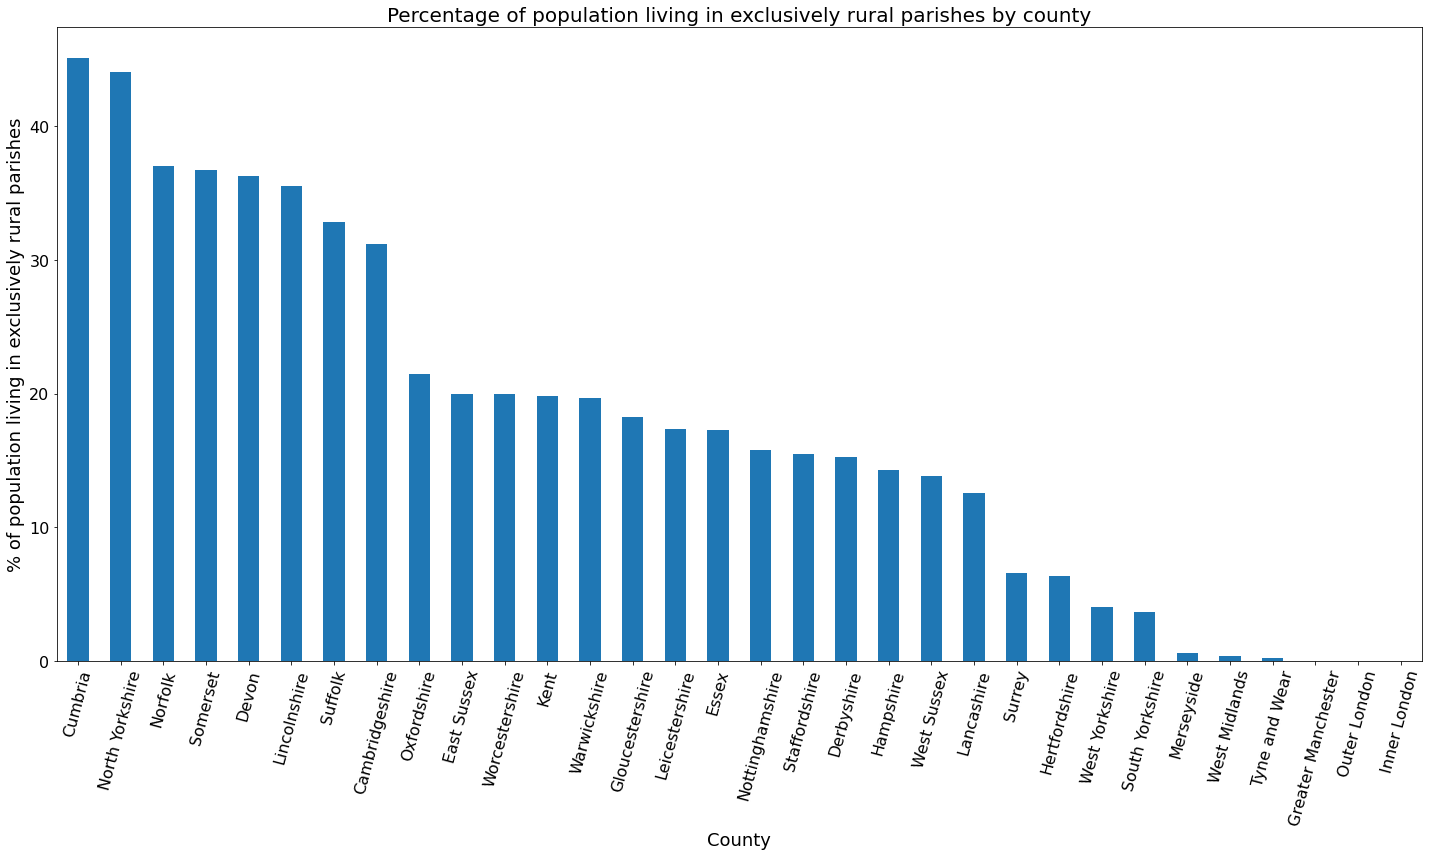

In [22]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df.sort_values(by='pct_population', ascending=False).pct_population.plot(kind='bar', ax=ax)
plt.xlabel('County', fontsize=18)
plt.ylabel('% of population living in exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of population living in exclusively rural parishes by county', fontsize=20)
plt.tight_layout()
plt.savefig('results/pct_exclusive_rural.png')
plt.show()

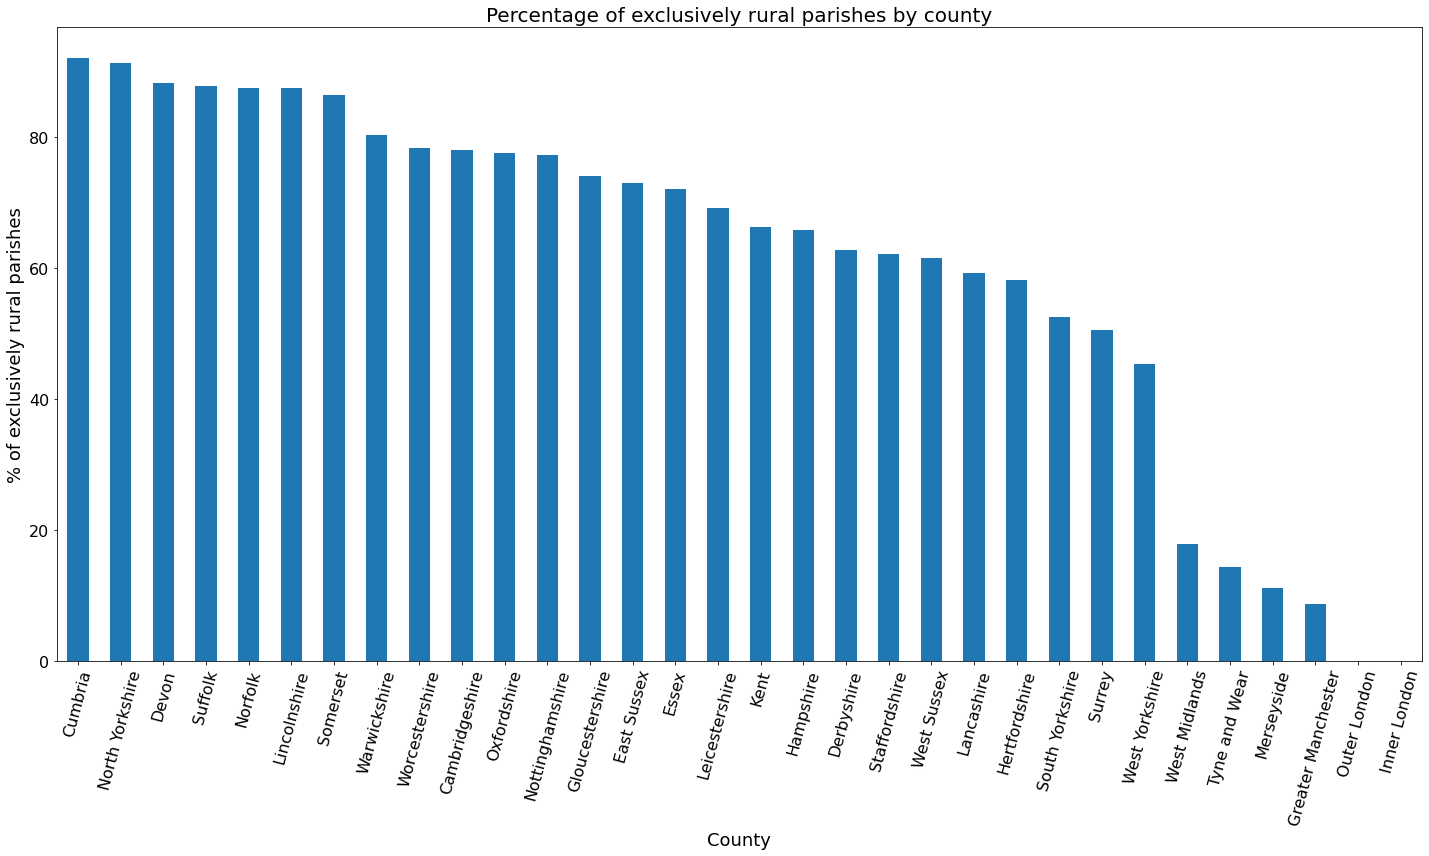

In [23]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df.sort_values(by='pct_parishes', ascending=False).pct_parishes.plot(kind='bar', ax=ax)
plt.xlabel('County', fontsize=18)
plt.ylabel('% of exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of exclusively rural parishes by county', fontsize=20)
plt.tight_layout()
plt.savefig('results/pct_exclusive_rural_parishes.png')
plt.show()

In [24]:
loss_df_region = pd.DataFrame(loss_dict_region).T
loss_df_region.sort_values(by='overall_population')

overall_population  overall_oa  overall_parishes  \
North East                           1127186        3893                14   
South West                           2024627        6609               947   
East Midlands                        3078795        9985              1050   
Yorkshire and The Humber             4338524       13954               718   
West Midlands                        4990917       15453               585   
East of England                      5008357       15964              1541   
North West                           6016451       19472               512   
South East                           6245269       19588              1186   
London                               8799770       26369                34   

                          rural_population  rural_oa  rural_parishes  
North East                            2474         8               2  
South West                          621448      2047             797  
East Midlands                       641851      2104             806  
Yorkshire and The Humber            413087      1426             576  
West Midlands                       380263      1221             415  
East of England                    1120611      3662            1249  
North West                          389157      1305             365  
South East                          966738      3075             806  
London                                   0         0               0

In [25]:
loss_df_region.loc[:, 'pct_population'] = 100*loss_df_region.rural_population / loss_df_region.overall_population
loss_df_region.loc[:, 'pct_oa'] = 100*loss_df_region.rural_oa / loss_df_region.overall_oa
loss_df_region.loc[:, 'pct_parishes'] = 100*loss_df_region.rural_parishes / loss_df_region.overall_parishes
loss_df_region

overall_population  overall_oa  overall_parishes  \
Yorkshire and The Humber             4338524       13954               718   
West Midlands                        4990917       15453               585   
South East                           6245269       19588              1186   
North West                           6016451       19472               512   
East Midlands                        3078795        9985              1050   
South West                           2024627        6609               947   
East of England                      5008357       15964              1541   
London                               8799770       26369                34   
North East                           1127186        3893                14   

                          rural_population  rural_oa  rural_parishes  \
Yorkshire and The Humber            413087      1426             576   
West Midlands                       380263      1221             415   
South East                          966738      3075             806   
North West                          389157      1305             365   
East Midlands                       641851      2104             806   
South West                          621448      2047             797   
East of England                    1120611      3662            1249   
London                                   0         0               0   
North East                            2474         8               2   

                          pct_population     pct_oa  pct_parishes  
Yorkshire and The Humber        9.521372  10.219292     80.222841  
West Midlands                   7.619101   7.901378     70.940171  
South East                     15.479525  15.698387     67.959528  
North West                      6.468215   6.701931     71.289062  
East Midlands                  20.847474  21.071607     76.761905  
South West                     30.694444  30.972916     84.160507  
East of England                22.374823  22.939113     81.051265  
London                          0.000000   0.000000      0.000000  
North East                      0.219485   0.205497     14.285714

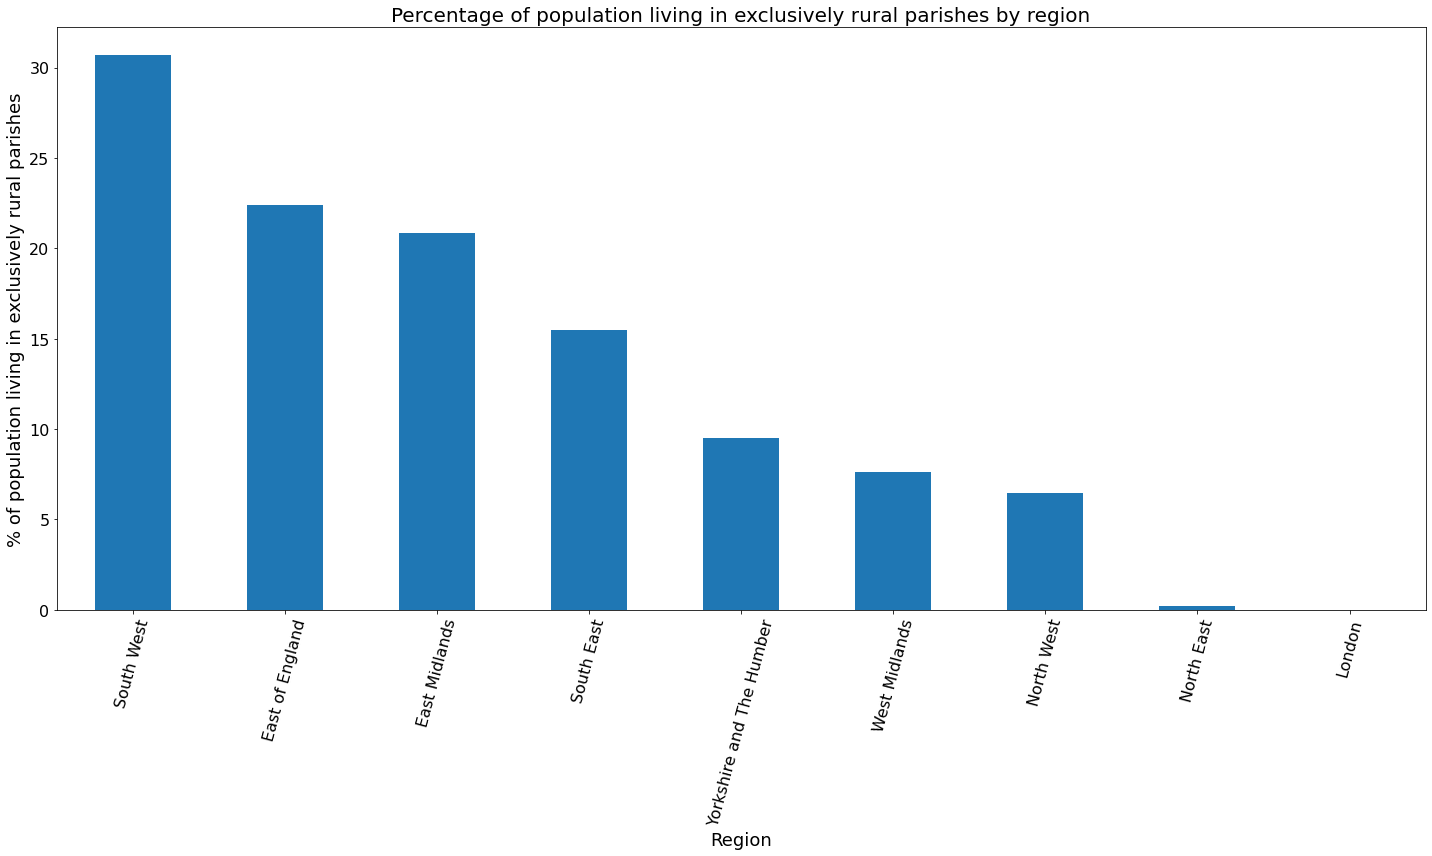

In [26]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df_region.sort_values(by='pct_population', ascending=False).pct_population.plot(kind='bar', ax=ax)
plt.xlabel('Region', fontsize=18)
plt.ylabel('% of population living in exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of population living in exclusively rural parishes by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/pct_exclusive_rural_region.png')
plt.show()

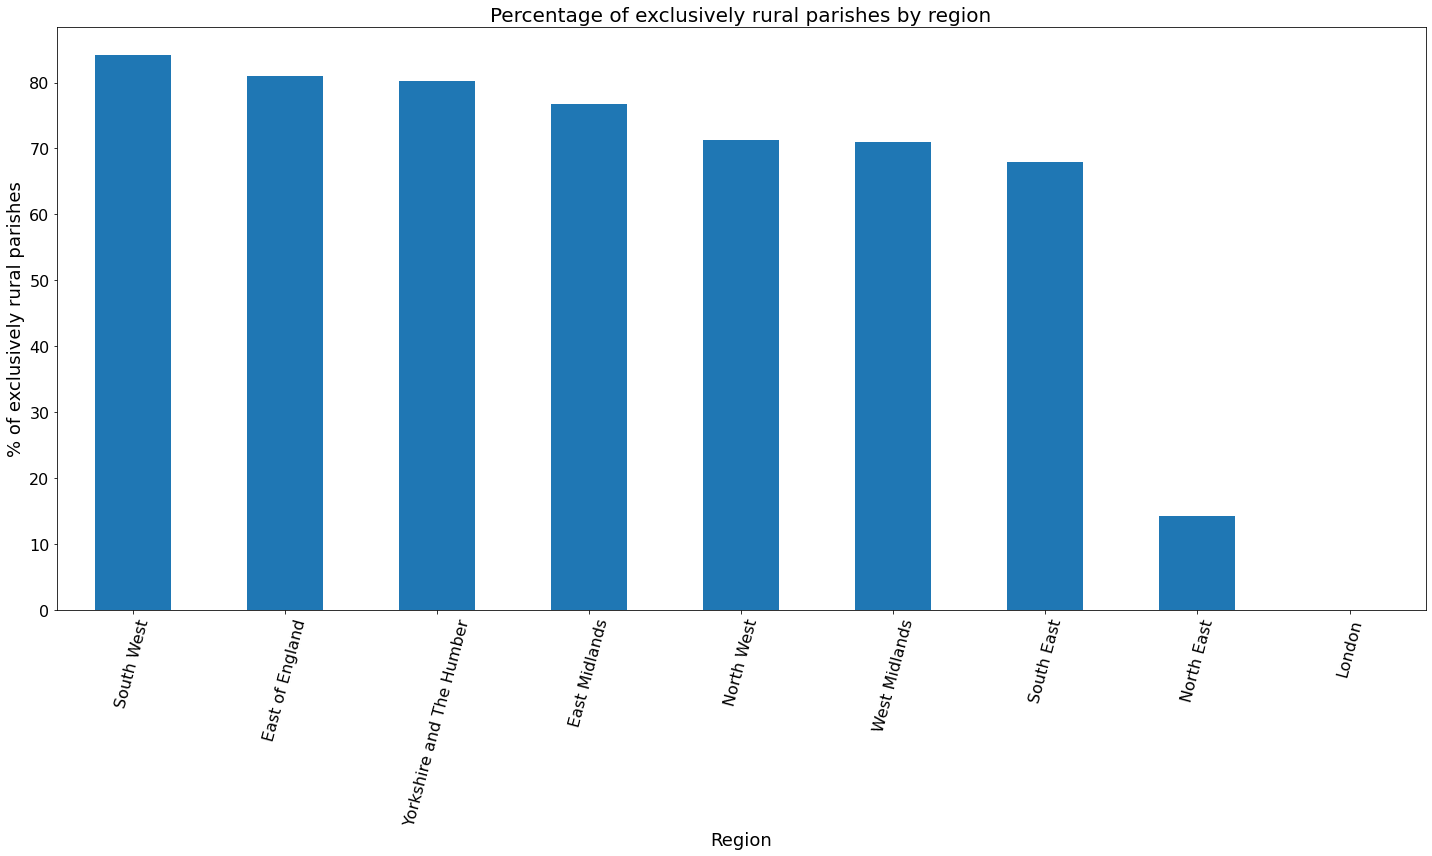

In [27]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df_region.sort_values(by='pct_parishes', ascending=False).pct_parishes.plot(kind='bar', ax=ax)
plt.xlabel('Region', fontsize=18)
plt.ylabel('% of exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of exclusively rural parishes by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/pct_exclusive_rural_parishes_region.png')
plt.show()

In [31]:
loss_df.rural_population.sum() / loss_df.overall_population.sum()

0.1094490537514666

Henceforth, based on the above, let's exclude:

- North East
- London

from our rural analyses

### Overall Amenities

In [32]:
from collections import Counter
overall_list = []
for county, parishes in overall_dict.items():
    for parish, data in parishes.items():
        for am in data['amenities']:
            overall_list.append(am['amenity'])
            
overall_ams = pd.DataFrame(Counter(overall_list).most_common(), columns=['amenity', 'number'])
overall_ams.loc[:, 'pct_amenities'] = 100*overall_ams.number / overall_ams.number.sum()
overall_ams

amenity  number  pct_amenities
0              parking  121827      19.770178
1                bench   60987       9.897017
2             post_box   51168       8.303582
3        parking_space   42145       6.839323
4      bicycle_parking   39505       6.410901
..                 ...     ...            ...
956         Day Centre       1       0.000162
957         laboratory       1       0.000162
958  convenience store       1       0.000162
959        arts_school       1       0.000162
960        mobile_home       1       0.000162

[961 rows x 3 columns]

In [33]:
overall_ams.number.sum()

616216

In [35]:
non_rural_regions = [
    'North East',
    'London'
]

rural_list = []
for county, parishes in only_rural_parishes.items():
    if region not in non_rural_regions:
        for parish, data in parishes.items():
            for am in data['amenities']:
                rural_list.append(am['amenity'])
            
rural_ams = pd.DataFrame(Counter(rural_list).most_common(), columns=['amenity', 'number'])
rural_ams.loc[:, 'pct_amenities'] = 100*rural_ams.number / rural_ams.number.sum()
rural_ams

amenity  number  pct_amenities
0             parking   24524      21.269547
1               bench   14800      12.835968
2            post_box   14479      12.557567
3    place_of_worship    7639       6.625268
4                 pub    6246       5.417126
..                ...     ...            ...
340          campsite       1       0.000867
341       lumber_yard       1       0.000867
342     telephone_box       1       0.000867
343          gambling       1       0.000867
344        bus_garage       1       0.000867

[345 rows x 3 columns]

In [826]:
overall_ams.head(20)

amenity  number  pct_amenities
0            parking  121827      19.770178
1              bench   60987       9.897017
2           post_box   51168       8.303582
3      parking_space   42145       6.839323
4    bicycle_parking   39505       6.410901
5       waste_basket   29343       4.761804
6                pub   24918       4.043712
7   place_of_worship   23272       3.776598
8          fast_food   23164       3.759071
9         restaurant   20956       3.400756
10              cafe   20242       3.284887
11            school   18651       3.026698
12         telephone   11621       1.885865
13        grave_yard    7982       1.295325
14          grit_bin    6651       1.079329
15               atm    6247       1.013768
16  community_centre    6227       1.010522
17           toilets    6152       0.998351
18          pharmacy    5572       0.904228
19         recycling    5524       0.896439

In [36]:
merged_ams = overall_ams[['amenity', 'pct_amenities']].merge(
    rural_ams[['amenity', 'pct_amenities']],
    how='inner',
    on='amenity',
    suffixes=("_overall", "_rural")
)
merged_ams.head(20)

amenity  pct_amenities_overall  pct_amenities_rural
0            parking              19.770178            21.269547
1              bench               9.897017            12.835968
2           post_box               8.303582            12.557567
3      parking_space               6.839323             3.391124
4    bicycle_parking               6.410901             1.017337
5       waste_basket               4.761804             3.118793
6                pub               4.043712             5.417126
7   place_of_worship               3.776598             6.625268
8          fast_food               3.759071             1.068508
9         restaurant               3.400756             1.396345
10              cafe               3.284887             2.535971
11            school               3.026698             2.840392
12         telephone               1.885865             2.658260
13        grave_yard               1.295325             4.672986
14          grit_bin               1.079329             1.205540
15               atm               1.013768             0.303553
16  community_centre               1.010522             1.777088
17           toilets               0.998351             1.617505
18          pharmacy               0.904228             0.333909
19         recycling               0.896439             0.994788

In [828]:
merged_ams.sort_values(by='pct_amenities_rural', ascending=False).head(10)

amenity  pct_amenities_overall  pct_amenities_rural
0            parking              19.770178            21.269547
1              bench               9.897017            12.835968
2           post_box               8.303582            12.557567
7   place_of_worship               3.776598             6.625268
6                pub               4.043712             5.417126
13        grave_yard               1.295325             4.672986
3      parking_space               6.839323             3.391124
5       waste_basket               4.761804             3.118793
11            school               3.026698             2.840392
12         telephone               1.885865             2.658260

In [829]:
merged_ams.loc[:, 'rel_pct_more_rural'] = (merged_ams.pct_amenities_rural - merged_ams.pct_amenities_overall)/merged_ams.pct_amenities_overall
merged_ams.loc[:, 'abs_pct_more_rural'] = (merged_ams.pct_amenities_rural - merged_ams.pct_amenities_overall)
merged_ams.sort_values(by='rel_pct_more_rural').head(10)

amenity  pct_amenities_overall  pct_amenities_rural  \
52          car_sharing               0.110675             0.002602   
66     bureau_de_change               0.054851             0.001735   
83             gambling               0.023368             0.000867   
97                 dojo               0.012496             0.000867   
74          trolley_bay               0.034404             0.002602   
41   motorcycle_parking               0.187597             0.014744   
101          bus_garage               0.011035             0.000867   
67         loading_dock               0.054039             0.004336   
106     language_school               0.009250             0.000867   
36     parking_entrance               0.240176             0.022550   

     rel_pct_more_rural  abs_pct_more_rural  
52            -0.976491           -0.108074  
66            -0.968376           -0.053116  
83            -0.962886           -0.022501  
97            -0.930592           -0.011628  
74            -0.924372           -0.031802  
41            -0.921406           -0.172853  
101           -0.921406           -0.010168  
67            -0.919754           -0.049703  
106           -0.906238           -0.008383  
36            -0.906112           -0.217626

In [830]:
merged_ams.sort_values(by='rel_pct_more_rural', ascending=False).head(10)

amenity  pct_amenities_overall  pct_amenities_rural  \
160             shooting_stand               0.001461             0.007806   
218            outdoors_centre               0.000487             0.002602   
147                  enclosing               0.002434             0.013009   
163                      layby               0.001461             0.007806   
171             rescue_station               0.000974             0.005204   
181               holiday_park               0.000811             0.004336   
154           conference_venue               0.001785             0.009540   
203              wildlife_hide               0.000487             0.002602   
197  pollution_control_station               0.000487             0.002602   
138                fire_beater               0.002921             0.015611   

     rel_pct_more_rural  abs_pct_more_rural  
160            4.344412            0.006345  
218            4.344412            0.002115  
147            4.344412            0.010575  
163            4.344412            0.006345  
171            4.344412            0.004230  
181            4.344412            0.003525  
154            4.344412            0.007755  
203            4.344412            0.002115  
197            4.344412            0.002115  
138            4.344412            0.012690

In [831]:
merged_ams.sort_values(by='abs_pct_more_rural', ascending=True).head(10)

amenity  pct_amenities_overall  pct_amenities_rural  \
4   bicycle_parking               6.410901             1.017337   
3     parking_space               6.839323             3.391124   
8         fast_food               3.759071             1.068508   
9        restaurant               3.400756             1.396345   
5      waste_basket               4.761804             3.118793   
10             cafe               3.284887             2.535971   
15              atm               1.013768             0.303553   
18         pharmacy               0.904228             0.333909   
23             bank               0.646527             0.131829   
25              bar               0.594434             0.169990   

    rel_pct_more_rural  abs_pct_more_rural  
4            -0.841311           -5.393564  
3            -0.504173           -3.448198  
8            -0.715752           -2.690564  
9            -0.589401           -2.004410  
5            -0.345040           -1.643011  
10           -0.227988           -0.748916  
15           -0.700569           -0.710215  
18           -0.630725           -0.570320  
23           -0.796097           -0.514698  
25           -0.714031           -0.424445

In [832]:
merged_ams.sort_values(by='abs_pct_more_rural', ascending=False).head(10)

amenity  pct_amenities_overall  pct_amenities_rural  \
2           post_box               8.303582            12.557567   
13        grave_yard               1.295325             4.672986   
1              bench               9.897017            12.835968   
7   place_of_worship               3.776598             6.625268   
28     hunting_stand               0.451627             2.144821   
0            parking              19.770178            21.269547   
6                pub               4.043712             5.417126   
12         telephone               1.885865             2.658260   
16  community_centre               1.010522             1.777088   
17           toilets               0.998351             1.617505   

    rel_pct_more_rural  abs_pct_more_rural  
2             0.512307            4.253985  
13            2.607578            3.377661  
1             0.296953            2.938952  
7             0.754295            2.848670  
28            3.749094            1.693194  
0             0.075840            1.499369  
6             0.339642            1.373414  
12            0.409571            0.772395  
16            0.758583            0.766566  
17            0.620177            0.619154

In [80]:
to_get = ['pub', 'place_of_worship', 'school', 'post_box', 'community_centre']

## Building the data frame

In [81]:
big_list = []
for county, data in only_rural_dict.items():
    for parish, other in data.items():
        population = other['population']
        region = other['region']
        if region in non_rural_regions:
            continue
        parish_thing = dict((i, 0) for i in to_get)
        parish_thing['population'] = population
        parish_thing['name'] = parish
        parish_thing['area'] = other['size']
        parish_thing['county'] = county
        parish_thing['region'] = region
        for am in other['amenities']:
            am_type = am['amenity']
            if am_type in to_get:
                parish_thing[am_type] += 1
        imd_total = 0
        for bit in other['classification']:
            imd_total += bit['imd_class'] * bit['population']
        imd_total = imd_total / population
        parish_thing['weighted_imd'] = imd_total
        big_list.append(parish_thing)

In [82]:
big_list[0]

{'pub': 2,
 'place_of_worship': 2,
 'school': 1,
 'post_box': 0,
 'community_centre': 0,
 'population': 1203,
 'name': 'Bradleys Both',
 'area': 7898753.90211326,
 'county': 'North Yorkshire',
 'region': 'Yorkshire and The Humber',
 'weighted_imd': 30238.0}

In [83]:
df = pd.DataFrame(big_list)

In [84]:
df.head()

pub  place_of_worship  school  post_box  community_centre  population  \
0    2                 2       1         0                 0        1203   
1    2                 1       1         2                 1        1469   
2    0                 1       0         0                 0         481   
3    1                 2       1         1                 0         222   
4    1                 2       1         2                 1         509   

            name          area           county                    region  \
0  Bradleys Both  7.898754e+06  North Yorkshire  Yorkshire and The Humber   
1       Cononley  6.695996e+06  North Yorkshire  Yorkshire and The Humber   
2       Farnhill  1.691419e+06  North Yorkshire  Yorkshire and The Humber   
3       Kildwick  3.710505e+06  North Yorkshire  Yorkshire and The Humber   
4    Lothersdale  1.084977e+07  North Yorkshire  Yorkshire and The Humber   

   weighted_imd  
0       30238.0  
1       23934.0  
2       30238.0  
3       30238.0  
4       23934.0

In [42]:
df.shape

(5064, 9)

In [43]:
df.sort_values(by='population', ascending=False).head()

pub  place_of_worship  school  population                    name  \
2271    5                10       6       12162  Heathfield and Waldron   
3089    7                11       5       11192                Holbeach   
3482   12                 9       7       10866                Maryport   
1495    4                 3       5        9629                 Tiptree   
3886    4                 2       3        9403                  Yaxley   

              area          county           region  weighted_imd  
2271  5.281596e+07     East Sussex       South East  24913.929781  
3089  1.007035e+08    Lincolnshire    East Midlands  14565.025643  
3482  1.329315e+07         Cumbria       North West   8925.915976  
1495  9.576908e+06           Essex  East of England  22970.041853  
3886  1.333501e+07  Cambridgeshire  East of England  21554.123578

In [44]:
df.sort_values(by='population').head()

pub  place_of_worship  school  population              name  \
2645    0                 1       0         100           Denston   
1254    0                 1       0         101  East Quantoxhead   
217     1                 0       0         102          Plompton   
1240    1                 1       0         102        Monksilver   
2949    1                 2       0         103           Hainton   

              area           county                    region  weighted_imd  
2645  4.854119e+06          Suffolk           East of England       18025.0  
1254  9.448572e+06         Somerset                South West       12279.0  
217   7.677769e+06  North Yorkshire  Yorkshire and The Humber       27348.0  
1240  3.202055e+06         Somerset                South West       10163.0  
2949  9.402206e+06     Lincolnshire             East Midlands       10957.0

### Population Distribution

In [45]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

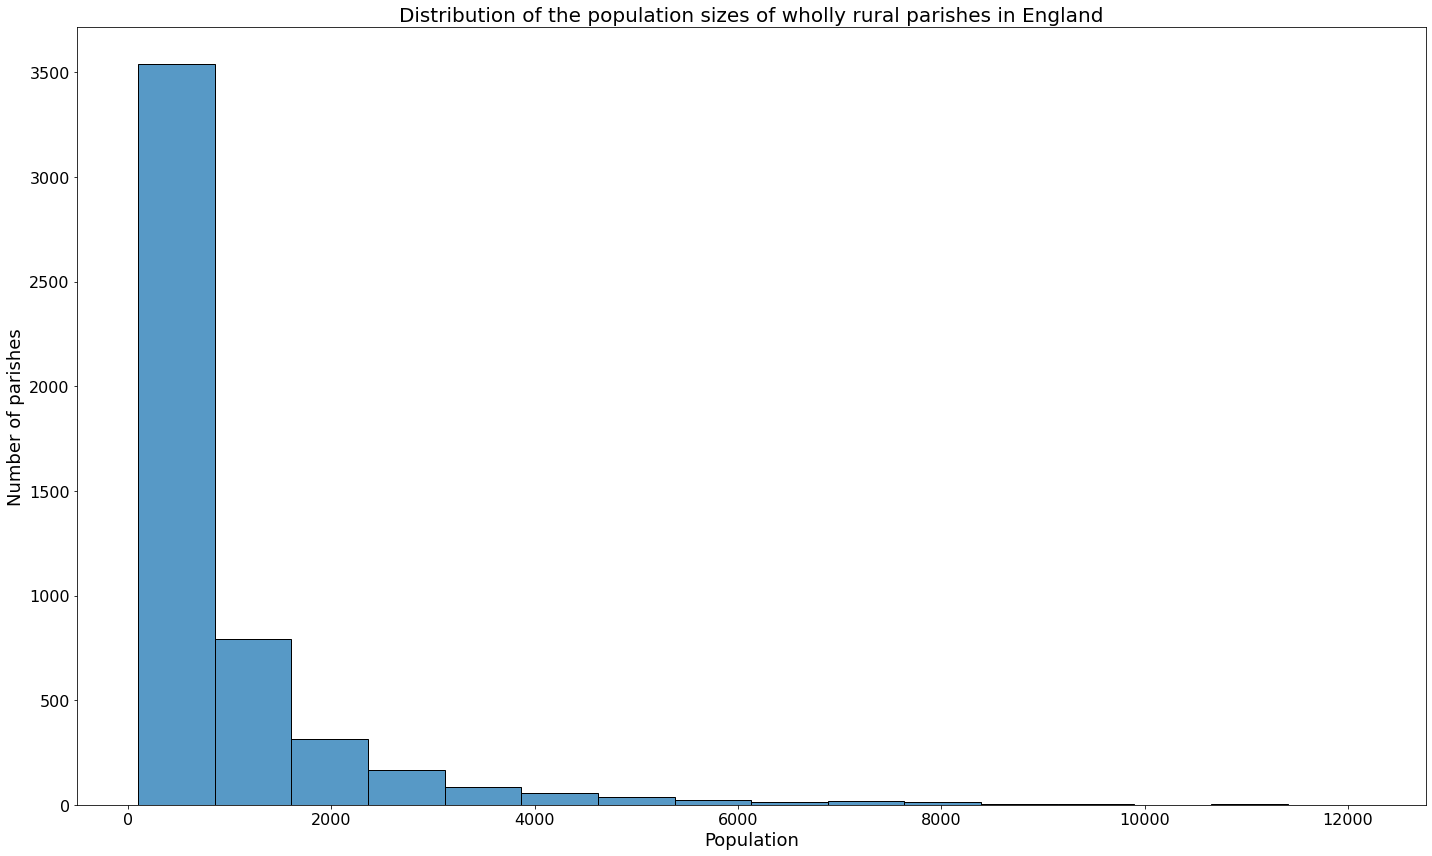

In [46]:
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(df.population.values, bins=16)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Number of parishes', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Distribution of the population sizes of wholly rural parishes in England', fontsize=20)
plt.tight_layout()
plt.savefig('results/pop_distribution_rural_parishes.png')
plt.show()

## Average plots

In [47]:
df.loc[:, 'population_grouped'] = df.population.apply(
lambda x: 100*np.round(x/100) if x <= 1000 else 250*np.round(x/250) if x <= 2000 else np.round(x/1000)*1000 if x <= 5000 else np.round(x/5000)*5000
    
)


In [48]:
df.groupby(['population_grouped']).agg('mean')[to_get]

pub  place_of_worship    school
population_grouped                                      
100.0               0.272727          1.006494  0.064935
200.0               0.475638          1.140371  0.104408
300.0               0.672365          1.269231  0.207977
400.0               0.862333          1.353728  0.369025
500.0               1.035088          1.375940  0.458647
600.0               1.105802          1.440273  0.576792
700.0               1.241379          1.336207  0.771552
800.0               1.390476          1.447619  0.923810
900.0               1.280702          1.450292  0.918129
1000.0              1.651584          1.683258  0.963801
1250.0              1.851695          1.682203  1.135593
1500.0              2.055866          1.905028  1.195531
1750.0              2.107692          1.823077  1.215385
2000.0              2.186275          2.024510  1.431373
3000.0              2.766497          2.598985  1.670051
4000.0              3.532468          2.883117  1.805195
5000.0              4.656250          3.791667  2.666667
10000.0             7.750000          5.541667  4.500000

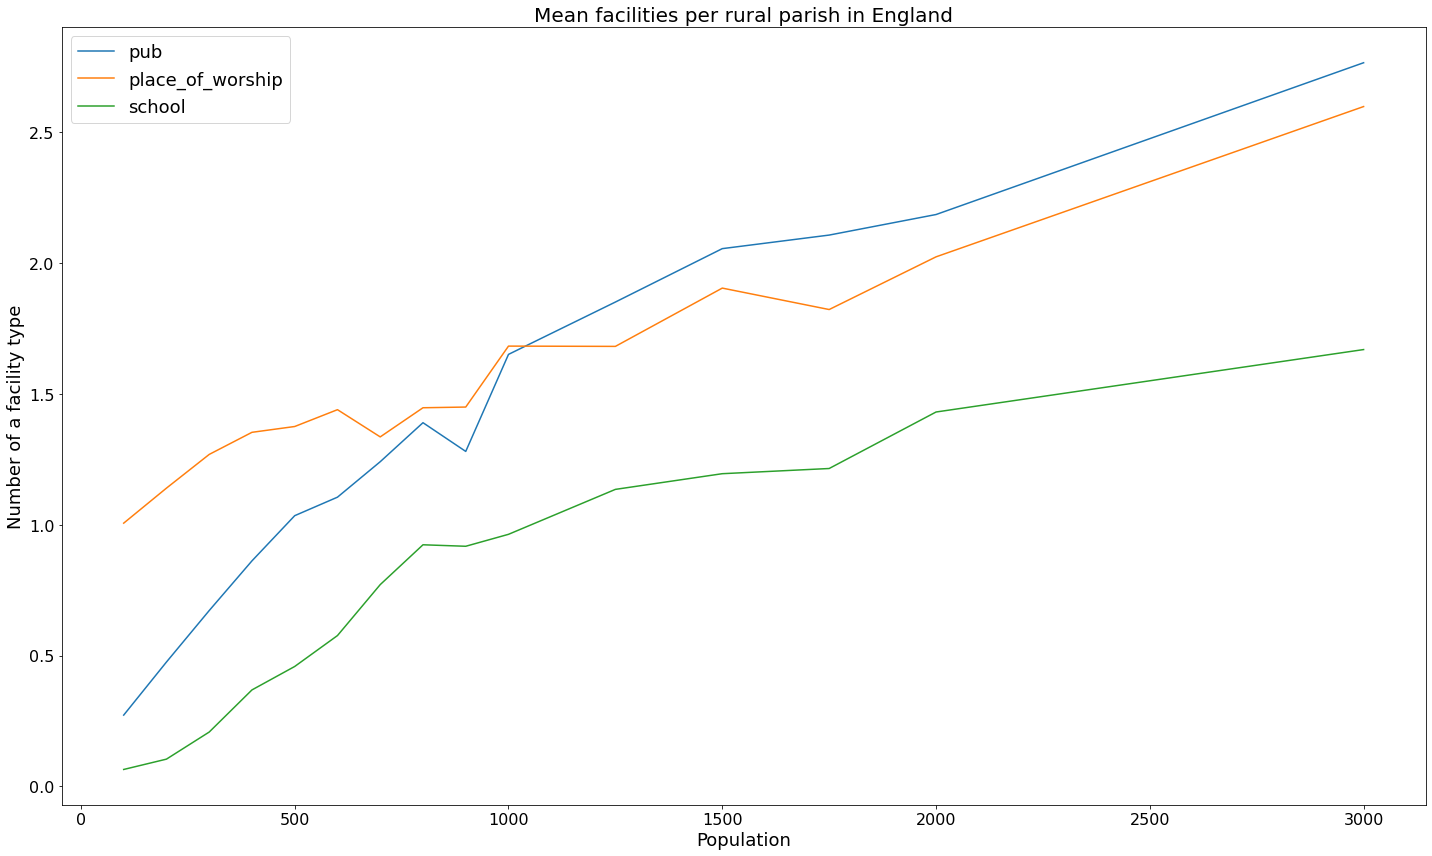

In [49]:
fig, ax = plt.subplots(figsize=(20,12))
df[df.population_grouped < 4000].groupby(['population_grouped']).agg('mean')[to_get].plot(ax=ax)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Mean facilities per rural parish in England', fontsize=20)
plt.tight_layout()
plt.savefig('results/avg_facilities_per_rural_parish_small.png')
plt.show()

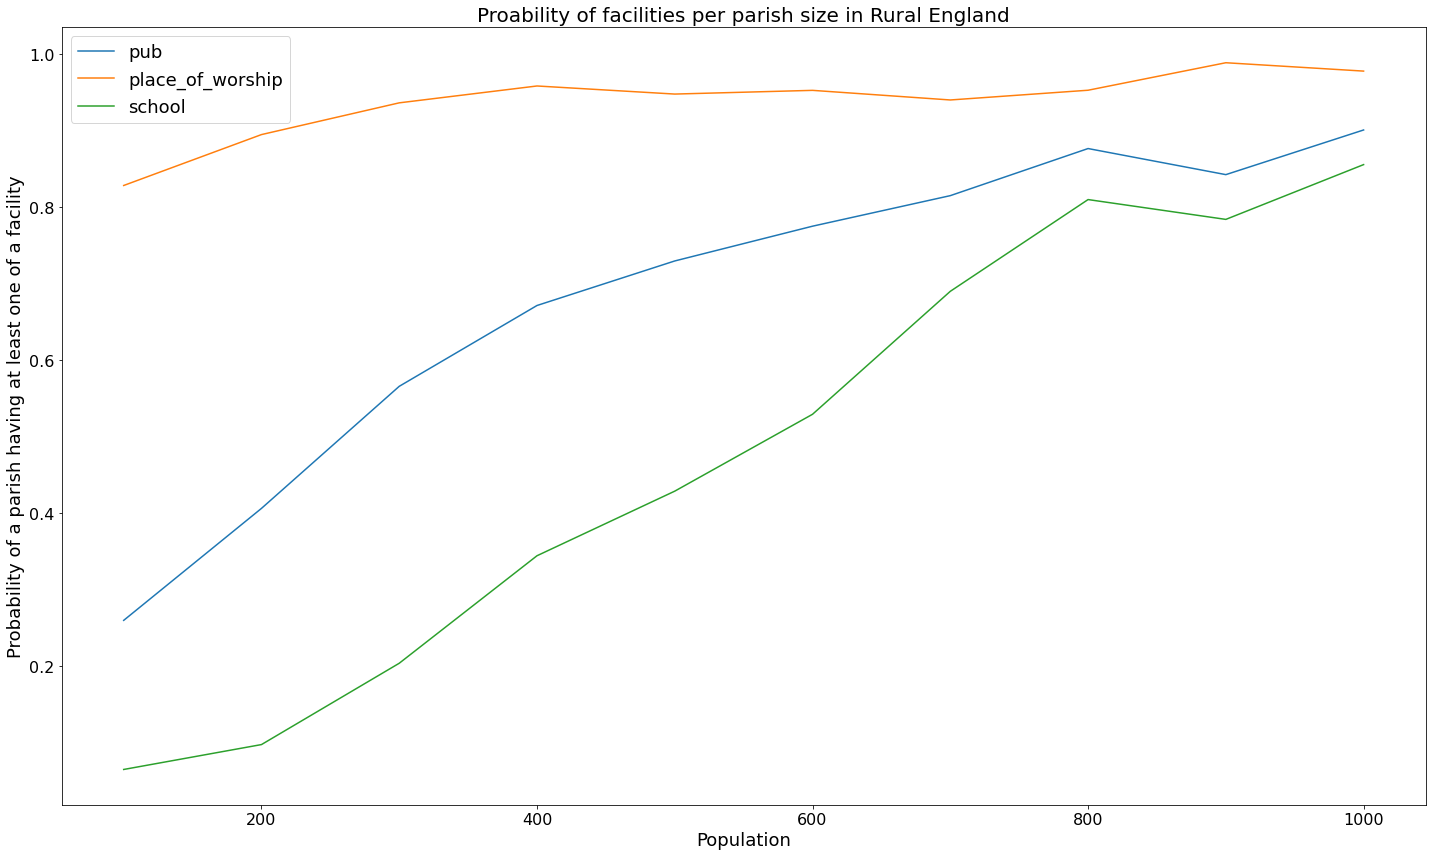

In [50]:
fig, ax = plt.subplots(figsize=(20,12))
small_parishes = df[df.population_grouped <= 1000]
for item in to_get:
    copy = small_parishes.copy()
    copy.loc[:, 'masked_item'] = copy[[item]] > 0
    copy.groupby(['population_grouped']).masked_item.agg('mean').plot(ax=ax, label=item)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Probability of a parish having at least one of a facility', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Proability of facilities per parish size in Rural England', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_facilities_per_parish.png')
plt.show()

## By Region

In [85]:
region_sizes = df.groupby(['region']).size().reset_index()
region_sizes.columns = ['region', 'num_wholly_rural_parishes']
rural_regions = region_sizes[region_sizes.num_wholly_rural_parishes >= 100].region.values

In [86]:
real_rural_regions = df[df.region.isin(rural_regions)]

In [87]:
real_rural_regions[real_rural_regions.population <= 1000].groupby(['region']).size().sort_values()

region
North West                  261
West Midlands               305
Yorkshire and The Humber    468
South East                  525
South West                  616
East Midlands               645
East of England             957
dtype: int64

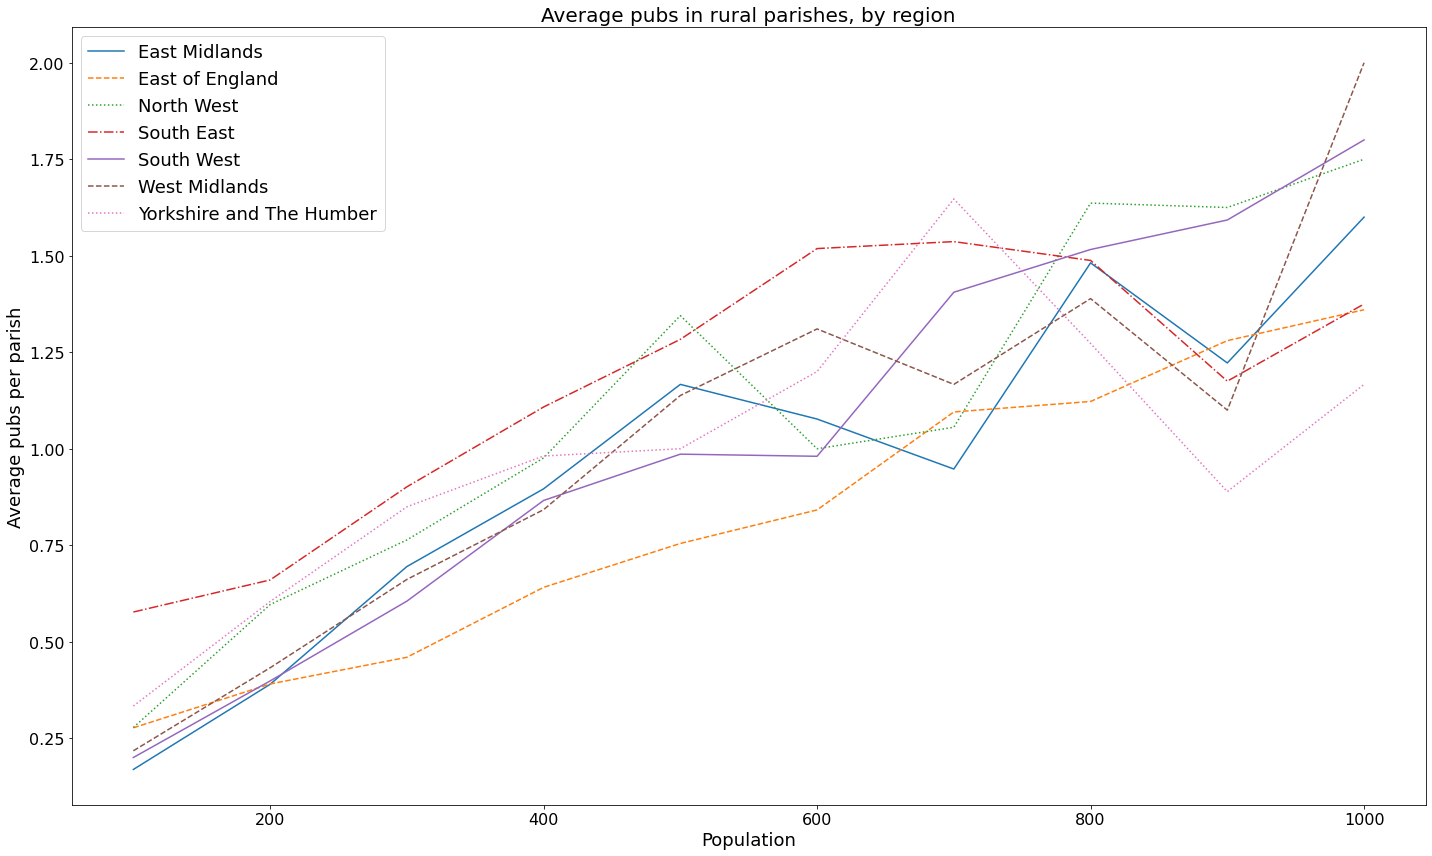

In [54]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).pub.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average pubs per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Average pubs in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/pubs_per_parish_by_region.png')
plt.show()

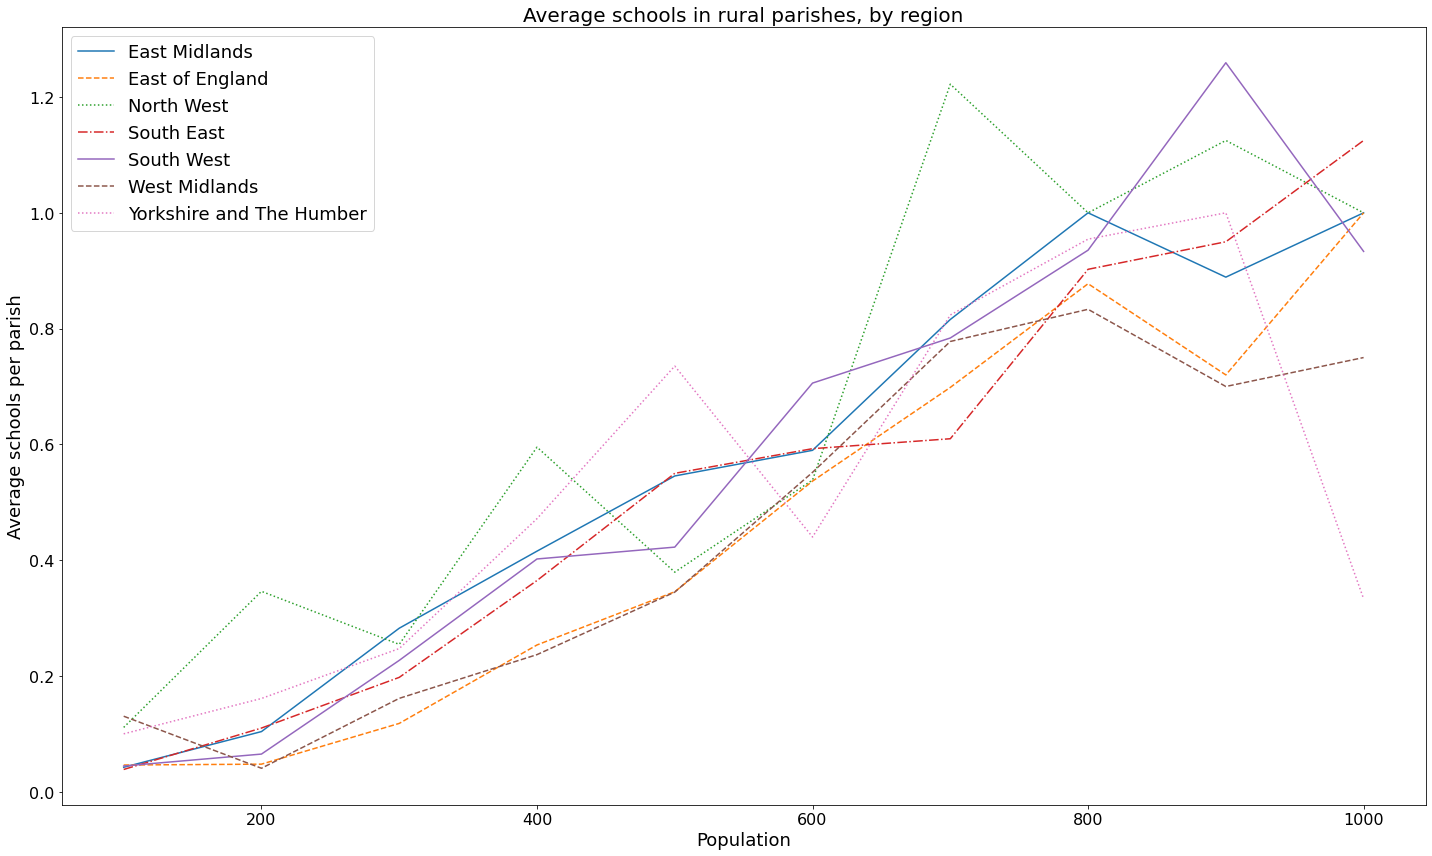

In [55]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).school.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average schools per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Average schools in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/schools_per_parish_by_region.png')
plt.show()

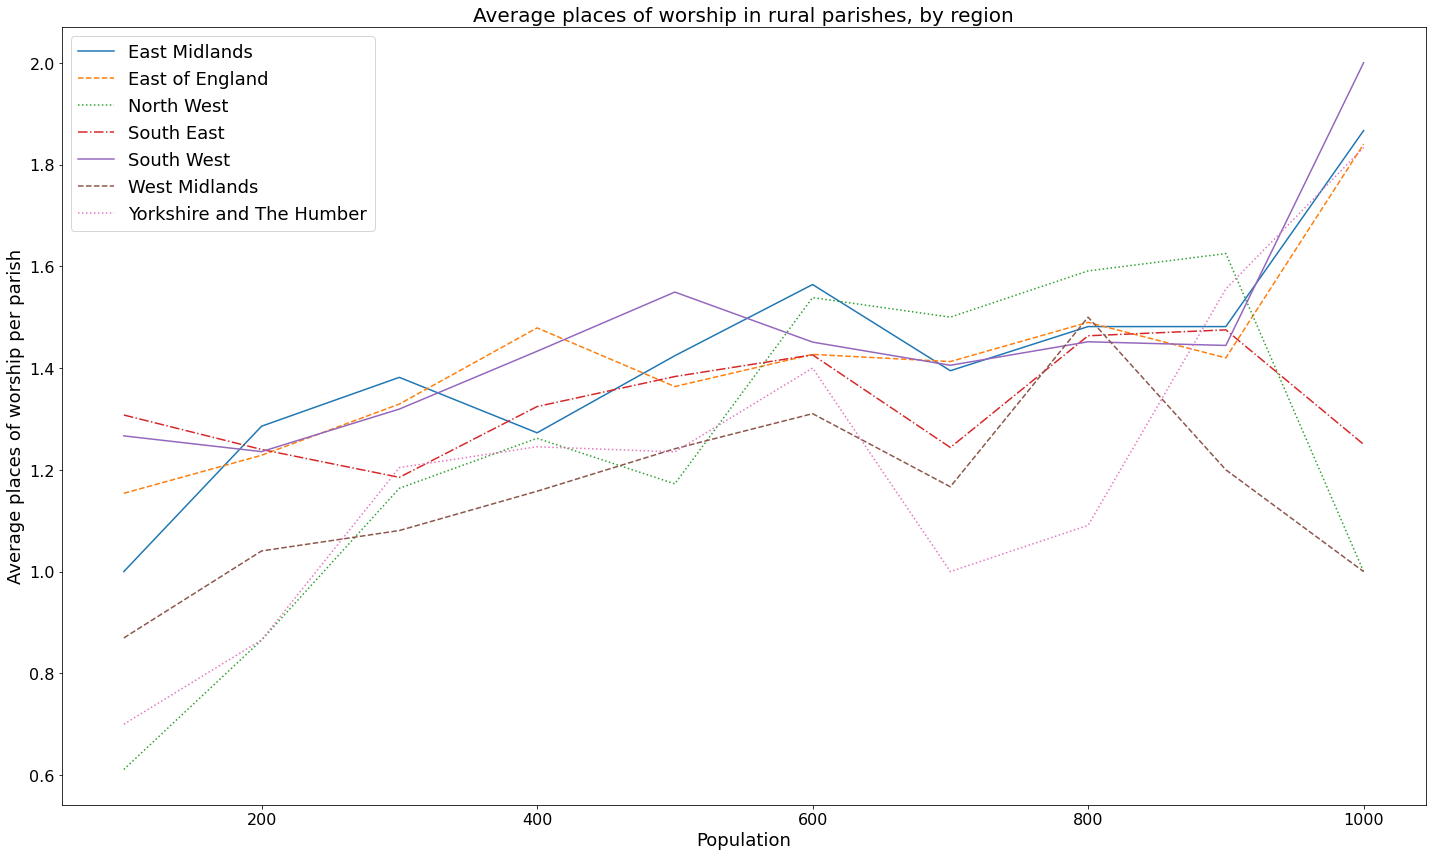

In [56]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).place_of_worship.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average places of worship per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Average places of worship in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/worship_per_parish_by_region.png')
plt.show()

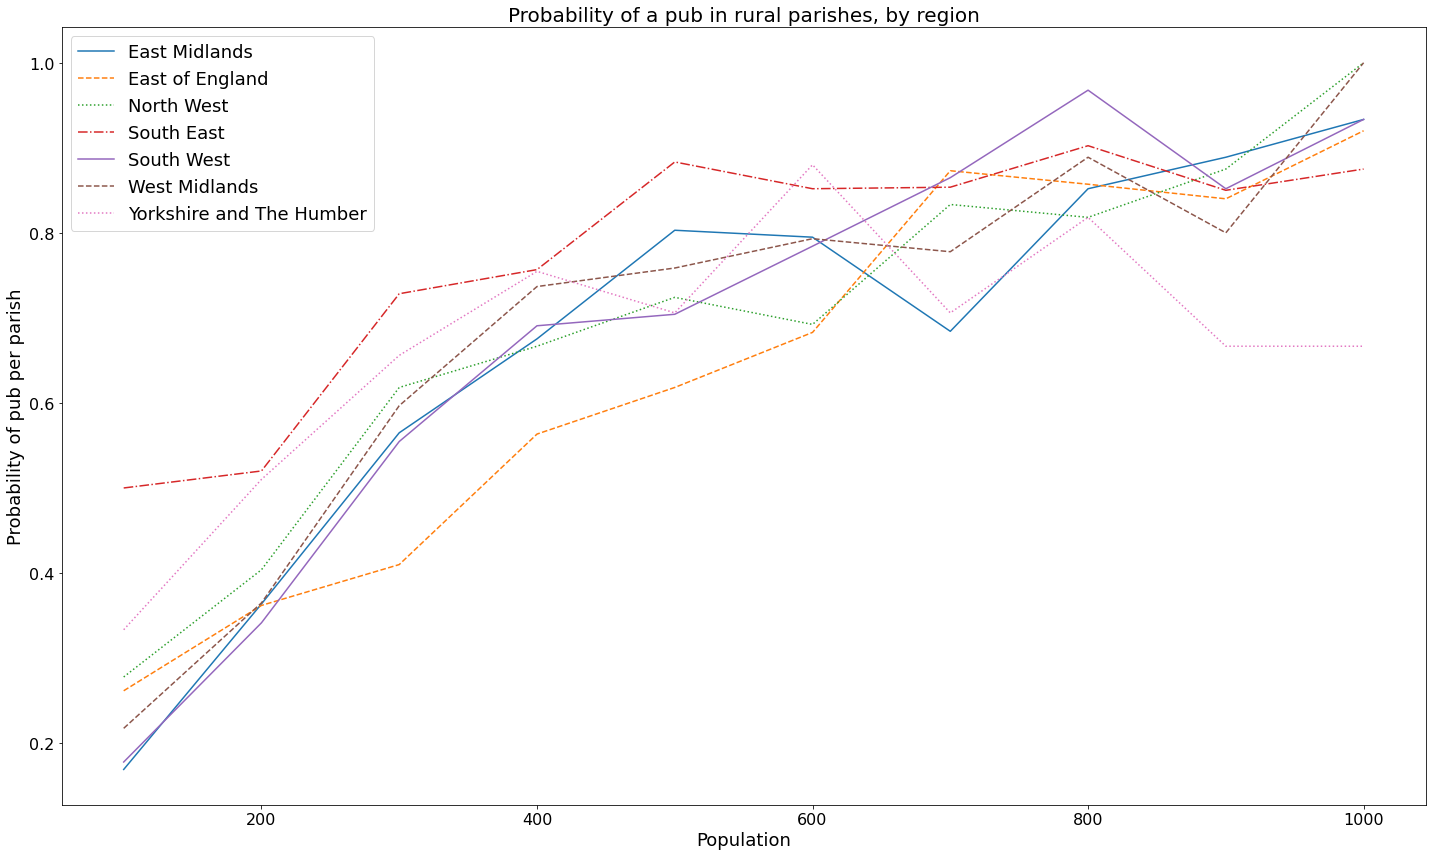

In [57]:
real_rural_regions.loc[:, 'school_bool'] = real_rural_regions.school > 0
real_rural_regions.loc[:, 'school_bool'] = real_rural_regions.school_bool.astype(int)
real_rural_regions.loc[:, 'pub_bool'] = real_rural_regions.pub > 0
real_rural_regions.loc[:, 'pub_bool'] = real_rural_regions.pub_bool.astype(int)
real_rural_regions.loc[:, 'worship_bool'] = real_rural_regions.place_of_worship > 0
real_rural_regions.loc[:, 'worship_bool'] = real_rural_regions.worship_bool.astype(int)

ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).pub_bool.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of pub per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a pub in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_pubs_per_parish_by_region.png')
plt.show()

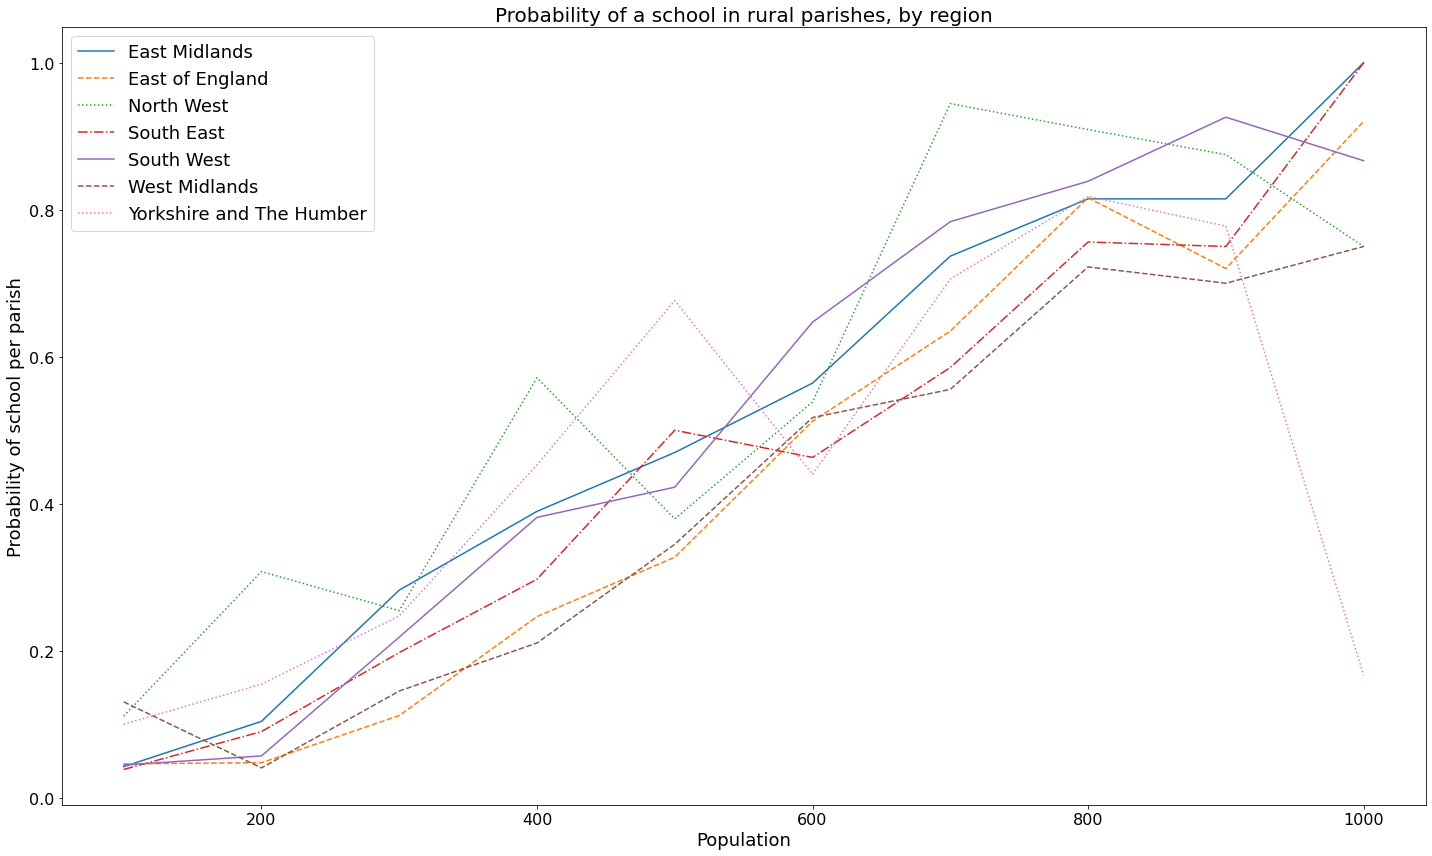

In [58]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).school_bool.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of school per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a school in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_schools_per_parish_by_region.png')
plt.show()

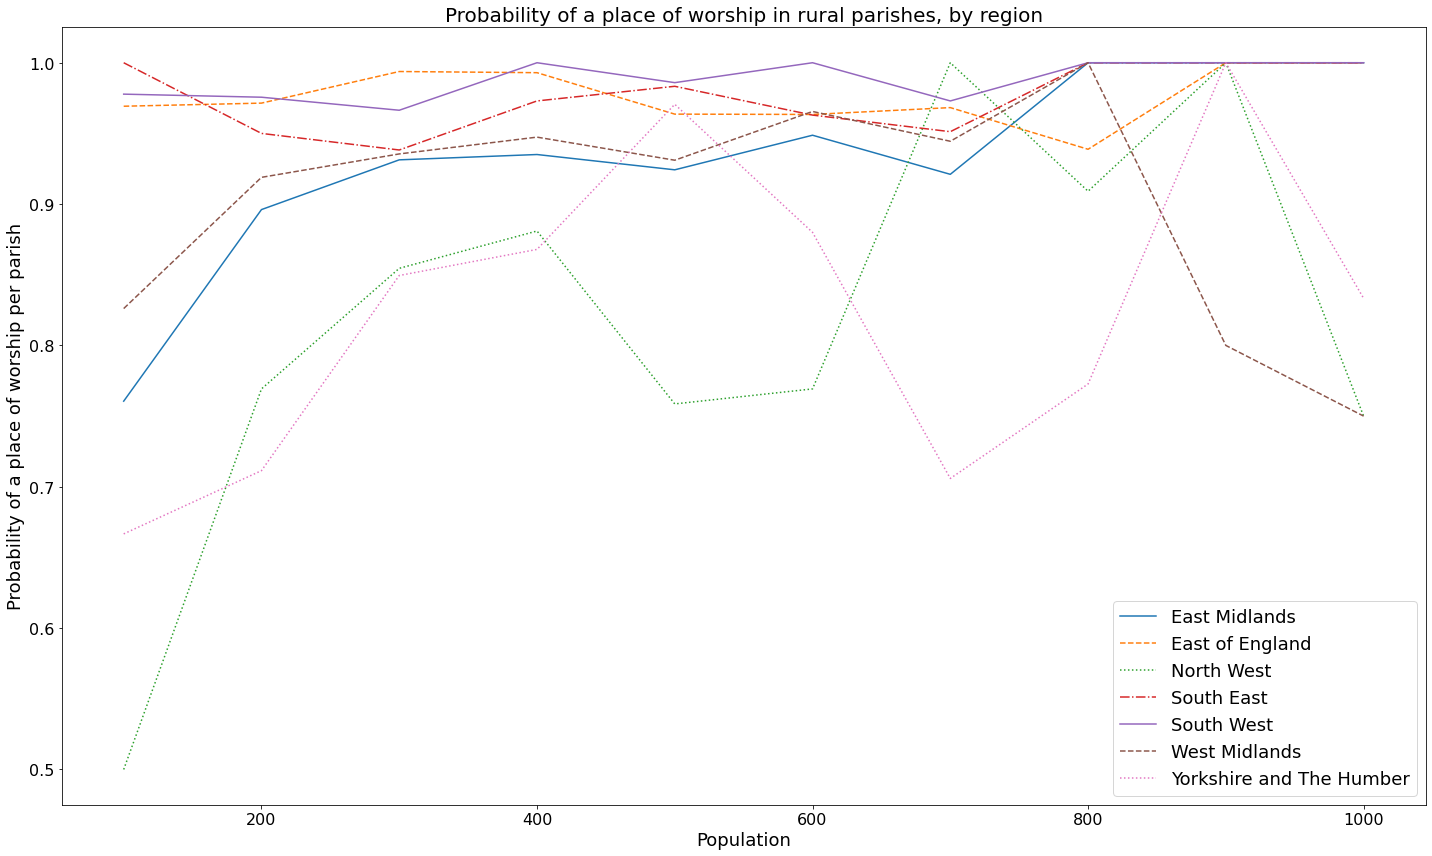

In [59]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).worship_bool.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a place of worship per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a place of worship in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_worship_per_parish_by_region.png')
plt.show()

### Regional differences in dependent variables

In [88]:
real_rural_regions.head()

pub  place_of_worship  school  post_box  community_centre  population  \
0    2                 2       1         0                 0        1203   
1    2                 1       1         2                 1        1469   
2    0                 1       0         0                 0         481   
3    1                 2       1         1                 0         222   
4    1                 2       1         2                 1         509   

            name          area           county                    region  \
0  Bradleys Both  7.898754e+06  North Yorkshire  Yorkshire and The Humber   
1       Cononley  6.695996e+06  North Yorkshire  Yorkshire and The Humber   
2       Farnhill  1.691419e+06  North Yorkshire  Yorkshire and The Humber   
3       Kildwick  3.710505e+06  North Yorkshire  Yorkshire and The Humber   
4    Lothersdale  1.084977e+07  North Yorkshire  Yorkshire and The Humber   

   weighted_imd  
0       30238.0  
1       23934.0  
2       30238.0  
3       30238.0  
4       23934.0

In [61]:
real_rural_regions.groupby(['region']).weighted_imd.agg('mean').sort_values()

region
South West                  17729.923751
East of England             18569.391525
East Midlands               18918.214492
North West                  19171.815449
Yorkshire and The Humber    20286.359220
West Midlands               20454.982437
South East                  20607.924602
Name: weighted_imd, dtype: float64

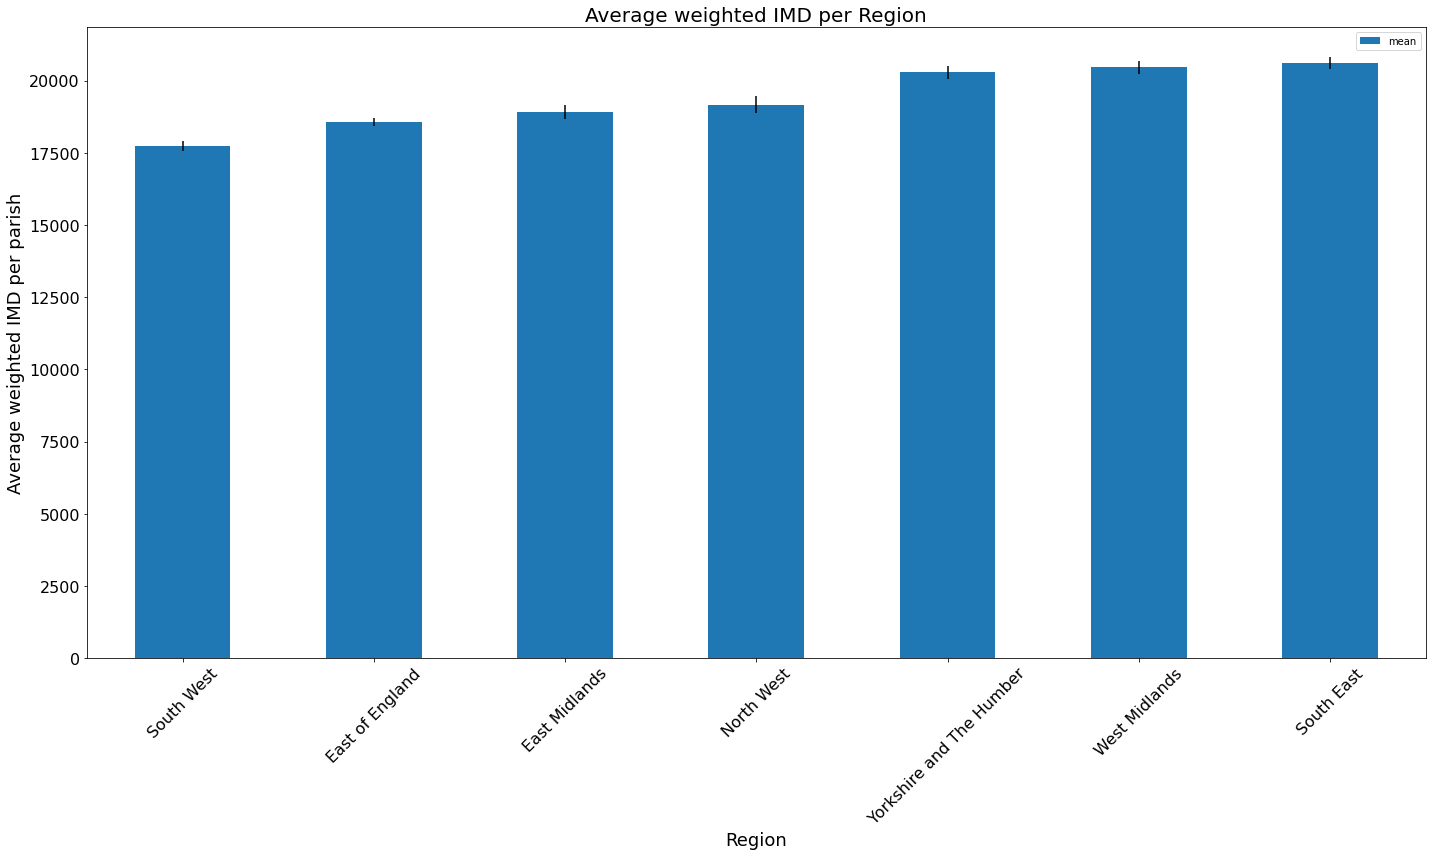

In [62]:
handy = real_rural_regions.groupby(['region']).weighted_imd.agg(['mean', 'sem']).sort_values(by='mean')
fig, ax = plt.subplots(figsize=(20,12))
handy.plot(kind='bar', yerr='sem', ax=ax, rot=45)
plt.tight_layout()
#plt.legend(None)
plt.xlabel('Region', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average weighted IMD per parish', fontsize=18)
plt.title('Average weighted IMD per Region', fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('results/imd_per_region.png')
plt.show()

In [63]:
real_rural_regions.groupby(['region']).pub.agg(['mean', 'sem']).sort_values(by='mean')

mean       sem
region                                      
East of England           0.961508  0.029163
East Midlands             1.106880  0.045561
South West                1.167920  0.045479
Yorkshire and The Humber  1.192374  0.066498
West Midlands             1.363636  0.085584
North West                1.653005  0.129286
South East                1.678484  0.052077

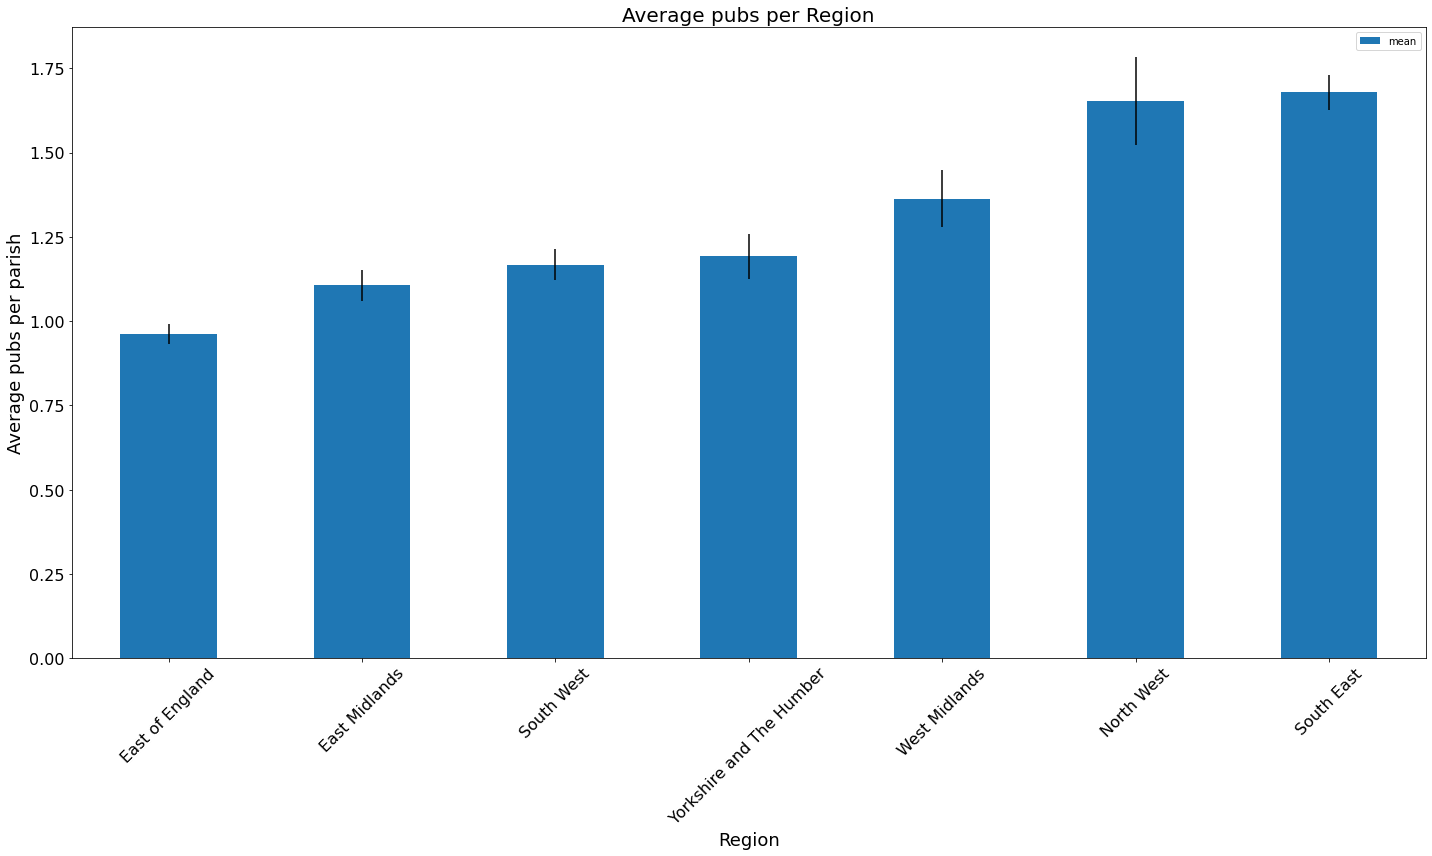

In [64]:
handy = real_rural_regions.groupby(['region']).pub.agg(['mean', 'sem']).sort_values(by='mean')
fig, ax = plt.subplots(figsize=(20,12))
handy.plot(kind='bar', yerr='sem', ax=ax, rot=45)
plt.tight_layout()
#plt.legend(None)
plt.xlabel('Region', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average pubs per parish', fontsize=18)
plt.title('Average pubs per Region', fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('results/pub_per_region.png')
plt.show()

In [65]:
real_rural_regions.groupby(['region']).school.agg(['mean', 'sem']).sort_values(by='mean')

mean       sem
region                                      
Yorkshire and The Humber  0.556326  0.035819
East of England           0.566379  0.021067
South West                0.604010  0.025663
East Midlands             0.616708  0.028996
West Midlands             0.641148  0.044693
South East                0.827628  0.035804
North West                0.920765  0.057566

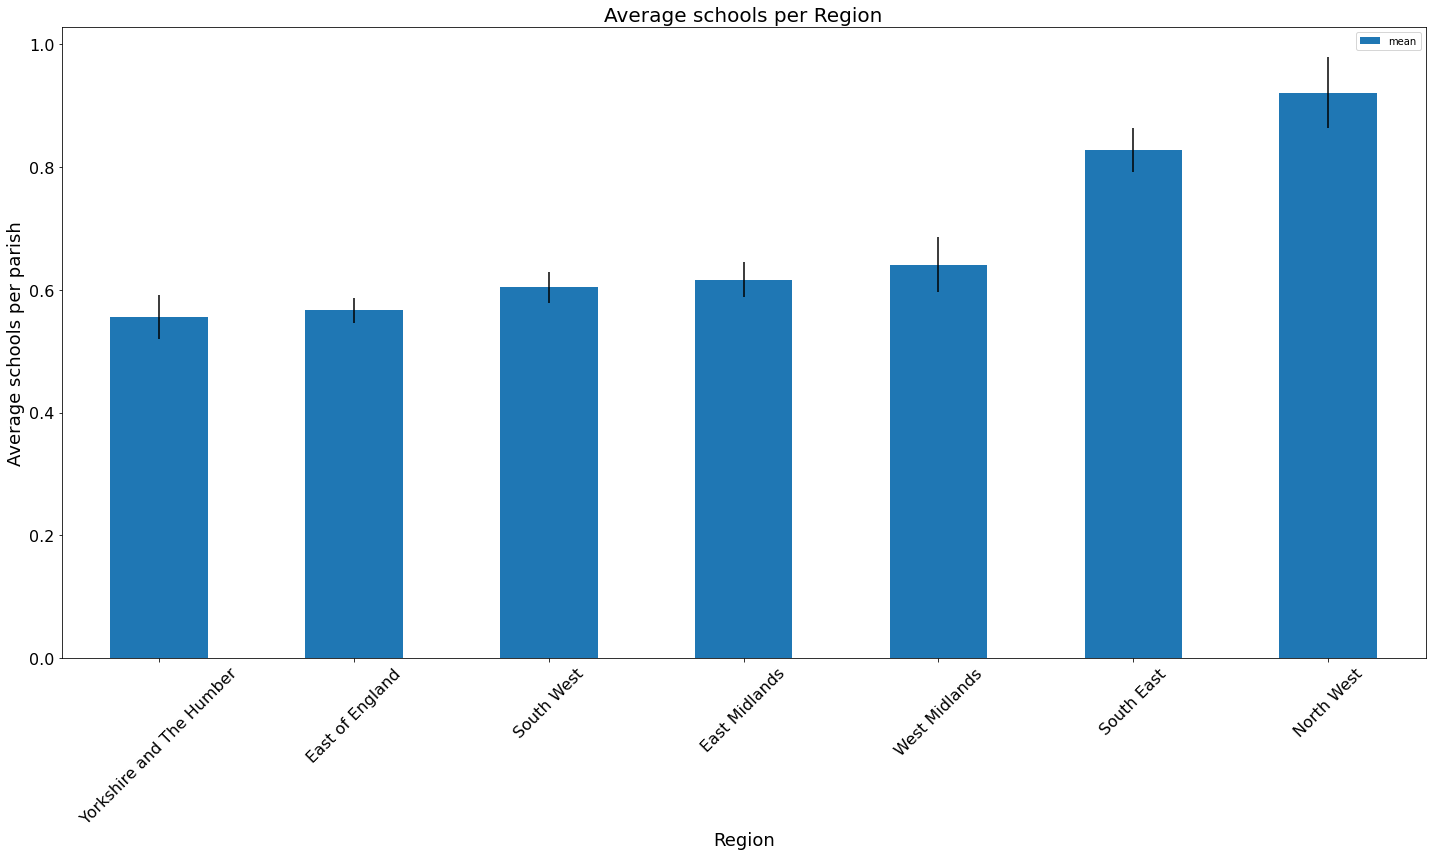

In [66]:
handy = real_rural_regions.groupby(['region']).school.agg(['mean', 'sem']).sort_values(by='mean')
fig, ax = plt.subplots(figsize=(20,12))
handy.plot(kind='bar', yerr='sem', ax=ax, rot=45)
plt.tight_layout()
#plt.legend(None)
plt.xlabel('Region', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average schools per parish', fontsize=18)
plt.title('Average schools per Region', fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('results/schools_per_region.png')
plt.show()

In [67]:
real_rural_regions.groupby(['region']).place_of_worship.agg(['mean', 'sem']).sort_values(by='mean')

mean       sem
region                                      
Yorkshire and The Humber  1.233969  0.042184
West Midlands             1.454545  0.048832
East Midlands             1.506143  0.036579
East of England           1.534171  0.025352
South West                1.604010  0.036791
South East                1.623472  0.037624
North West                1.663934  0.082155

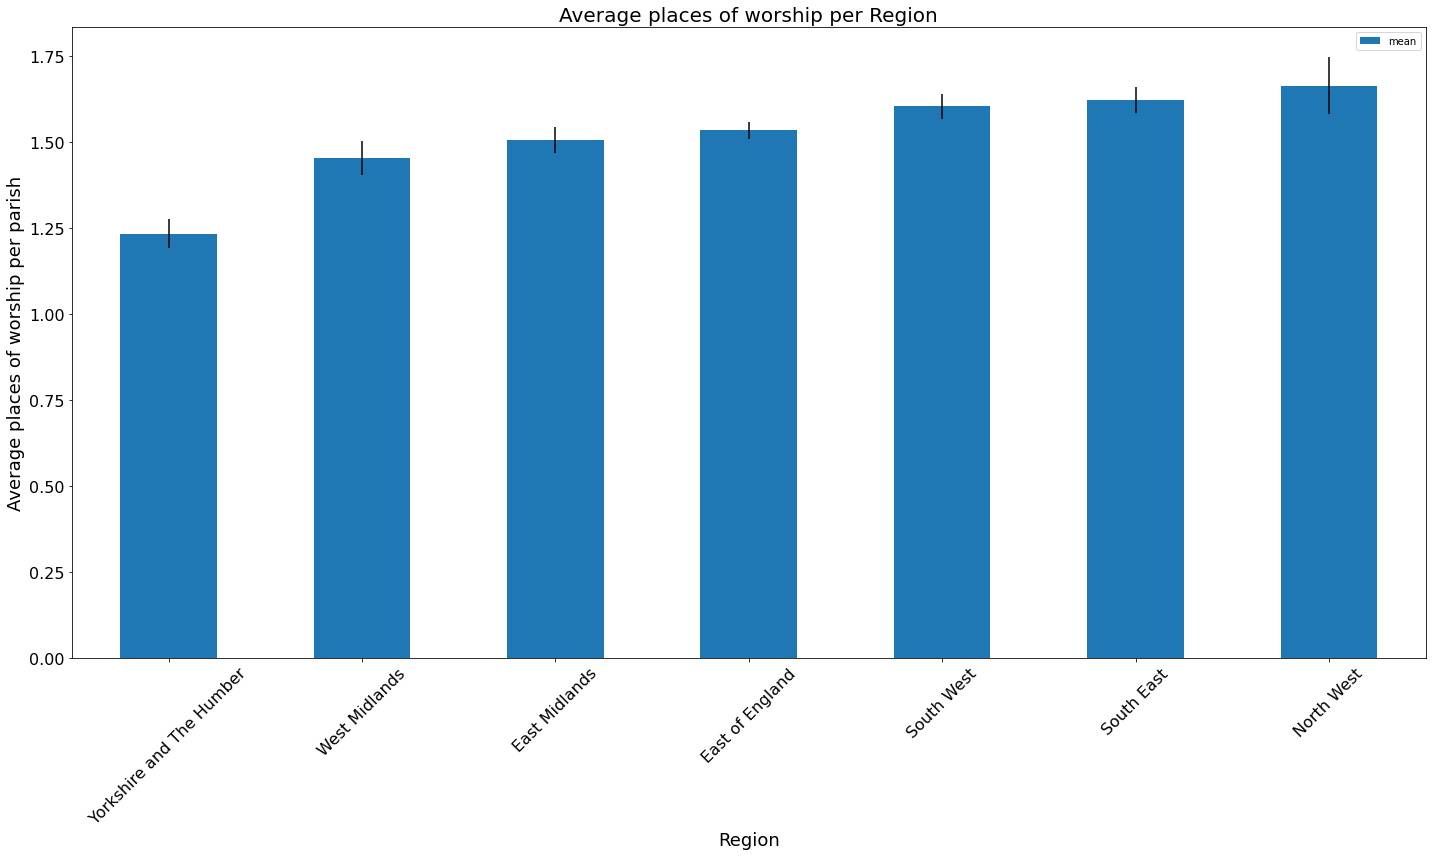

In [68]:
handy = real_rural_regions.groupby(['region']).place_of_worship.agg(['mean', 'sem']).sort_values(by='mean')
fig, ax = plt.subplots(figsize=(20,12))
handy.plot(kind='bar', yerr='sem', ax=ax, rot=45)
plt.tight_layout()
#plt.legend(None)
plt.xlabel('Region', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average places of worship per parish', fontsize=18)
plt.title('Average places of worship per Region', fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('results/worship_per_region.png')
plt.show()

In [69]:
real_rural_regions.groupby(['region']).population.agg(['mean', 'sem']).sort_values(by='mean')

mean        sem
region                                          
Yorkshire and The Humber   720.083189  45.113667
South West                 779.291980  31.617889
East Midlands              796.042998  37.379221
East of England            892.502749  31.712326
West Midlands              917.031100  58.331368
North West                1064.702186  77.079401
South East                1197.189487  48.684423

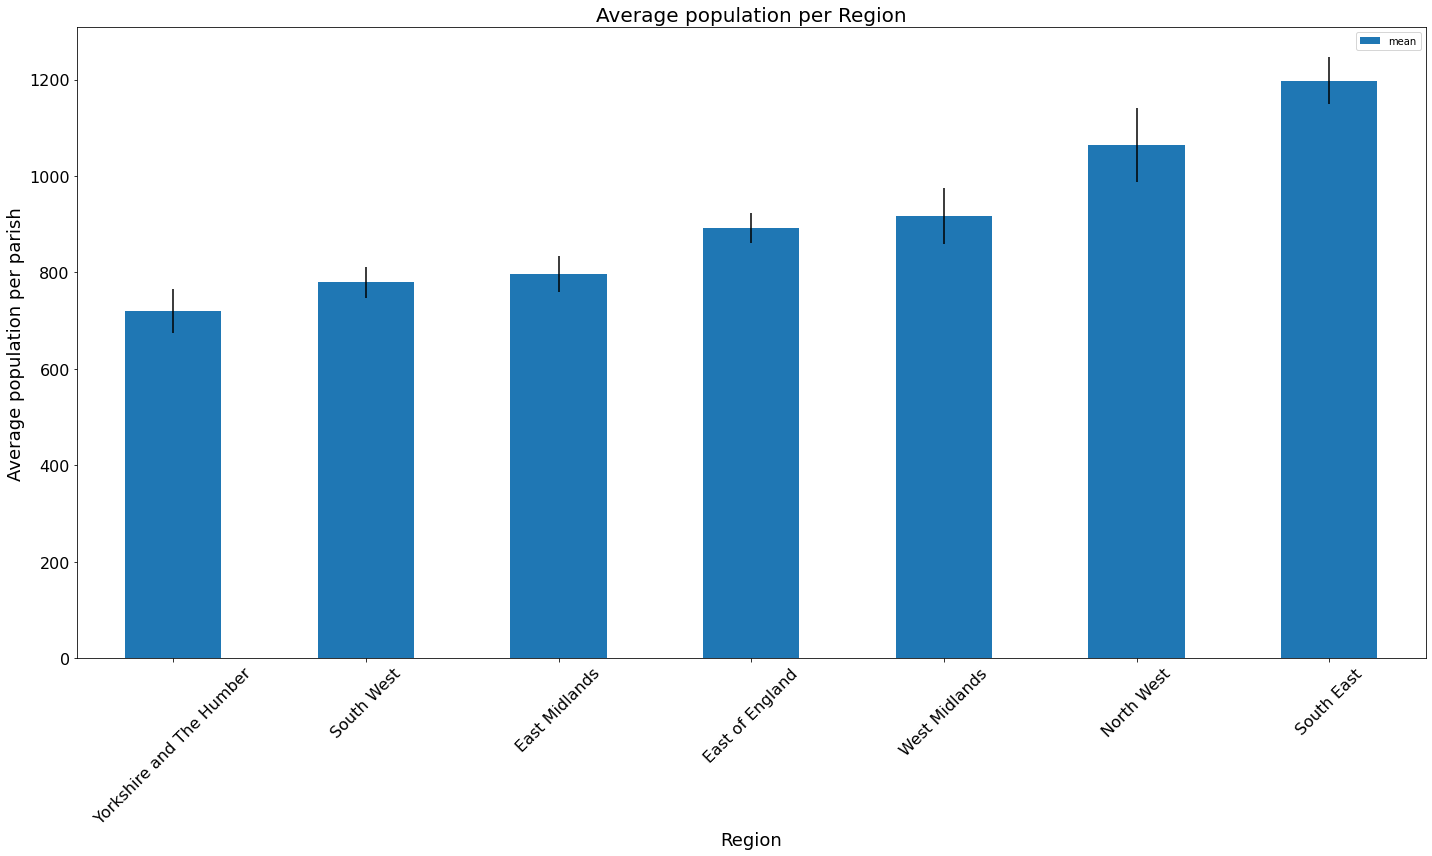

In [70]:
handy = real_rural_regions.groupby(['region']).population.agg(['mean', 'sem']).sort_values(by='mean')
fig, ax = plt.subplots(figsize=(20,12))
handy.plot(kind='bar', yerr='sem', ax=ax, rot=45)
plt.tight_layout()
#plt.legend(None)
plt.xlabel('Region', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average population per parish', fontsize=18)
plt.title('Average population per Region', fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('results/population_per_region.png')
plt.show()

In [71]:
real_rural_regions.groupby(['region']).area.agg(['mean','sem']).sort_values(by='mean')

mean           sem
region                                              
East of England           9.758333e+06  1.679430e+05
West Midlands             1.033817e+07  3.739264e+05
East Midlands             1.043814e+07  2.661419e+05
South East                1.173765e+07  2.723818e+05
Yorkshire and The Humber  1.209722e+07  4.985393e+05
South West                1.256206e+07  3.113705e+05
North West                2.077311e+07  1.067502e+06

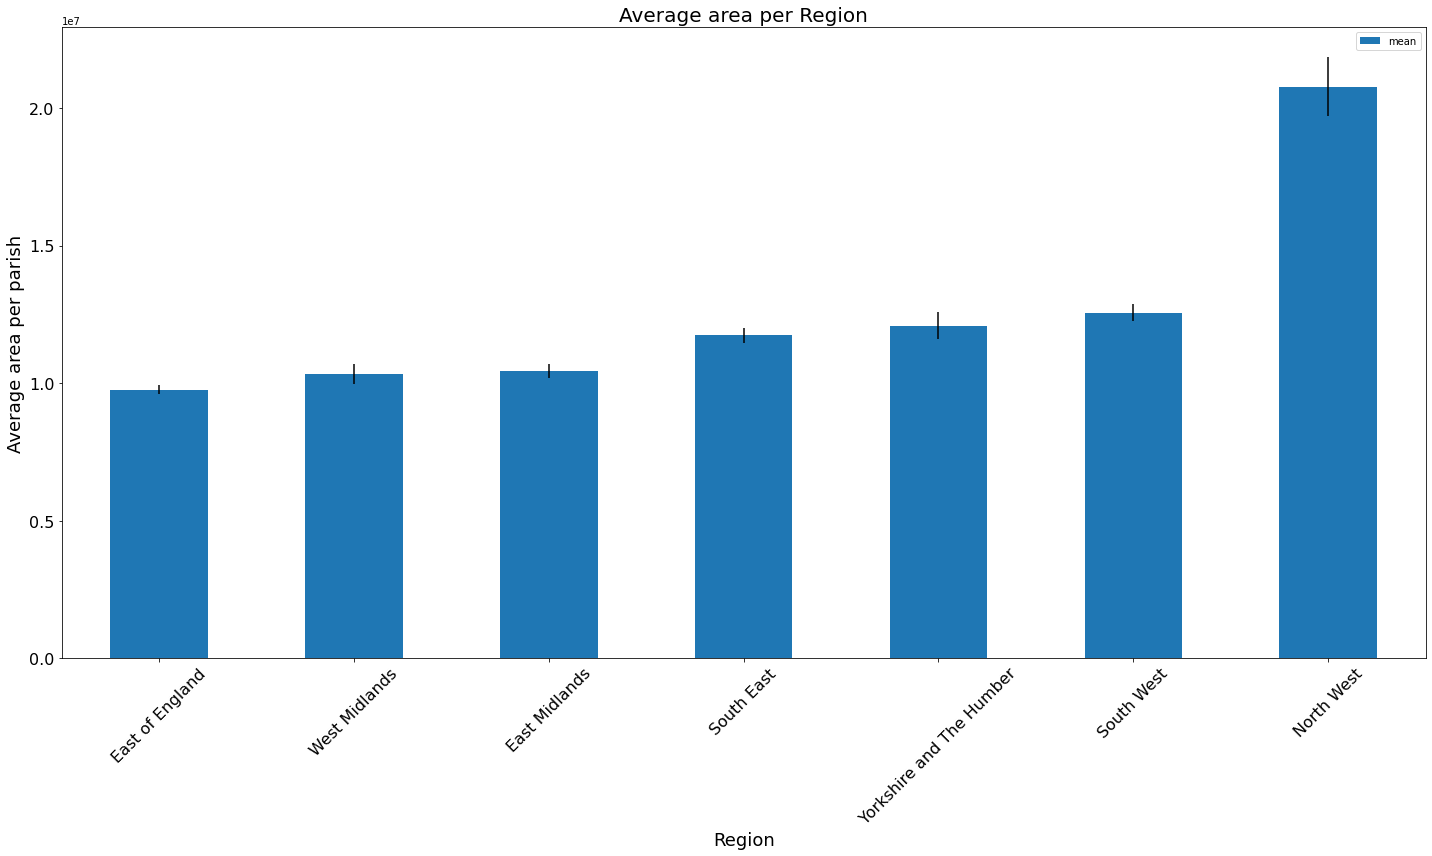

In [72]:
handy = real_rural_regions.groupby(['region']).area.agg(['mean', 'sem']).sort_values(by='mean')
fig, ax = plt.subplots(figsize=(20,12))
handy.plot(kind='bar', yerr='sem', ax=ax, rot=45)
plt.tight_layout()
#plt.legend(None)
plt.xlabel('Region', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average area per parish', fontsize=18)
plt.title('Average area per Region', fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('results/area_per_region.png')
plt.show()

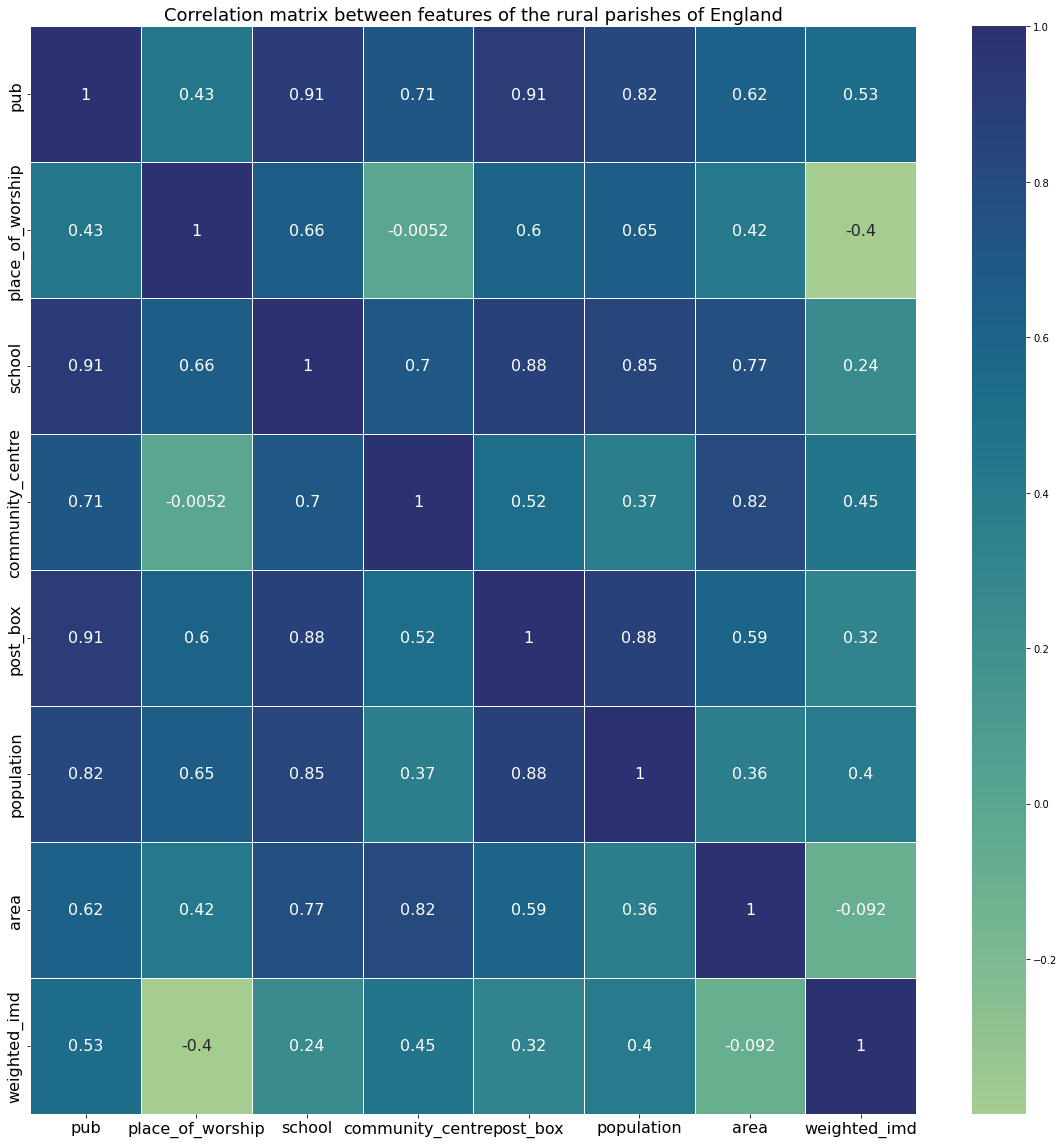

In [90]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(
    real_rural_regions.groupby(['region'])[['pub', 'place_of_worship', 'school', 'community_centre', 'post_box', 'population', 'area', 'weighted_imd']].agg('mean').corr(),
    ax=ax,
    annot=True,
    linewidth=.5,
    cmap='crest',
    annot_kws={'size': 16}
)
plt.title('Correlation matrix between features of the rural parishes of England', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('results/correlation_matrix.png')
plt.show()

## Pub model

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [91]:
to_keep = ['pub', 'school', 'place_of_worship', 'post_box', 'community_centre', 'weighted_imd', 'area', 'region', 'population', 'name']
predictor_frame = real_rural_regions[(to_keep)]
predictor_frame.head()

pub  school  place_of_worship  post_box  community_centre  weighted_imd  \
0    2       1                 2         0                 0       30238.0   
1    2       1                 1         2                 1       23934.0   
2    0       0                 1         0                 0       30238.0   
3    1       1                 2         1                 0       30238.0   
4    1       1                 2         2                 1       23934.0   

           area                    region  population           name  
0  7.898754e+06  Yorkshire and The Humber        1203  Bradleys Both  
1  6.695996e+06  Yorkshire and The Humber        1469       Cononley  
2  1.691419e+06  Yorkshire and The Humber         481       Farnhill  
3  3.710505e+06  Yorkshire and The Humber         222       Kildwick  
4  1.084977e+07  Yorkshire and The Humber         509    Lothersdale

### Calculate dispersion statistic

In [77]:
predictor_frame[['pub', 'school', 'place_of_worship']].apply(lambda x: np.percentile(x, 99.5))

pub                 8.0
school              4.0
place_of_worship    6.0
dtype: float64

In [78]:
buckets = 8
for fac in to_get:
    mean = np.mean(predictor_frame[fac])
    e_fac = [(np.exp(-mean) * math.pow(mean, i))/math.factorial(i) for i in range(buckets)]
    scaled_e_fac = [i*predictor_frame.shape[0] for i in e_fac]
    real_fac = predictor_frame.groupby([fac]).size()
    real_fac = real_fac.to_dict() 
    scaled_real_fac = [real_fac.get(i, 0) for i, j in enumerate(scaled_e_fac)]
    ## Add last bucket
    scaled_real_fac.append(predictor_frame[fac].shape[0] - np.sum(scaled_real_fac))
    scaled_e_fac.append(predictor_frame.shape[0] - np.sum(scaled_e_fac))    
    dof = len(scaled_real_fac) - 1
    loss_list = [((scaled_real_fac[i] - scaled_e_fac[i])**2)/scaled_e_fac[i] for i in range(len(scaled_real_fac))]
    dispersion = np.sum(loss_list)/dof
    contingency_table = [scaled_real_fac, scaled_e_fac]
#    print(contingency_table)
    stat, p, dof_2, expected = stats.chi2_contingency(contingency_table)
#    print("Dispersion for {0} is {1} (with {2} d.o.f)".format(fac, dispersion, dof))
    print("Stat for {0} is {1} (with p-value {2} and {3} d.o.f, dispersion is {4})".format(fac, stat, p, dof_2, stat/dof_2))

NameError: name 'stats' is not defined

### Facilities per person

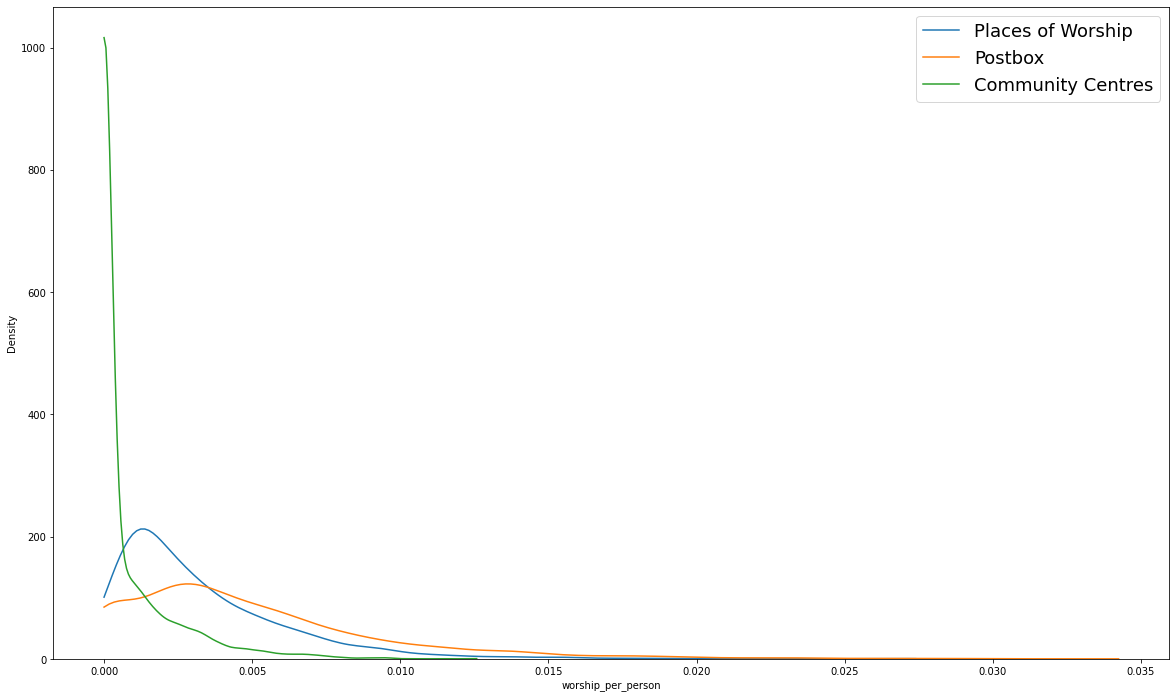

In [93]:
predictor_frame.loc[:, 'pubs_per_person'] = predictor_frame.pub / predictor_frame.population
predictor_frame.loc[:, 'schools_per_person'] = predictor_frame.school / predictor_frame.population
predictor_frame.loc[:, 'worship_per_person'] = predictor_frame.place_of_worship / predictor_frame.population
predictor_frame.loc[:, 'postbox_per_person'] = predictor_frame.post_box / predictor_frame.population
predictor_frame.loc[:, 'community_centre_per_person'] = predictor_frame.community_centre / predictor_frame.population
fig, ax = plt.subplots(figsize=(20,12))
#sns.kdeplot(predictor_frame.pubs_per_person, cut=0, label='Pubs', ax=ax)
#sns.kdeplot(predictor_frame.schools_per_person, cut=0, label='Schools', ax=ax)
sns.kdeplot(predictor_frame.worship_per_person, cut=0, label='Places of Worship', ax=ax)
sns.kdeplot(predictor_frame.postbox_per_person, cut=0, label='Postbox', ax=ax)
sns.kdeplot(predictor_frame.community_centre_per_person, cut=0, label='Community Centres', ax=ax)
plt.legend(fontsize=18)
plt.show()

## Fitting the model

In [94]:
predictor_frame.head()

pub  school  place_of_worship  post_box  community_centre  weighted_imd  \
0    2       1                 2         0                 0       30238.0   
1    2       1                 1         2                 1       23934.0   
2    0       0                 1         0                 0       30238.0   
3    1       1                 2         1                 0       30238.0   
4    1       1                 2         2                 1       23934.0   

           area                    region  population           name  \
0  7.898754e+06  Yorkshire and The Humber        1203  Bradleys Both   
1  6.695996e+06  Yorkshire and The Humber        1469       Cononley   
2  1.691419e+06  Yorkshire and The Humber         481       Farnhill   
3  3.710505e+06  Yorkshire and The Humber         222       Kildwick   
4  1.084977e+07  Yorkshire and The Humber         509    Lothersdale   

   pubs_per_person  schools_per_person  worship_per_person  \
0         0.001663            0.000831            0.001663   
1         0.001361            0.000681            0.000681   
2         0.000000            0.000000            0.002079   
3         0.004505            0.004505            0.009009   
4         0.001965            0.001965            0.003929   

   postbox_per_person  community_centre_per_person  
0            0.000000                     0.000000  
1            0.001361                     0.000681  
2            0.000000                     0.000000  
3            0.004505                     0.000000  
4            0.003929                     0.001965

$$Y(t) = Y_{0}N(t)^{\beta}$$

$$ ln(Y(t)) = ln(Y_{0}) +  \beta ln(N(t))$$

In [105]:
x = np.log(predictor_frame.population.values)
X = sm.add_constant(x)
y = np.log(predictor_frame.pub.values+1)

In [106]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3208.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:52:31   Log-Likelihood:                -2774.2
No. Observations:                5064   AIC:                             5552.
Df Residuals:                    5062   BIC:                             5565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5674      0.040    -39.526      0.0

$$ln(Y(t)) = ln(Y_{0}) + \beta ln(N(t))$$ where $$ln(Y_{0})=-1.5674$$ and $$\beta=0.3524$$

In [107]:
np.exp(-1.5674)

0.20858680363369514

$$Y(t+1) = 0.209N(t)^{0.3524}$$

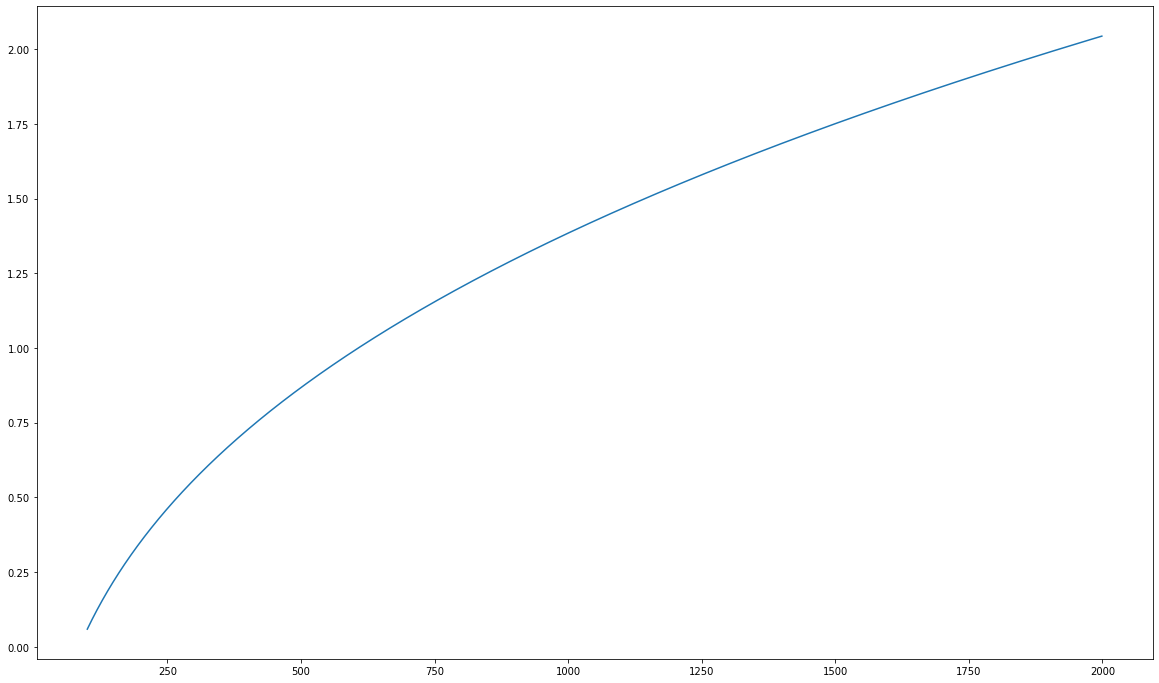

In [110]:
x = np.arange(100,2000)
y = [(0.209 * (i**0.3524)) - 1 for i in x]
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(x,y, label='model')

$$Y(t) = Y_{0}I_{0}A_{0}N_{0}^{\beta}$$

$$ln(Y(t+1)) = ln(Y_{0}) + ln(I_{0}) + ln(A_{0}) + \beta ln(N_{0})$$

In [119]:
pop = np.log(predictor_frame.population.values)
imd = np.log(predictor_frame.weighted_imd.values)
area = np.log(predictor_frame.area.values)
x = np.column_stack((pop, imd, area))
X = sm.add_constant(x)
y = np.log(predictor_frame.place_of_worship.values+1)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     516.7
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          6.21e-293
Time:                        21:17:49   Log-Likelihood:                -1423.0
No. Observations:                5064   AIC:                             2854.
Df Residuals:                    5060   BIC:                             2880.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7397      0.188     -9.252      0.0

In [120]:
predictor_frame.loc[:, 'worship_preds'] = res.predict(X) + 1
predictor_frame.head()

pub  school  place_of_worship  post_box  community_centre  weighted_imd  \
0    2       1                 2         0                 0       30238.0   
1    2       1                 1         2                 1       23934.0   
2    0       0                 1         0                 0       30238.0   
3    1       1                 2         1                 0       30238.0   
4    1       1                 2         2                 1       23934.0   

           area                    region  population           name  \
0  7.898754e+06  Yorkshire and The Humber        1203  Bradleys Both   
1  6.695996e+06  Yorkshire and The Humber        1469       Cononley   
2  1.691419e+06  Yorkshire and The Humber         481       Farnhill   
3  3.710505e+06  Yorkshire and The Humber         222       Kildwick   
4  1.084977e+07  Yorkshire and The Humber         509    Lothersdale   

   pubs_per_person  schools_per_person  worship_per_person  \
0         0.001663            0.000831            0.001663   
1         0.001361            0.000681            0.000681   
2         0.000000            0.000000            0.002079   
3         0.004505            0.004505            0.009009   
4         0.001965            0.001965            0.003929   

   postbox_per_person  community_centre_per_person  pub_preds  school_preds  \
0            0.000000                     0.000000   1.933150      1.661897   
1            0.001361                     0.000681   1.959349      1.698879   
2            0.000000                     0.000000   1.468069      1.273129   
3            0.004505                     0.000000   1.304658      1.085312   
4            0.003929                     0.001965   1.670131      1.401501   

   worship_preds  
0       1.943387  
1       1.958151  
2       1.631715  
3       1.607119  
4       1.856535

In [133]:
just_dummies = pd.get_dummies(predictor_frame.region)
just_dummies.drop(['East of England'], inplace=True, axis=1)
pop = np.log(predictor_frame.population.values)
imd = np.log(predictor_frame.weighted_imd.values)
area = np.log(predictor_frame.area.values)
x = np.column_stack((pop, imd, area, just_dummies))
X = sm.add_constant(x)
y = np.log(predictor_frame.pub.values+1)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     402.7
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:34:39   Log-Likelihood:                -2648.4
No. Observations:                5064   AIC:                             5317.
Df Residuals:                    5054   BIC:                             5382.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6878      0.244    -15.106      0.0

In [141]:
predictor_frame.head()

pub  school  place_of_worship  post_box  community_centre  weighted_imd  \
0    2       1                 2         0                 0       30238.0   
1    2       1                 1         2                 1       23934.0   
2    0       0                 1         0                 0       30238.0   
3    1       1                 2         1                 0       30238.0   
4    1       1                 2         2                 1       23934.0   

           area                    region  population           name  \
0  7.898754e+06  Yorkshire and The Humber        1203  Bradleys Both   
1  6.695996e+06  Yorkshire and The Humber        1469       Cononley   
2  1.691419e+06  Yorkshire and The Humber         481       Farnhill   
3  3.710505e+06  Yorkshire and The Humber         222       Kildwick   
4  1.084977e+07  Yorkshire and The Humber         509    Lothersdale   

   pubs_per_person  schools_per_person  worship_per_person  \
0         0.001663            0.000831            0.001663   
1         0.001361            0.000681            0.000681   
2         0.000000            0.000000            0.002079   
3         0.004505            0.004505            0.009009   
4         0.001965            0.001965            0.003929   

   postbox_per_person  community_centre_per_person  pub_preds  school_preds  \
0            0.000000                     0.000000   1.933150      1.661897   
1            0.001361                     0.000681   1.959349      1.698879   
2            0.000000                     0.000000   1.468069      1.273129   
3            0.004505                     0.000000   1.304658      1.085312   
4            0.003929                     0.001965   1.670131      1.401501   

   worship_preds  
0       1.943387  
1       1.958151  
2       1.631715  
3       1.607119  
4       1.856535

In [146]:
form = "np.log(school+1) ~ np.log(population) + np.log(area) + np.log(weighted_imd) + C(region)"
res = sm.formula.ols(formula=form, data=predictor_frame).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(school + 1)   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     606.4
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:57:49   Log-Likelihood:                -1159.7
No. Observations:                5064   AIC:                             2339.
Df Residuals:                    5054   BIC:                             2405.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [135]:
just_dummies.columns

Index(['East Midlands', 'North West', 'South East', 'South West',
       'West Midlands', 'Yorkshire and The Humber'],
      dtype='object')

### Double log plot

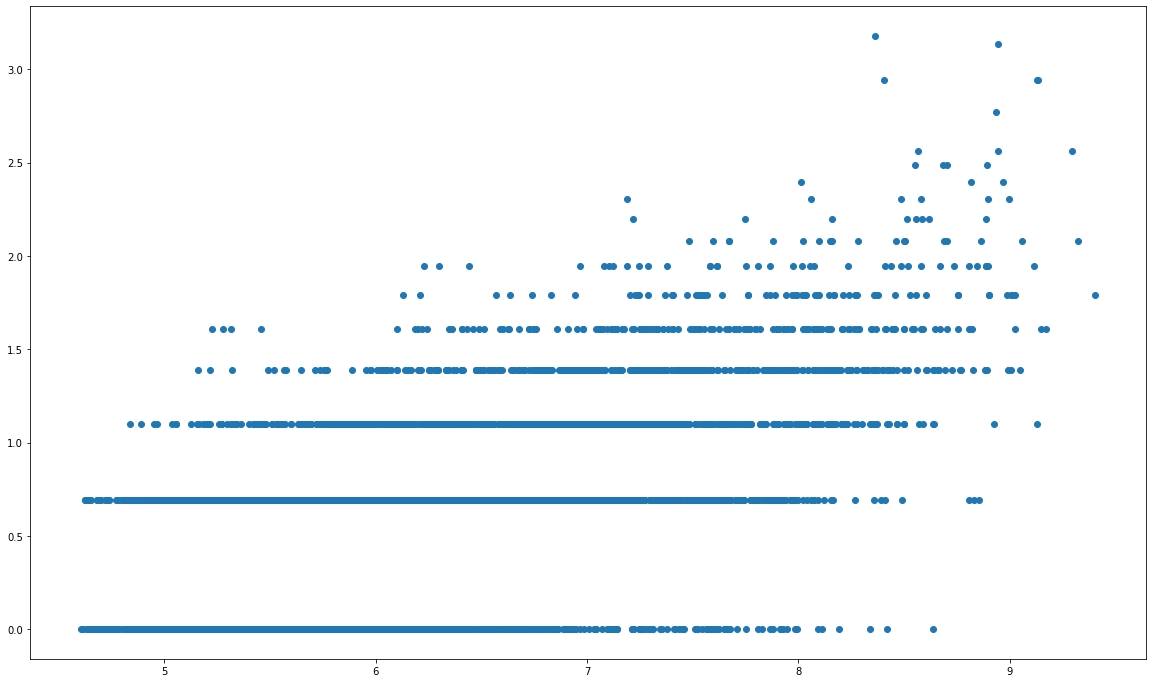

In [152]:
predictor_frame.loc[:, 'ln_population'] = np.log(predictor_frame.population)
predictor_frame.loc[:, 'population_grouped'] = predictor_frame.population.apply(
lambda x: 100*np.round(x/100) if x <= 1000 else 250*np.round(x/250) if x <= 2000 else np.round(x/1000)*1000 if x <= 5000 else np.round(x/5000)*5000
)


fig, ax = plt.subplots(figsize=(20,12))
plt.scatter(predictor_frame.ln_population, np.log(predictor_frame.pub + 1), label='pub')
plt.show()

In [1136]:
def make_fittedvalues_resid_plot(fit):
    plt.figure()
    plt.scatter(fit.fittedvalues, fit.resid, color='b')
    plt.axhline(y=0, color='r')
    plt.xlabel("Fitted value")
    plt.ylabel("Residual")
    return

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/1297800702.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(


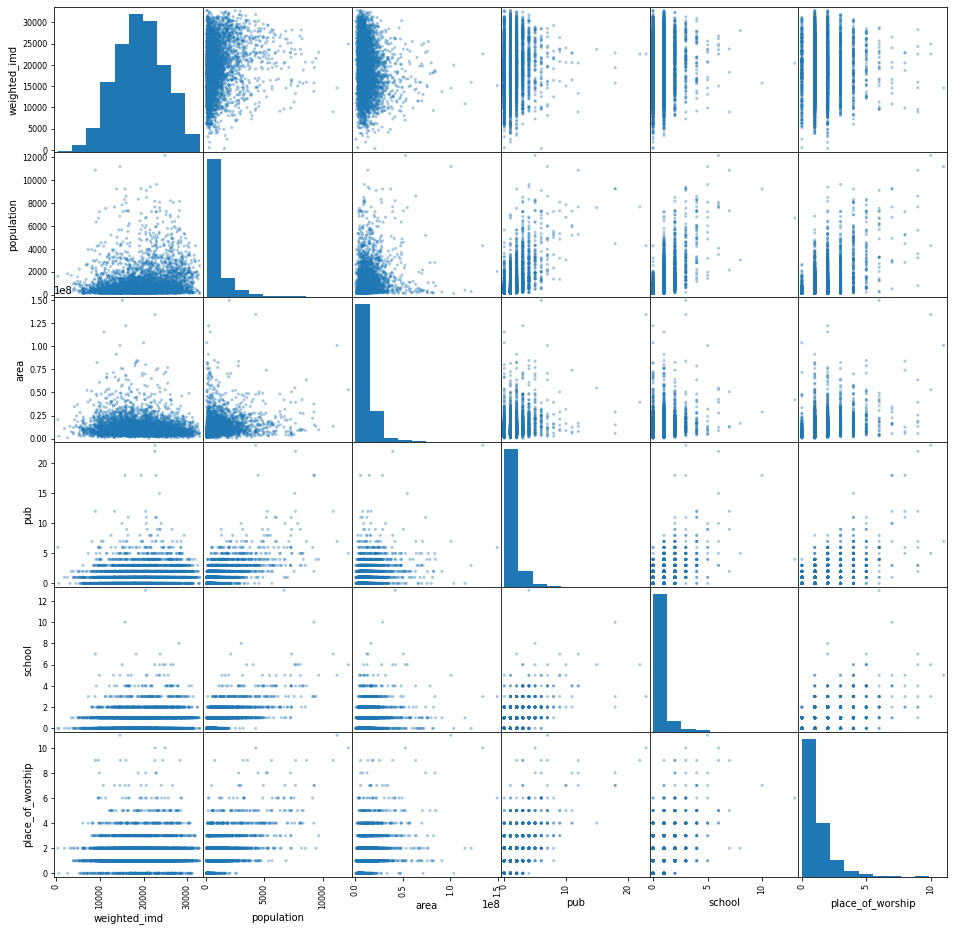

In [1137]:
fig, ax = plt.subplots(figsize=(16,16))
pd.plotting.scatter_matrix(
    predictor_frame[[
      'weighted_imd',
        'population',
        'area',
        'pub',
        'school',
        'place_of_worship'
    ]],
    alpha=0.4,
    ax=ax
)
plt.show()

In [1138]:
predictor_frame['ln_area'] = np.log(predictor_frame.area)
predictor_frame['ln_population'] = np.log(predictor_frame.population)

## Logistic prediction

In [1139]:
predictor_frame.loc[:, 'pub_bool'] = predictor_frame.pub > 0
predictor_frame.loc[:, 'pub_bool'] = predictor_frame.pub_bool.astype(int)
predictor_frame.loc[:, 'school_bool'] = predictor_frame.school > 0
predictor_frame.loc[:, 'school_bool'] = predictor_frame.school_bool.astype(int)
predictor_frame.loc[:, 'worship_bool'] = predictor_frame.place_of_worship > 0
predictor_frame.loc[:, 'worship_bool'] = predictor_frame.worship_bool.astype(int)
predictor_frame.head()

pub  school  place_of_worship  weighted_imd          area  \
0    2       1                 2       30238.0  7.898754e+06   
1    2       1                 1       23934.0  6.695996e+06   
2    0       0                 1       30238.0  1.691419e+06   
3    1       1                 2       30238.0  3.710505e+06   
4    1       1                 2       23934.0  1.084977e+07   

                     region  population           name    ln_area  \
0  Yorkshire and The Humber        1203  Bradleys Both  15.882216   
1  Yorkshire and The Humber        1469       Cononley  15.717020   
2  Yorkshire and The Humber         481       Farnhill  14.341078   
3  Yorkshire and The Humber         222       Kildwick  15.126678   
4  Yorkshire and The Humber         509    Lothersdale  16.199655   

   ln_population  pub_bool  school_bool  worship_bool  pubs_per_person  \
0       7.092574         1            1             1         0.001663   
1       7.292337         1            1             1         0.001361   
2       6.175867         0            0             1         0.000000   
3       5.402677         1            1             1         0.004505   
4       6.232448         1            1             1         0.001965   

   schools_per_person  worship_per_person  
0            0.000831            0.001663  
1            0.000681            0.000681  
2            0.000000            0.002079  
3            0.004505            0.009009  
4            0.001965            0.003929

In [1153]:
log_reg = smf.logit("pub_bool ~ weighted_imd + ln_population + ln_area", data=predictor_frame).fit()

Optimization terminated successfully.
         Current function value: 0.501965
         Iterations 6


In [1154]:

log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pub_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.1929
Time:                        15:37:21   Log-Likelihood:                -2541.9
converged:                       True   LL-Null:                       -3149.5
Covariance Type:            nonrobust   LLR p-value:                3.865e-263
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.9281      0.953    -14.623      0.000     -15.795     -12.061
weighted_imd   3.396e-05   6.54e-06      5.190      0.000    2.11e-05    4.68e-05
ln_population     1.2833      0.052     24.851      0.000       1.182       1.385
ln_area           0.3916      0.059      6.615      0.000       0.276       0.508
=================================================================================
"""

In [ ]:
plt.suptitle

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3764099361.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(


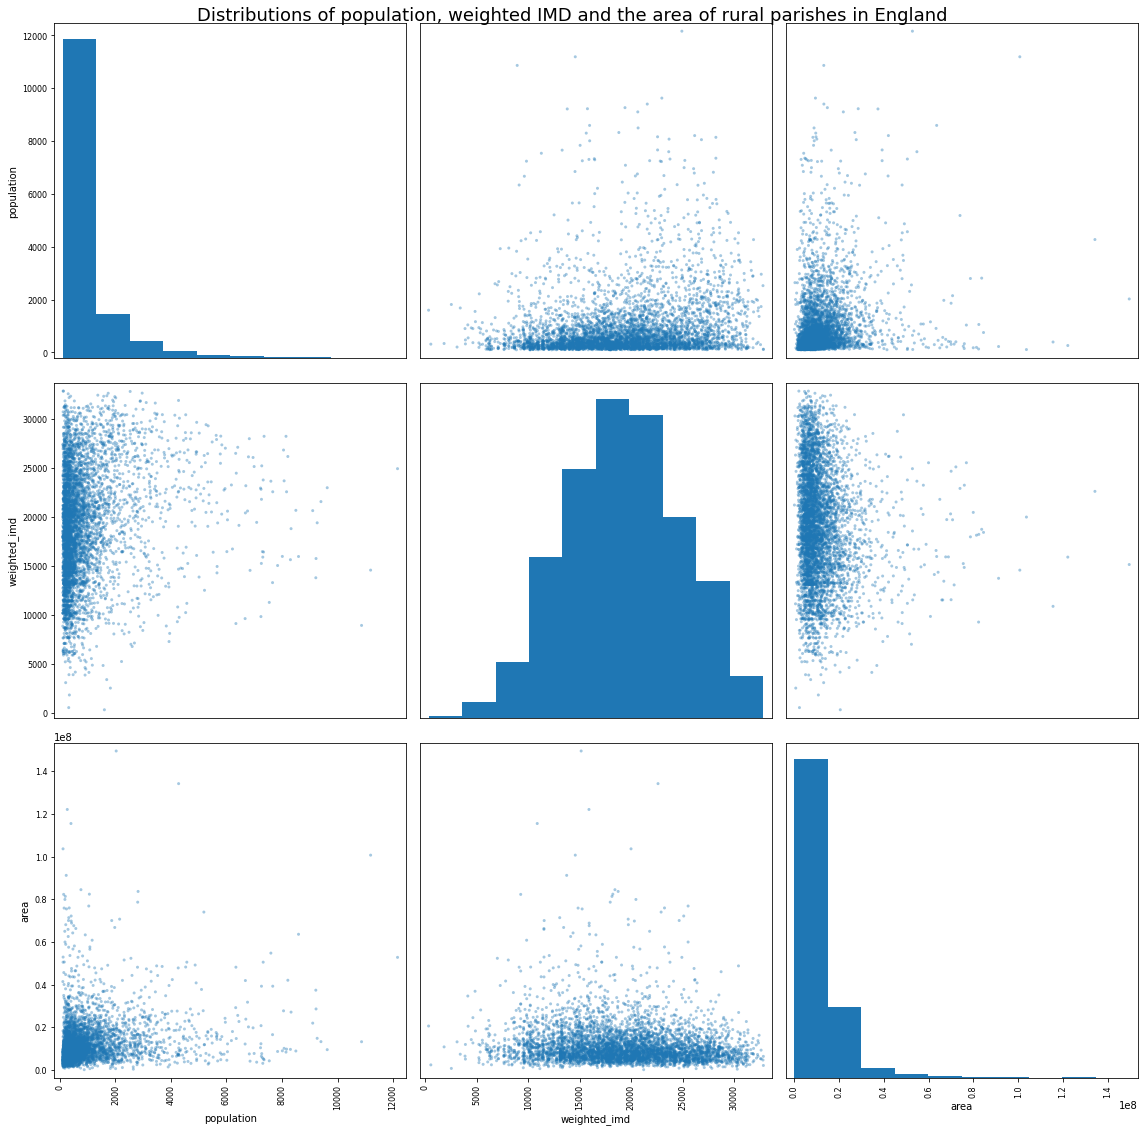

In [1184]:
fig, ax = plt.subplots(figsize=(16,16))
pd.plotting.scatter_matrix(
    predictor_frame[['population', 'weighted_imd', 'area']],
    alpha=0.4, ax=ax
)
plt.suptitle('Distributions of population, weighted IMD and the area of rural parishes in England', fontsize=18)
plt.tight_layout()
plt.savefig('results/distribution_of_values.png')
plt.show()

In [1150]:
predictor_frame.head()

pub  school  place_of_worship  weighted_imd          area  \
0    2       1                 2       30238.0  7.898754e+06   
1    2       1                 1       23934.0  6.695996e+06   
2    0       0                 1       30238.0  1.691419e+06   
3    1       1                 2       30238.0  3.710505e+06   
4    1       1                 2       23934.0  1.084977e+07   

                     region  population           name    ln_area  \
0  Yorkshire and The Humber        1203  Bradleys Both  15.882216   
1  Yorkshire and The Humber        1469       Cononley  15.717020   
2  Yorkshire and The Humber         481       Farnhill  14.341078   
3  Yorkshire and The Humber         222       Kildwick  15.126678   
4  Yorkshire and The Humber         509    Lothersdale  16.199655   

   ln_population  pub_bool  school_bool  worship_bool  pubs_per_person  \
0       7.092574         1            1             1         0.001663   
1       7.292337         1            1             1         0.001361   
2       6.175867         0            0             1         0.000000   
3       5.402677         1            1             1         0.004505   
4       6.232448         1            1             1         0.001965   

   schools_per_person  worship_per_person  
0            0.000831            0.001663  
1            0.000681            0.000681  
2            0.000000            0.002079  
3            0.004505            0.009009  
4            0.001965            0.003929

In [121]:
wide_frame = pd.concat([predictor_frame,pd.get_dummies(predictor_frame.region)], axis=1)
wide_frame.head()

pub  school  place_of_worship  post_box  community_centre  weighted_imd  \
0    2       1                 2         0                 0       30238.0   
1    2       1                 1         2                 1       23934.0   
2    0       0                 1         0                 0       30238.0   
3    1       1                 2         1                 0       30238.0   
4    1       1                 2         2                 1       23934.0   

           area                    region  population           name  ...  \
0  7.898754e+06  Yorkshire and The Humber        1203  Bradleys Both  ...   
1  6.695996e+06  Yorkshire and The Humber        1469       Cononley  ...   
2  1.691419e+06  Yorkshire and The Humber         481       Farnhill  ...   
3  3.710505e+06  Yorkshire and The Humber         222       Kildwick  ...   
4  1.084977e+07  Yorkshire and The Humber         509    Lothersdale  ...   

   pub_preds  school_preds  worship_preds  East Midlands  East of England  \
0   1.933150      1.661897       1.943387              0                0   
1   1.959349      1.698879       1.958151              0                0   
2   1.468069      1.273129       1.631715              0                0   
3   1.304658      1.085312       1.607119              0                0   
4   1.670131      1.401501       1.856535              0                0   

   North West  South East  South West  West Midlands  Yorkshire and The Humber  
0           0           0           0              0                         1  
1           0           0           0              0                         1  
2           0           0           0              0                         1  
3           0           0           0              0                         1  
4           0           0           0              0                         1  

[5 rows x 25 columns]

In [1157]:
wide_frame.groupby(['region']).size()

region
East Midlands                814
East of England             1273
North West                   366
South East                   818
South West                   798
West Midlands                418
Yorkshire and The Humber     577
dtype: int64

In [1158]:
log_reg = smf.logit(
    "pub_bool ~ weighted_imd + ln_population + ln_area + Q('East Midlands')  + Q('Yorkshire and The Humber') + Q('North West') + Q('South East') + Q('South West') + Q('West Midlands')"
    , data=wide_frame
).fit()

Optimization terminated successfully.
         Current function value: 0.496495
         Iterations 7


In [1159]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               pub_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5054
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.2017
Time:                        15:37:42   Log-Likelihood:                -2514.3
converged:                       True   LL-Null:                       -3149.5
Covariance Type:            nonrobust   LLR p-value:                7.258e-268
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -14.1146      0.989    -14.272      0.000     -16.053     -12.176
weighted_imd                   2.715e-05   6.71e-06      4.043      0.000 

## School model

In [1160]:
predictor_frame.head()

pub  school  place_of_worship  weighted_imd          area  \
0    2       1                 2       30238.0  7.898754e+06   
1    2       1                 1       23934.0  6.695996e+06   
2    0       0                 1       30238.0  1.691419e+06   
3    1       1                 2       30238.0  3.710505e+06   
4    1       1                 2       23934.0  1.084977e+07   

                     region  population           name    ln_area  \
0  Yorkshire and The Humber        1203  Bradleys Both  15.882216   
1  Yorkshire and The Humber        1469       Cononley  15.717020   
2  Yorkshire and The Humber         481       Farnhill  14.341078   
3  Yorkshire and The Humber         222       Kildwick  15.126678   
4  Yorkshire and The Humber         509    Lothersdale  16.199655   

   ln_population  pub_bool  school_bool  worship_bool  pubs_per_person  \
0       7.092574         1            1             1         0.001663   
1       7.292337         1            1             1         0.001361   
2       6.175867         0            0             1         0.000000   
3       5.402677         1            1             1         0.004505   
4       6.232448         1            1             1         0.001965   

   schools_per_person  worship_per_person  
0            0.000831            0.001663  
1            0.000681            0.000681  
2            0.000000            0.002079  
3            0.004505            0.009009  
4            0.001965            0.003929

In [1163]:
predictor_frame.loc[:, 'school_bool'] = predictor_frame.school > 0
predictor_frame.school_bool = predictor_frame.school_bool.astype(int)
school_1 = 'school_bool ~ ln_population + weighted_imd + ln_area'
school_fit_2 = smf.logit("school_bool ~ weighted_imd + ln_population + ln_area", data=predictor_frame).fit()
school_fit_2.summary()

Optimization terminated successfully.
         Current function value: 0.419463
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            school_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.3947
Time:                        15:37:55   Log-Likelihood:                -2124.2
converged:                       True   LL-Null:                       -3509.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -22.6832      1.122    -20.223      0.000     -24.882     -20.485
weighted_imd   3.099e-05   7.35e-06      4.216      0.000    1.66e-05    4.54e-05
ln_population     2.2499      0.066     33.868      0.000       2.120       2.380
ln_area           0.4995      0.066      7.606      0.000       0.371       0.628
=================================================================================
"""

In [1164]:

log_reg_school = smf.logit(
    "school_bool ~ weighted_imd + ln_population + ln_area + Q('East Midlands') + Q('Yorkshire and The Humber') + Q('North West') + Q('South East') + Q('South West') + Q('West Midlands')"
    , data=wide_frame
).fit()

Optimization terminated successfully.
         Current function value: 0.415077
         Iterations 7


In [1165]:
print(log_reg_school.summary())

                           Logit Regression Results                           
Dep. Variable:            school_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5054
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.4011
Time:                        15:38:00   Log-Likelihood:                -2102.0
converged:                       True   LL-Null:                       -3509.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -21.9316      1.150    -19.076      0.000     -24.185     -19.678
weighted_imd                    2.86e-05   7.56e-06      3.783      0.000 

## Worship model

In [1166]:
worship_fit_2 = smf.logit("worship_bool ~ weighted_imd + ln_population + ln_area", data=predictor_frame).fit()
worship_fit_2.summary()

Optimization terminated successfully.
         Current function value: 0.206256
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           worship_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                 0.08502
Time:                        15:38:27   Log-Likelihood:                -1044.5
converged:                       True   LL-Null:                       -1141.5
Covariance Type:            nonrobust   LLR p-value:                 7.891e-42
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.8306      1.666     -8.301      0.000     -17.096     -10.565
weighted_imd  -1.957e-06   1.13e-05     -0.173      0.863   -2.41e-05    2.02e-05
ln_population     0.6896      0.086      8.060      0.000       0.522       0.857
ln_area           0.7869      0.107      7.339      0.000       0.577       0.997
=================================================================================
"""

In [1232]:
log_reg_worship = smf.logit(
    "worship_bool ~ weighted_imd + ln_population + ln_area + Q('East Midlands') + Q('Yorkshire and The Humber') + Q('North West') + Q('South East') + Q('South West') + Q('West Midlands')"
    , data=wide_frame
).fit()

Optimization terminated successfully.
         Current function value: 0.181469
         Iterations 8


In [1233]:
print(log_reg_worship.summary())

                           Logit Regression Results                           
Dep. Variable:           worship_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5054
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.1950
Time:                        20:50:22   Log-Likelihood:                -918.96
converged:                       True   LL-Null:                       -1141.5
Covariance Type:            nonrobust   LLR p-value:                 3.114e-90
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -16.9114      1.723     -9.813      0.000     -20.289     -13.534
weighted_imd                   2.257e-05   1.16e-05      1.952      0.051 

### Plotting predictions

In [1235]:
a = [3]

3*a

[3, 3, 3]

In [1236]:
dummy_populations = np.arange(100,2000)
avg_area = np.mean(predictor_frame.area)
avg_imd = np.mean(predictor_frame.weighted_imd)
regions = predictor_frame.region.drop_duplicates()
handy_frame = pd.DataFrame(columns=['population', 'region', 'area', 'weighted_imd'])
frame_base = {
    'population': [],
    'weighted_imd': [],
    'region': [],
    'area': []
}
for region in regions:
    for pop in dummy_populations:
        frame_base['population'].append(pop)
        frame_base['weighted_imd'].append(avg_imd)
        frame_base['region'].append(region)
        frame_base['area'].append(avg_area)

to_pred_frame = pd.DataFrame(frame_base)
to_pred_frame.head()

population  weighted_imd                    region          area
0         100  19217.282754  Yorkshire and The Humber  1.173960e+07
1         101  19217.282754  Yorkshire and The Humber  1.173960e+07
2         102  19217.282754  Yorkshire and The Humber  1.173960e+07
3         103  19217.282754  Yorkshire and The Humber  1.173960e+07
4         104  19217.282754  Yorkshire and The Humber  1.173960e+07

In [1237]:
to_pred_frame.loc[:, 'ln_area'] = np.log(to_pred_frame.area)
to_pred_frame.loc[:, 'ln_population'] = np.log(to_pred_frame.population)
to_pred_frame.head()

population  weighted_imd                    region          area  \
0         100  19217.282754  Yorkshire and The Humber  1.173960e+07   
1         101  19217.282754  Yorkshire and The Humber  1.173960e+07   
2         102  19217.282754  Yorkshire and The Humber  1.173960e+07   
3         103  19217.282754  Yorkshire and The Humber  1.173960e+07   
4         104  19217.282754  Yorkshire and The Humber  1.173960e+07   

     ln_area  ln_population  
0  16.278478       4.605170  
1  16.278478       4.615121  
2  16.278478       4.624973  
3  16.278478       4.634729  
4  16.278478       4.644391

In [1238]:
wide_pred_frame = pd.concat([to_pred_frame,pd.get_dummies(to_pred_frame.region)], axis=1)

In [1239]:
wide_pred_frame.loc[:, 'prob_worship'] = log_reg_worship.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_school'] = log_reg_school.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_pub'] = log_reg.predict(wide_pred_frame)
wide_pred_frame.head()

population  weighted_imd                    region          area  \
0         100  19217.282754  Yorkshire and The Humber  1.173960e+07   
1         101  19217.282754  Yorkshire and The Humber  1.173960e+07   
2         102  19217.282754  Yorkshire and The Humber  1.173960e+07   
3         103  19217.282754  Yorkshire and The Humber  1.173960e+07   
4         104  19217.282754  Yorkshire and The Humber  1.173960e+07   

     ln_area  ln_population  East Midlands  East of England  North West  \
0  16.278478       4.605170              0                0           0   
1  16.278478       4.615121              0                0           0   
2  16.278478       4.624973              0                0           0   
3  16.278478       4.634729              0                0           0   
4  16.278478       4.644391              0                0           0   

   South East  South West  West Midlands  Yorkshire and The Humber  \
0           0           0              0                         1   
1           0           0              0                         1   
2           0           0              0                         1   
3           0           0              0                         1   
4           0           0              0                         1   

   prob_worship  prob_school  prob_pub  
0      0.774383     0.029716  0.313651  
1      0.775389     0.030393  0.316439  
2      0.776382     0.031079  0.319212  
3      0.777362     0.031772  0.321970  
4      0.778330     0.032474  0.324714

### Plotting

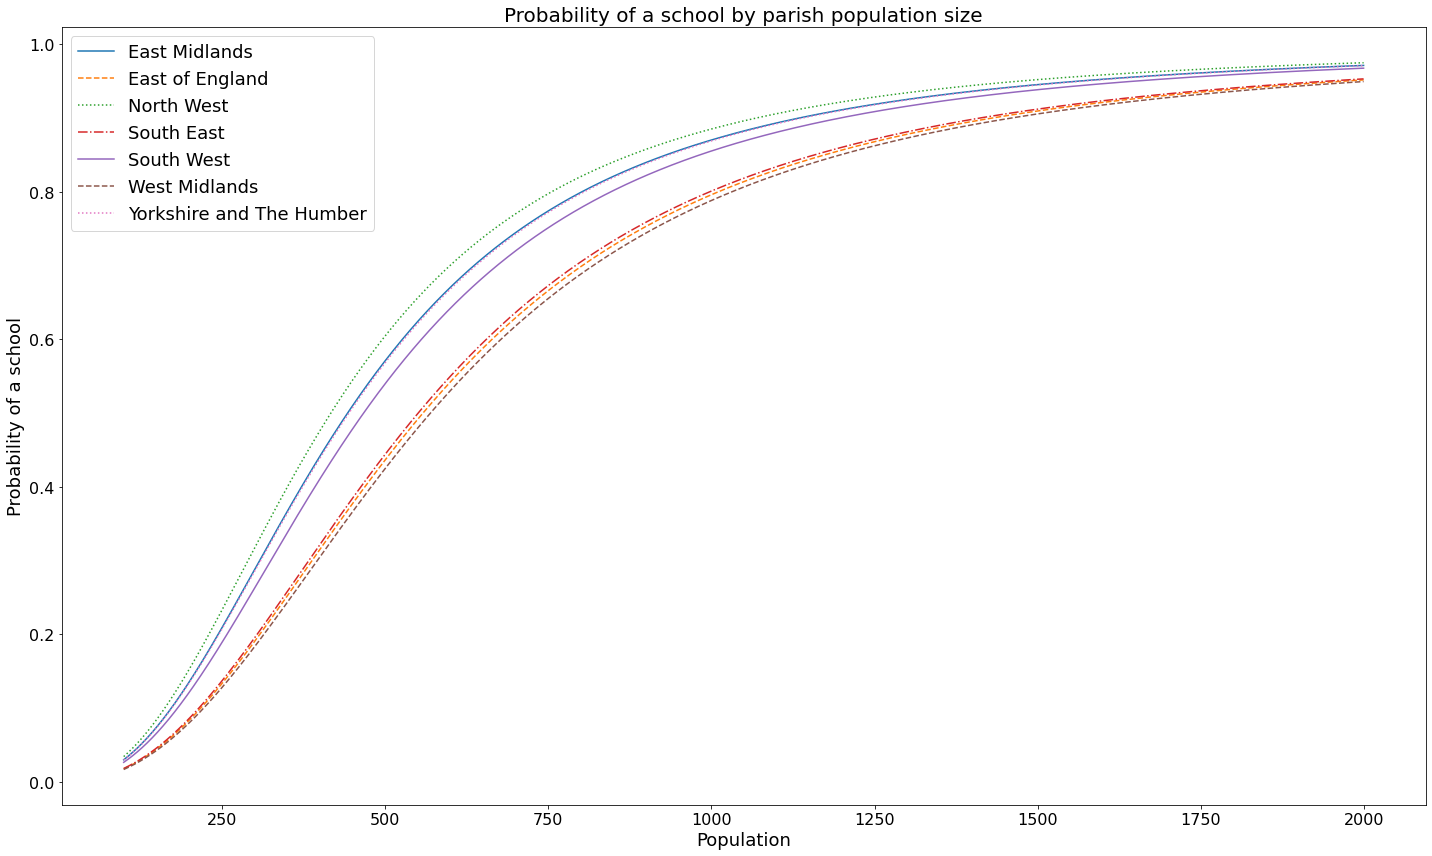

In [1240]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.population, frame.prob_school, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a school', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a school by parish population size', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_school_by_region.png')
plt.show()

In [1241]:
wide_pred_frame[wide_pred_frame.prob_school >= 0.5].sort_values(by='prob_school', ascending=True).head(7).sort_values(by='population')

population  weighted_imd                    region          area  \
6018          418  19217.282754                North West  1.173960e+07   
7943          443  19217.282754             East Midlands  1.173960e+07   
345           445  19217.282754  Yorkshire and The Humber  1.173960e+07   
9868          468  19217.282754                South West  1.173960e+07   
4251          551  19217.282754                South East  1.173960e+07   
11859         559  19217.282754           East of England  1.173960e+07   
2370          570  19217.282754             West Midlands  1.173960e+07   

         ln_area  ln_population  East Midlands  East of England  North West  \
6018   16.278478       6.035481              0                0           1   
7943   16.278478       6.093570              1                0           0   
345    16.278478       6.098074              0                0           0   
9868   16.278478       6.148468              0                0           0   
4251   16.278478       6.311735              0                0           0   
11859  16.278478       6.326149              0                1           0   
2370   16.278478       6.345636              0                0           0   

       South East  South West  West Midlands  Yorkshire and The Humber  \
6018            0           0              0                         0   
7943            0           0              0                         0   
345             0           0              0                         1   
9868            0           1              0                         0   
4251            1           0              0                         0   
11859           0           0              0                         0   
2370            0           0              1                         0   

       prob_worship  prob_school  prob_pub  
6018       0.840412     0.501023  0.651288  
7943       0.959851     0.500144  0.702477  
345        0.890776     0.500114  0.760405  
9868       0.991395     0.500724  0.717952  
4251       0.982797     0.500012  0.850354  
11859      0.989826     0.500688  0.720570  
2370       0.973482     0.500211  0.789720

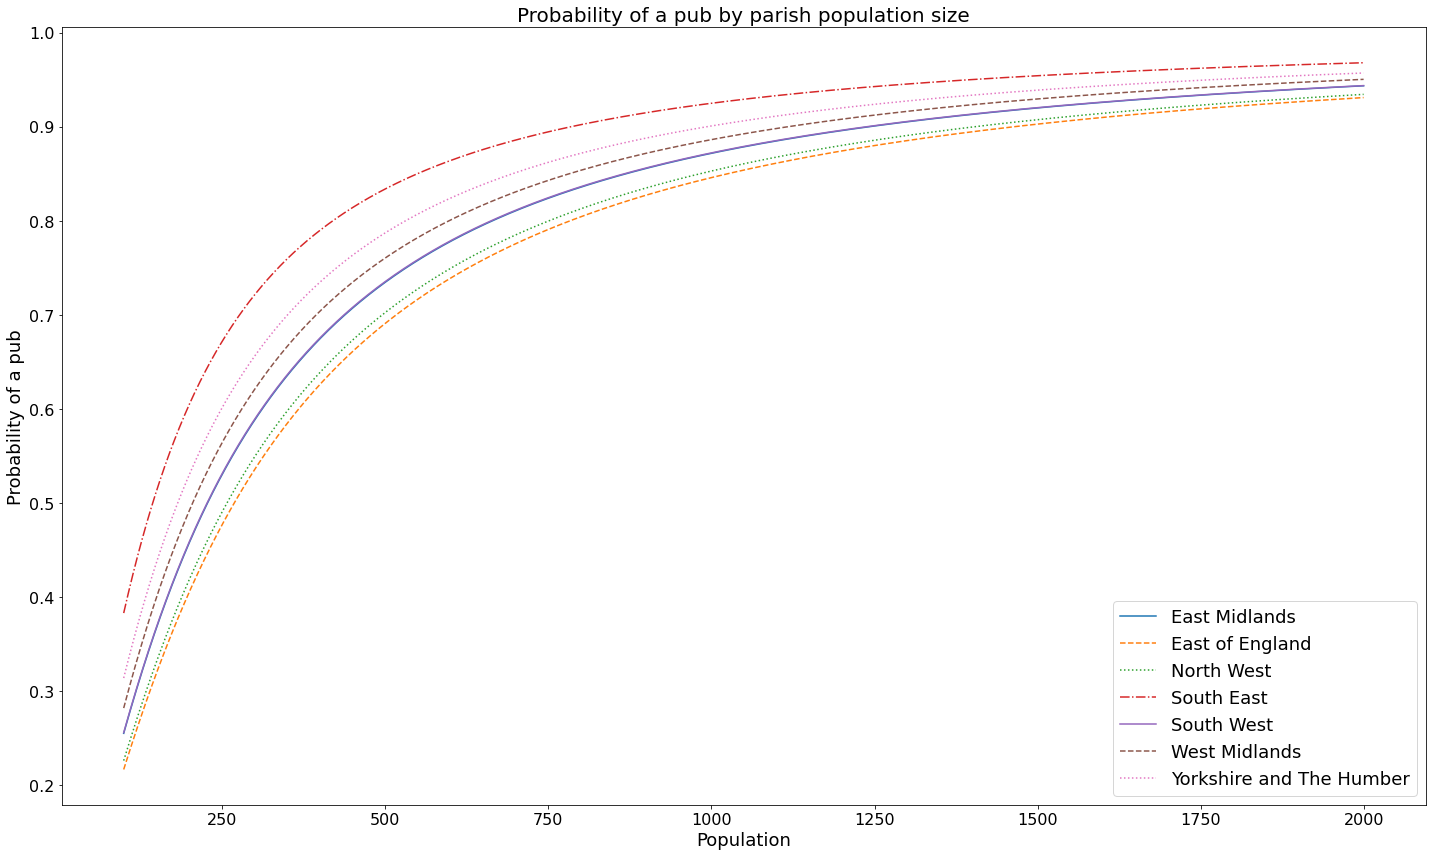

In [1242]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.population, frame.prob_pub, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a pub', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a pub by parish population size', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_pub_by_region.png')
plt.show()

In [1243]:
wide_pred_frame[wide_pred_frame.prob_pub >= 0.5].sort_values(by='prob_pub', ascending=True).head(7).sort_values(by='population')

population  weighted_imd                    region          area  \
3845          145  19217.282754                South East  1.173960e+07   
83            183  19217.282754  Yorkshire and The Humber  1.173960e+07   
2006          206  19217.282754             West Midlands  1.173960e+07   
9628          228  19217.282754                South West  1.173960e+07   
7729          229  19217.282754             East Midlands  1.173960e+07   
5859          259  19217.282754                North West  1.173960e+07   
11570         270  19217.282754           East of England  1.173960e+07   

         ln_area  ln_population  East Midlands  East of England  North West  \
3845   16.278478       4.976734              0                0           0   
83     16.278478       5.209486              0                0           0   
2006   16.278478       5.327876              0                0           0   
9628   16.278478       5.429346              0                0           0   
7729   16.278478       5.433722              1                0           0   
5859   16.278478       5.556828              0                0           1   
11570  16.278478       5.598422              0                1           0   

       South East  South West  West Midlands  Yorkshire and The Humber  \
3845            1           0              0                         0   
83              0           0              0                         1   
2006            0           0              1                         0   
9628            0           1              0                         0   
7729            0           0              0                         0   
5859            0           0              0                         0   
11570           0           0              0                         0   

       prob_worship  prob_school  prob_pub  
3845       0.963433     0.042388  0.501089  
83         0.829708     0.111585  0.500346  
2006       0.953159     0.085027  0.500510  
9628       0.987001     0.157564  0.500200  
7729       0.942223     0.176483  0.500636  
5859       0.799603     0.247181  0.500836  
11570      0.984568     0.154896  0.500649

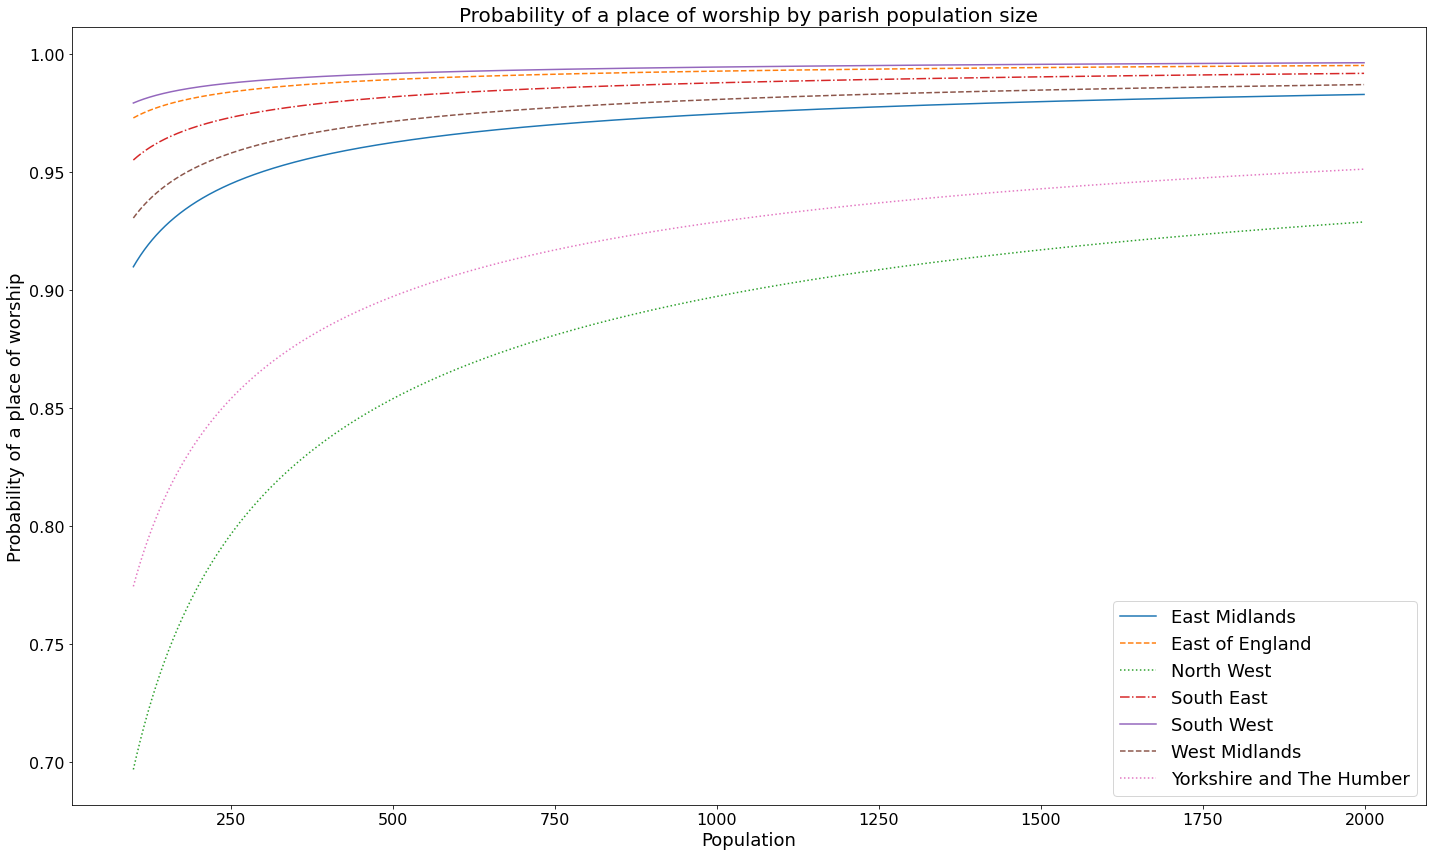

In [1244]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.population, frame.prob_worship, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a place of worship', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a place of worship by parish population size', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_worship_by_region.png')
plt.show()

### By region

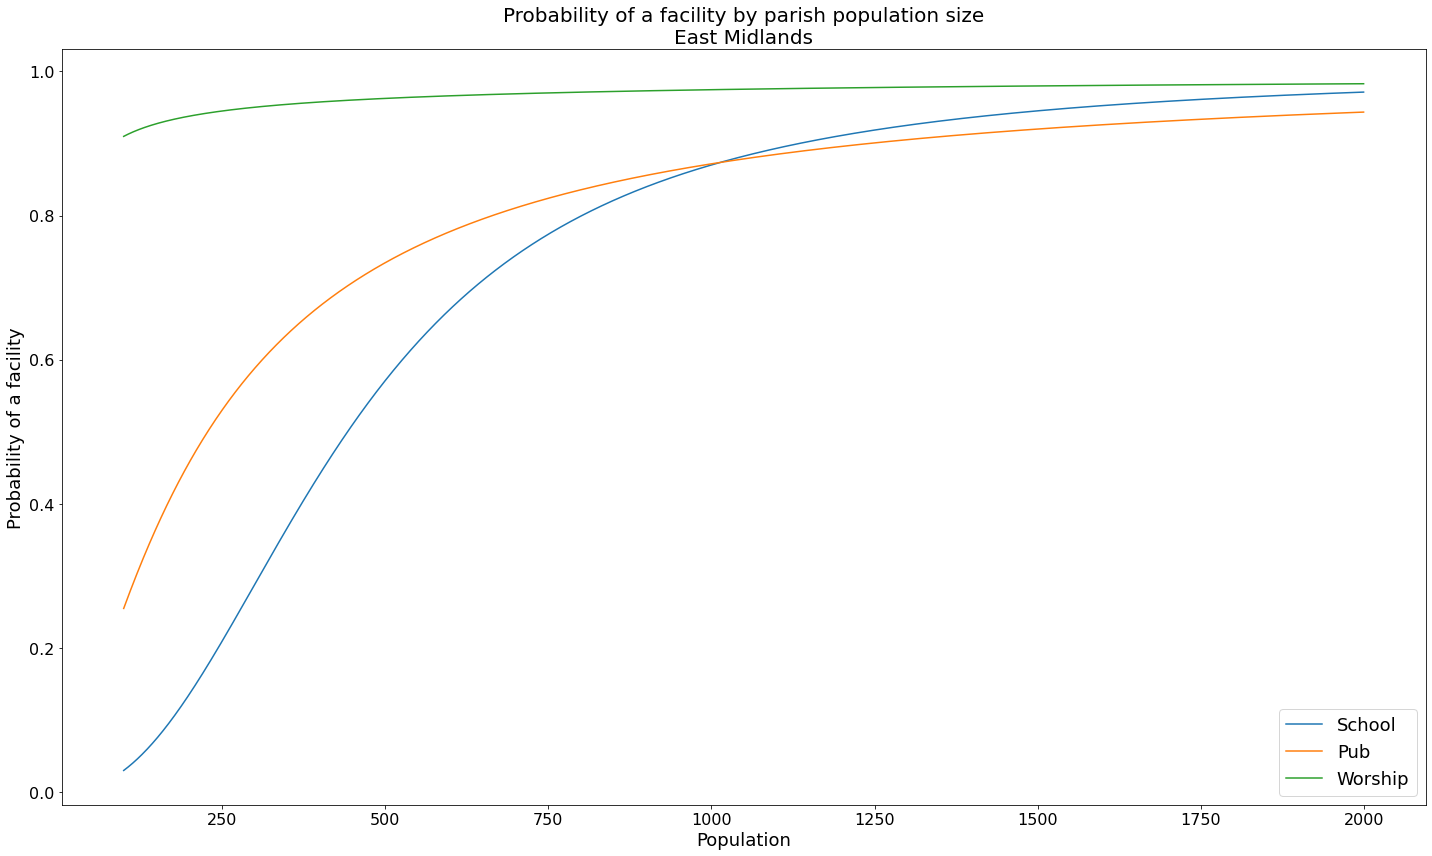

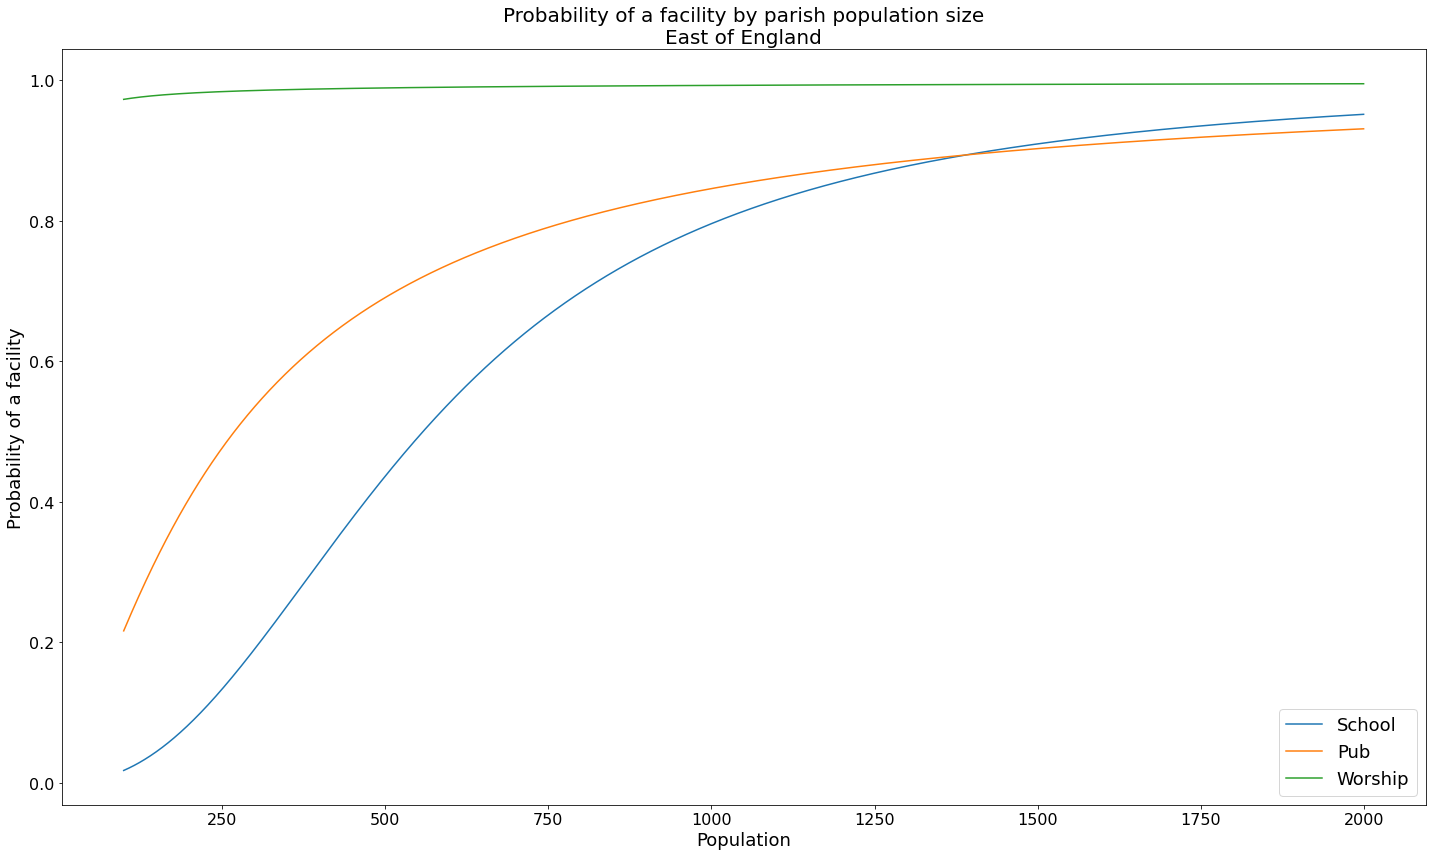

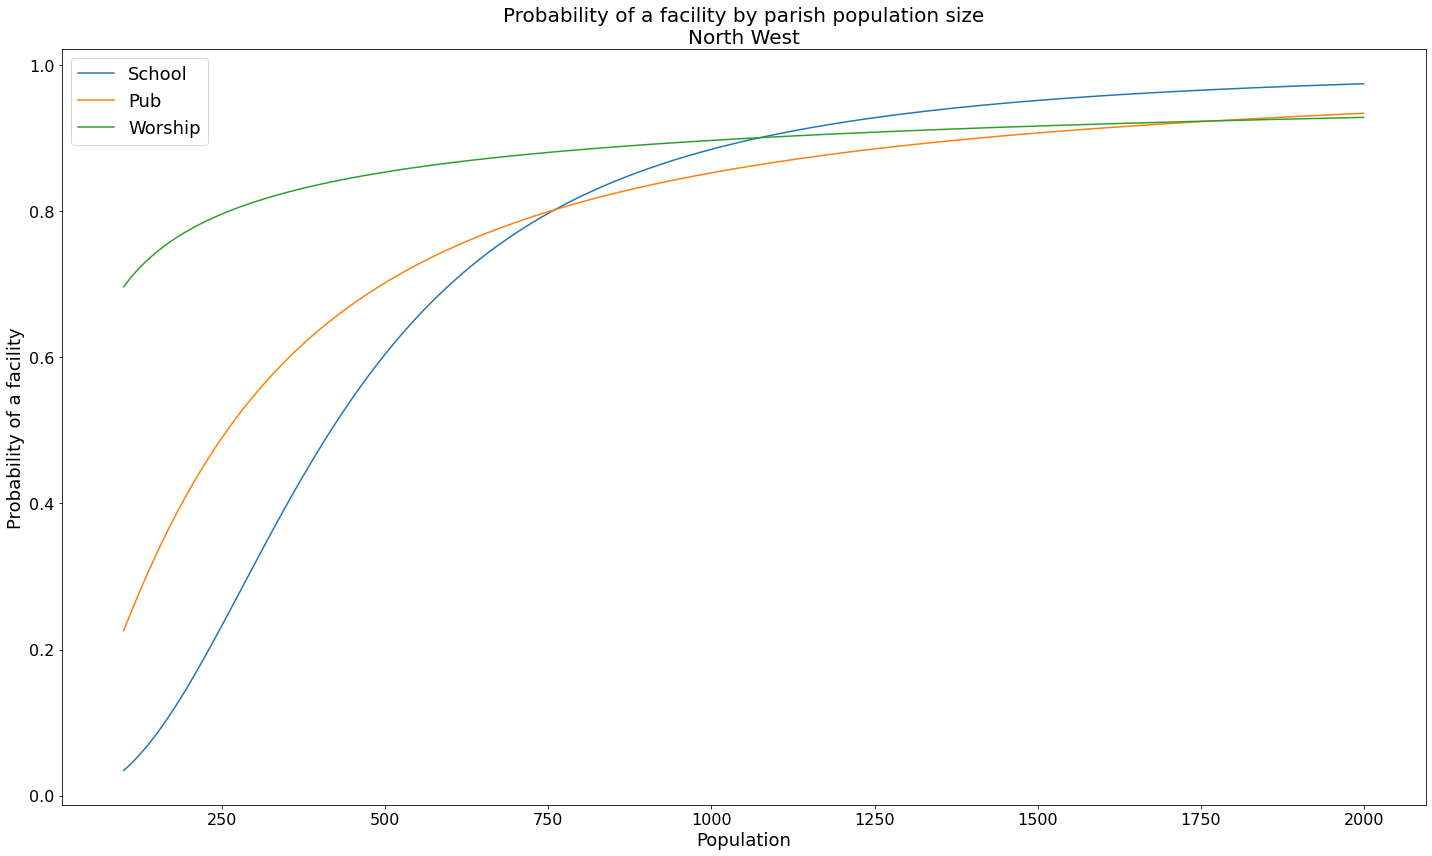

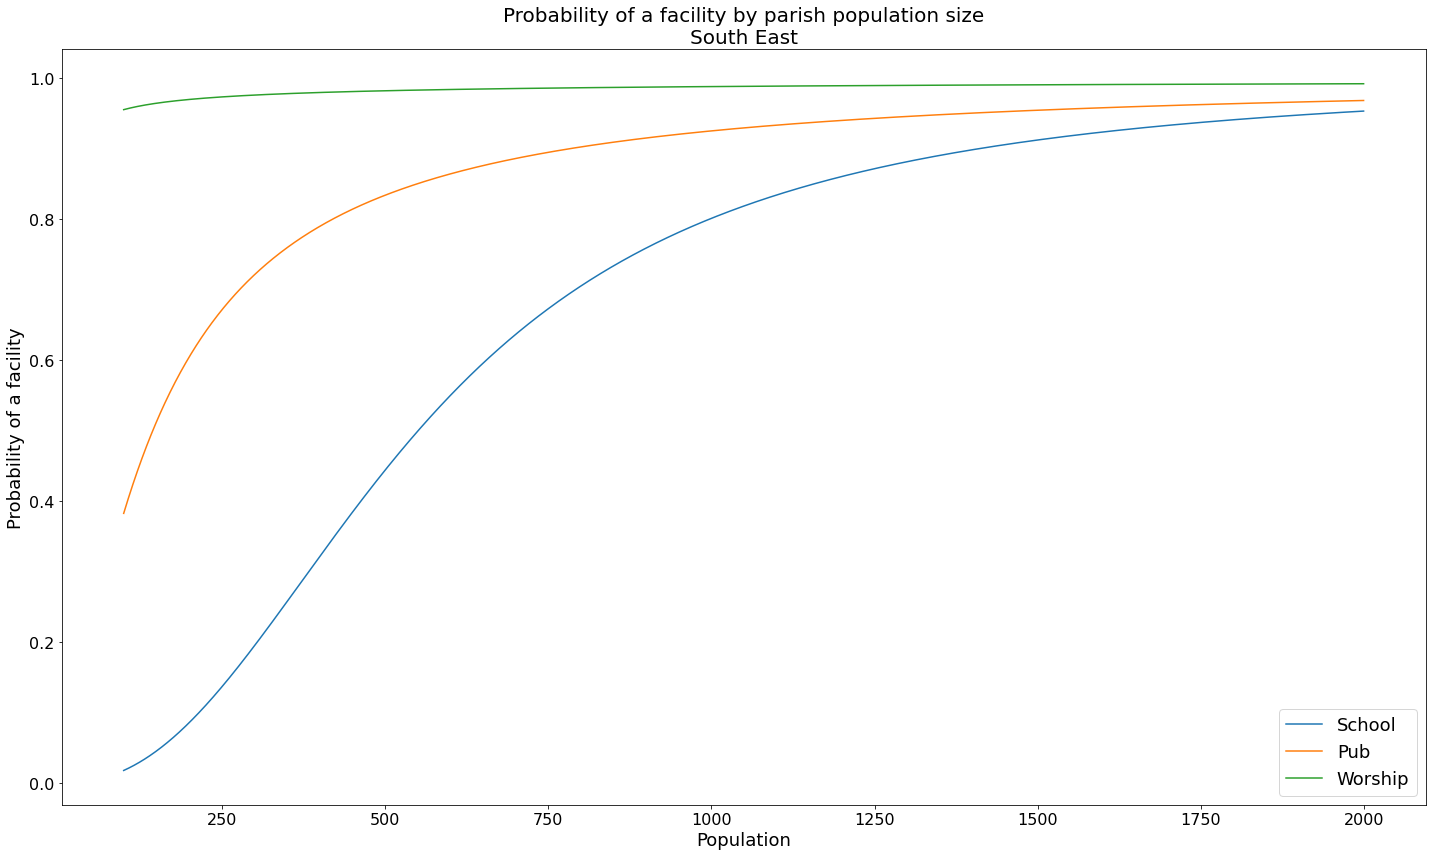

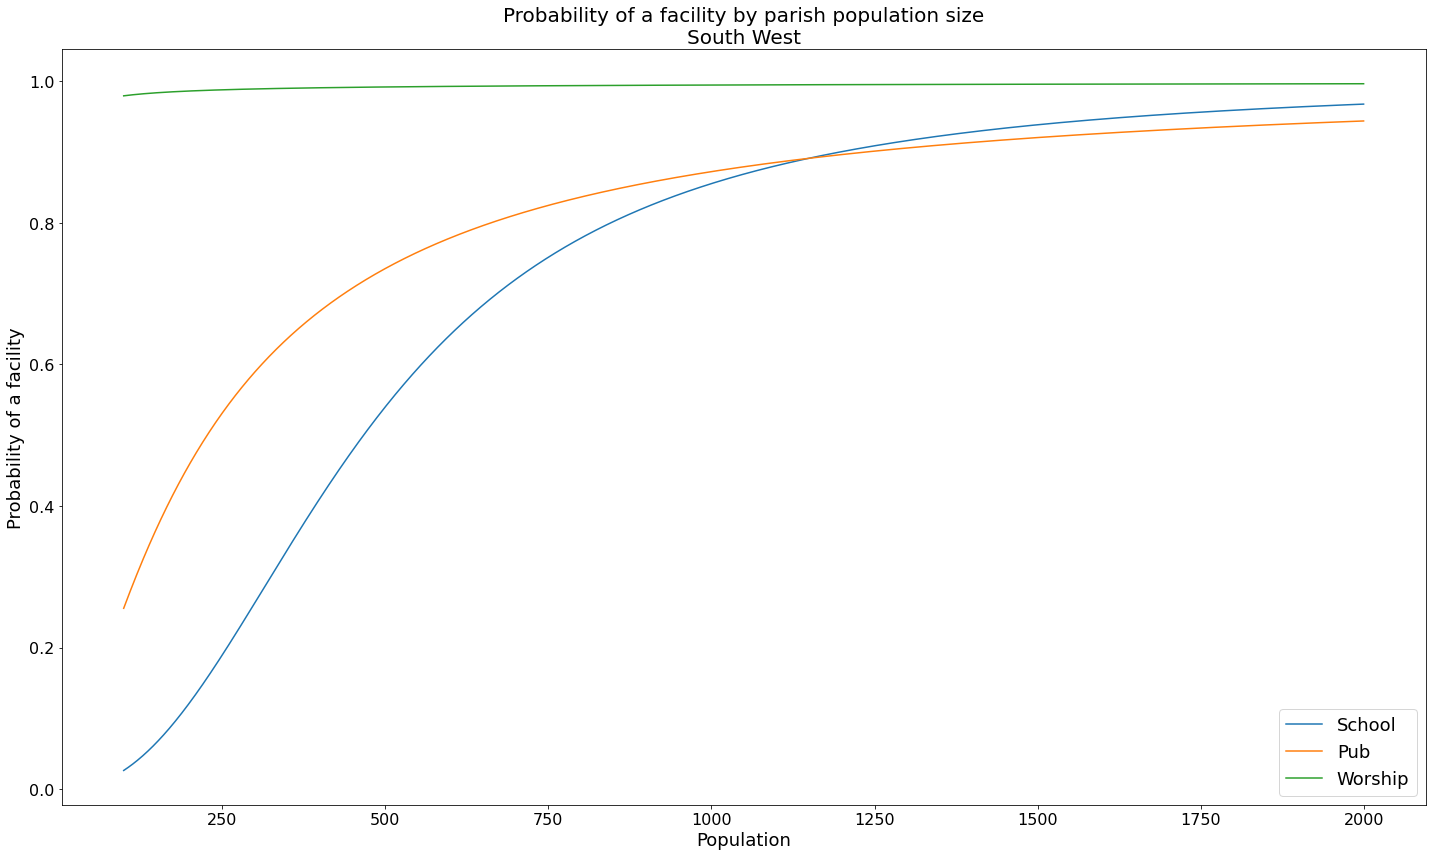

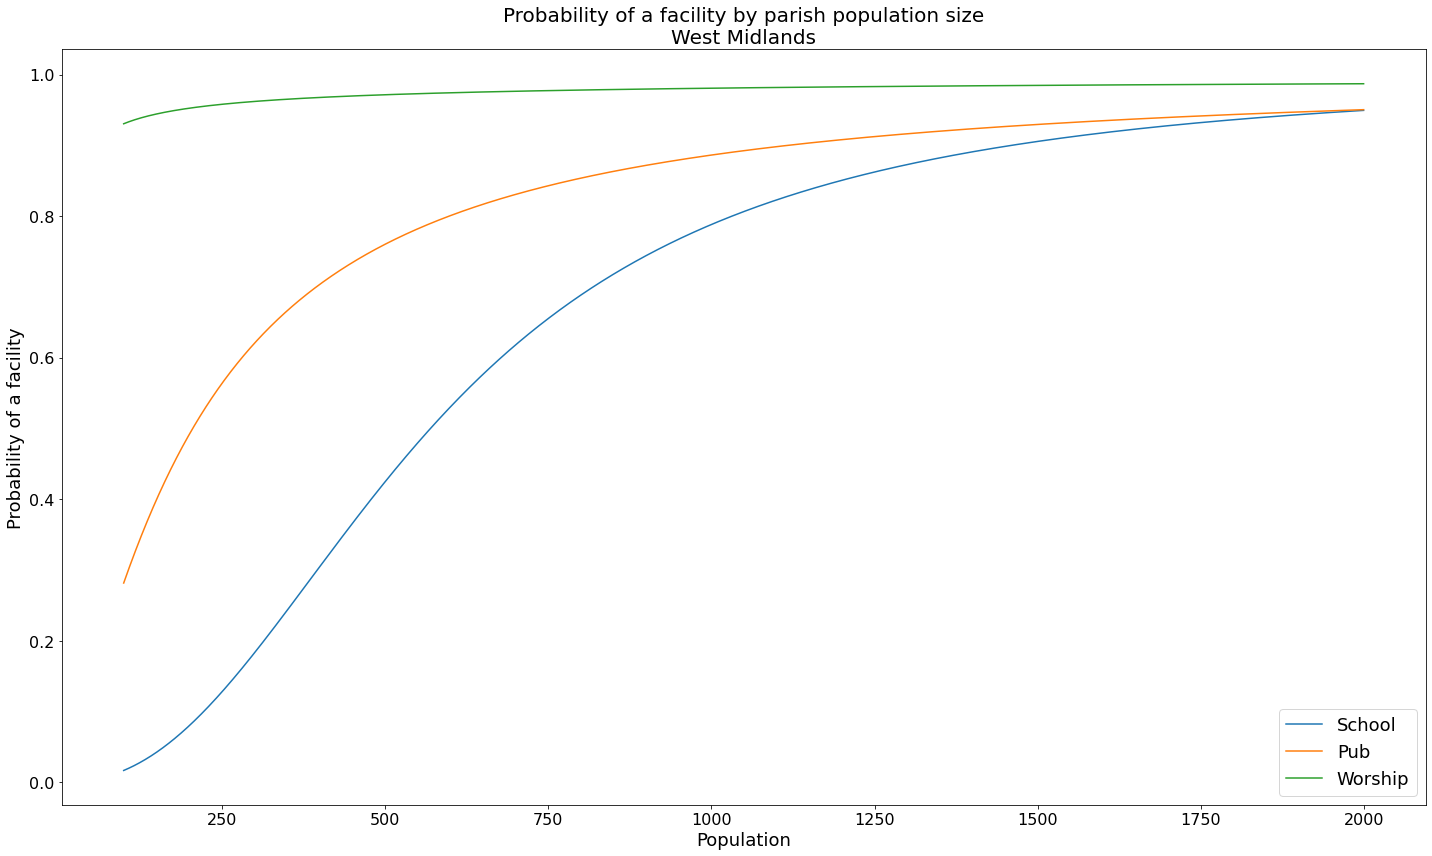

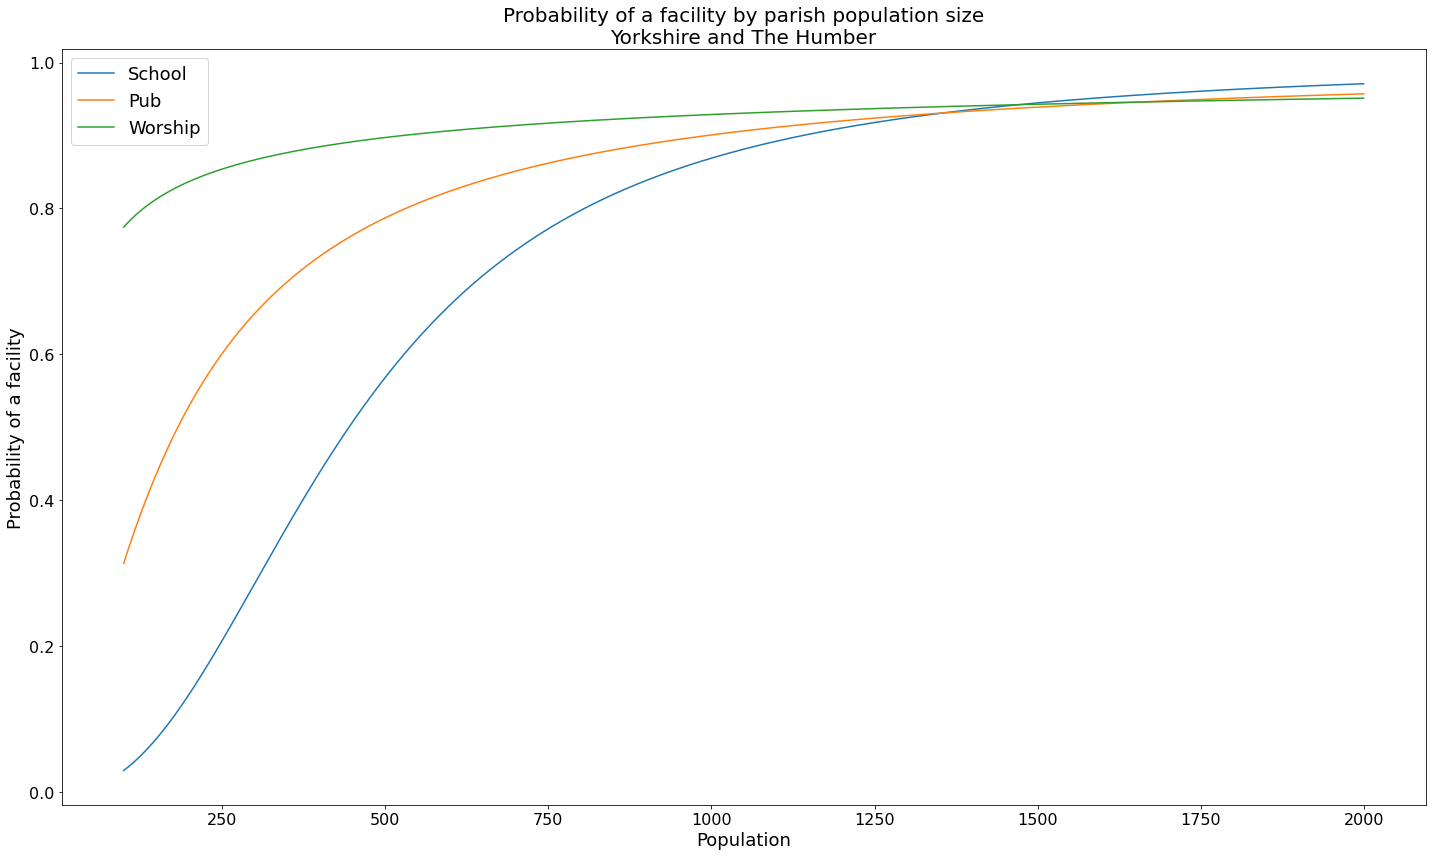

In [1245]:
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    fig, ax = plt.subplots(figsize=(20,12))    
    plt.plot(frame.population, frame.prob_school, label='School')
    plt.plot(frame.population, frame.prob_pub, label='Pub')
    plt.plot(frame.population, frame.prob_worship, label='Worship')
    plt.legend(fontsize=18)
    plt.xlabel('Population', fontsize=18)
    plt.xticks(fontsize=16)
    plt.ylabel('Probability of a facility', fontsize=18)
    plt.yticks(fontsize=16)
    plt.title('Probability of a facility by parish population size\n{0}'.format(region), fontsize=20)
    plt.tight_layout()
    plt.savefig('results/prob_everything_{0}.png'.format(region))
    plt.show()



### By IMD

In [903]:
np.max(predictor_frame.weighted_imd)

32828.0

In [904]:
avg_populations = np.mean(predictor_frame.population)
avg_area = np.mean(predictor_frame.area)
dummy_imds = np.arange(np.min(predictor_frame.weighted_imd), np.max(predictor_frame.weighted_imd))
regions = predictor_frame.region.drop_duplicates()
handy_frame = pd.DataFrame(columns=['population', 'region', 'area', 'weighted_imd'])
frame_base = {
    'population': [],
    'weighted_imd': [],
    'region': [],
    'area': []
}
for region in regions:
    for imd in dummy_imds:
        frame_base['population'].append(avg_populations)
        frame_base['weighted_imd'].append(imd)
        frame_base['region'].append(region)
        frame_base['area'].append(avg_area)

to_pred_frame = pd.DataFrame(frame_base)
to_pred_frame.head()

population  weighted_imd                    region          area
0  903.198855         322.0  Yorkshire and The Humber  1.173960e+07
1  903.198855         323.0  Yorkshire and The Humber  1.173960e+07
2  903.198855         324.0  Yorkshire and The Humber  1.173960e+07
3  903.198855         325.0  Yorkshire and The Humber  1.173960e+07
4  903.198855         326.0  Yorkshire and The Humber  1.173960e+07

In [905]:
to_pred_frame.loc[:, 'ln_area'] = np.log(to_pred_frame.area)
to_pred_frame.loc[:, 'ln_population'] = np.log(to_pred_frame.population)
to_pred_frame.head()

population  weighted_imd                    region          area  \
0  903.198855         322.0  Yorkshire and The Humber  1.173960e+07   
1  903.198855         323.0  Yorkshire and The Humber  1.173960e+07   
2  903.198855         324.0  Yorkshire and The Humber  1.173960e+07   
3  903.198855         325.0  Yorkshire and The Humber  1.173960e+07   
4  903.198855         326.0  Yorkshire and The Humber  1.173960e+07   

     ln_area  ln_population  
0  16.278478       6.805943  
1  16.278478       6.805943  
2  16.278478       6.805943  
3  16.278478       6.805943  
4  16.278478       6.805943

In [906]:
wide_pred_frame = pd.concat([to_pred_frame,pd.get_dummies(to_pred_frame.region)], axis=1)
wide_pred_frame.loc[:, 'prob_worship'] = log_reg_worship.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_school'] = log_reg_school.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_pub'] = log_reg.predict(wide_pred_frame)
wide_pred_frame.head()

population  weighted_imd                    region          area  \
0  903.198855         322.0  Yorkshire and The Humber  1.173960e+07   
1  903.198855         323.0  Yorkshire and The Humber  1.173960e+07   
2  903.198855         324.0  Yorkshire and The Humber  1.173960e+07   
3  903.198855         325.0  Yorkshire and The Humber  1.173960e+07   
4  903.198855         326.0  Yorkshire and The Humber  1.173960e+07   

     ln_area  ln_population  East Midlands  East of England  North West  \
0  16.278478       6.805943              0                0           0   
1  16.278478       6.805943              0                0           0   
2  16.278478       6.805943              0                0           0   
3  16.278478       6.805943              0                0           0   
4  16.278478       6.805943              0                0           0   

   South East  South West  West Midlands  Yorkshire and The Humber  \
0           0           0              0                         1   
1           0           0              0                         1   
2           0           0              0                         1   
3           0           0              0                         1   
4           0           0              0                         1   

   prob_worship  prob_school  prob_pub  
0      0.889208     0.752721  0.826479  
1      0.889211     0.752727  0.826483  
2      0.889213     0.752732  0.826487  
3      0.889215     0.752737  0.826491  
4      0.889217     0.752742  0.826495

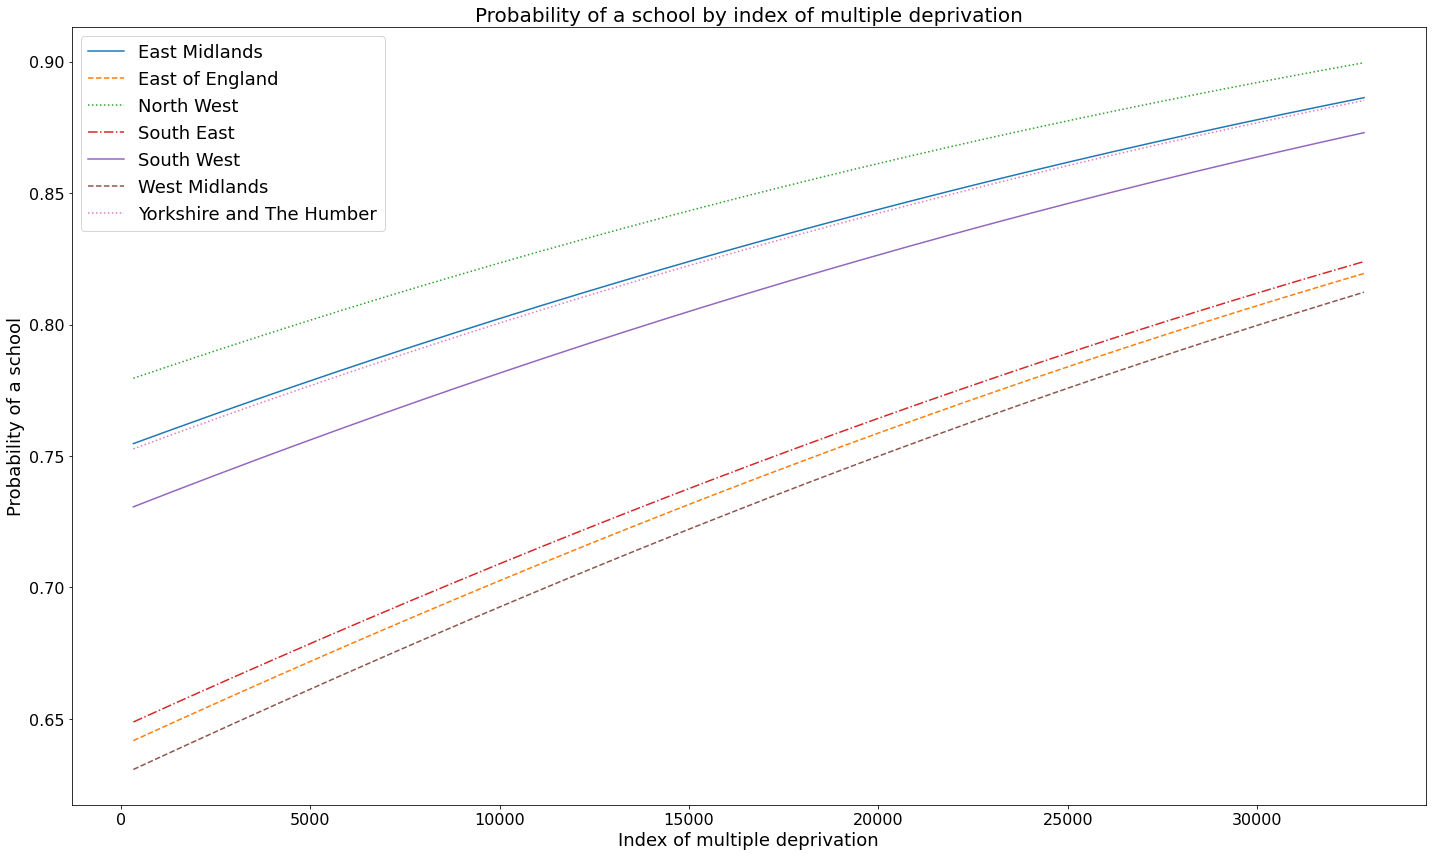

In [907]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.weighted_imd, frame.prob_school, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Index of multiple deprivation', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a school', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a school by index of multiple deprivation', fontsize=20)
plt.tight_layout()
plt.savefig('results/prob_school_by_region_by_imd.png')
plt.show()

### Most surprising omissions

In [908]:
wide_frame.head()

pub  school  place_of_worship  weighted_imd          area  \
0    2       1                 2       30238.0  7.898754e+06   
1    2       1                 1       23934.0  6.695996e+06   
2    0       0                 1       30238.0  1.691419e+06   
3    1       1                 2       30238.0  3.710505e+06   
4    1       1                 2       23934.0  1.084977e+07   

                     region  population           name    ln_area  \
0  Yorkshire and The Humber        1203  Bradleys Both  15.882216   
1  Yorkshire and The Humber        1469       Cononley  15.717020   
2  Yorkshire and The Humber         481       Farnhill  14.341078   
3  Yorkshire and The Humber         222       Kildwick  15.126678   
4  Yorkshire and The Humber         509    Lothersdale  16.199655   

   ln_population  pub_bool  school_bool  worship_bool  East Midlands  \
0       7.092574         1            1             1              0   
1       7.292337         1            1             1              0   
2       6.175867         0            0             1              0   
3       5.402677         1            1             1              0   
4       6.232448         1            1             1              0   

   East of England  North West  South East  South West  West Midlands  \
0                0           0           0           0              0   
1                0           0           0           0              0   
2                0           0           0           0              0   
3                0           0           0           0              0   
4                0           0           0           0              0   

   Yorkshire and The Humber  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

In [1249]:
wide_frame.loc[:, 'prob_worship'] = log_reg_worship.predict(wide_frame)
wide_frame.loc[:, 'prob_school'] = log_reg_school.predict(wide_frame)
wide_frame.loc[:, 'prob_pub'] = log_reg.predict(wide_frame)
wide_frame.head()

pub  school  place_of_worship  weighted_imd          area  \
0    2       1                 2       30238.0  7.898754e+06   
1    2       1                 1       23934.0  6.695996e+06   
2    0       0                 1       30238.0  1.691419e+06   
3    1       1                 2       30238.0  3.710505e+06   
4    1       1                 2       23934.0  1.084977e+07   

                     region  population           name    ln_area  \
0  Yorkshire and The Humber        1203  Bradleys Both  15.882216   
1  Yorkshire and The Humber        1469       Cononley  15.717020   
2  Yorkshire and The Humber         481       Farnhill  14.341078   
3  Yorkshire and The Humber         222       Kildwick  15.126678   
4  Yorkshire and The Humber         509    Lothersdale  16.199655   

   ln_population  ...  East Midlands  East of England  North West  South East  \
0       7.092574  ...              0                0           0           0   
1       7.292337  ...              0                0           0           0   
2       6.175867  ...              0                0           0           0   
3       5.402677  ...              0                0           0           0   
4       6.232448  ...              0                0           0           0   

   South West  West Midlands  Yorkshire and The Humber  prob_worship  \
0           0              0                         1      0.924187   
1           0              0                         1      0.908689   
2           0              0                         1      0.580060   
3           0              0                         1      0.671270   
4           0              0                         1      0.900144   

   prob_school  prob_pub  
0     0.922522  0.930282  
1     0.936805  0.931821  
2     0.428107  0.690388  
3     0.144781  0.525879  
4     0.602796  0.806392  

[5 rows x 26 columns]

In [910]:
wide_frame.loc[:, 'pub_surprise'] = wide_frame.pub_bool - wide_frame.prob_pub
wide_frame.loc[:, 'school_surprise'] = wide_frame.school_bool - wide_frame.prob_school
wide_frame.loc[:, 'worship_surprise'] = wide_frame.worship_bool - wide_frame.prob_worship

In [911]:
wide_frame.sort_values(by='pub_surprise').head()

pub  school  place_of_worship  weighted_imd          area  \
3081    0       4                 5  21442.342124  1.598800e+07   
4645    0       1                 5  28000.460996  1.464049e+07   
2215    0       1                 2  32621.000000  5.248724e+06   
782     0       2                 1  23835.432871  1.866658e+07   
3752    0       1                 1  19494.987999  4.672770e+06   

               region  population                     name    ln_area  \
3081    East Midlands        5650               Ruskington  16.587349   
4645  East of England        4538                Knebworth  16.499302   
2215       South East        2962            South Wonston  15.473496   
782        North West        4186  Hesketh-with-Becconsall  16.742245   
3752       South East        3333                 Tangmere  15.357263   

      ln_population  ...  South East  South West  West Midlands  \
3081       8.639411  ...           0           0              0   
4645       8.420242  ...           0           0              0   
2215       7.993620  ...           1           0              0   
782        8.339501  ...           0           0              0   
3752       8.111628  ...           1           0              0   

      Yorkshire and The Humber  prob_worship  prob_school  prob_pub  \
3081                         0      0.993505     0.997839  0.987188   
4645                         0      0.998026     0.994696  0.981836   
2215                         0      0.988603     0.981731  0.981506   
782                          0      0.973314     0.996682  0.980570   
3752                         0      0.983873     0.978899  0.976416   

      pub_surprise  school_surprise  worship_surprise  
3081     -0.987188         0.002161          0.006495  
4645     -0.981836         0.005304          0.001974  
2215     -0.981506         0.018269          0.011397  
782      -0.980570         0.003318          0.026686  
3752     -0.976416         0.021101          0.016127  

[5 rows x 26 columns]

In [912]:
wide_frame.sort_values(by='pub_surprise', ascending=False).head()

pub  school  place_of_worship  weighted_imd          area  \
1240    1       0                 1       10163.0  3.202055e+06   
4162    1       0                 1       17869.0  1.951660e+06   
1879    1       0                 1       13559.0  4.251930e+06   
1162    1       0                 1       16731.0  1.163563e+06   
2040    1       0                 1       12525.0  4.383810e+06   

               region  population                   name    ln_area  \
1240       South West         102             Monksilver  14.979303   
4162       South West         105            Butterleigh  14.484191   
1879  East of England         108                Wiveton  15.262884   
1162       South West         126  Seavington St Michael  13.966997   
2040  East of England         125              Wheatacre  15.293429   

      ln_population  ...  South East  South West  West Midlands  \
1240       4.624973  ...           0           1              0   
4162       4.653960  ...           0           1              0   
1879       4.682131  ...           0           0              0   
1162       4.836282  ...           0           1              0   
2040       4.828314  ...           0           0              0   

      Yorkshire and The Humber  prob_worship  prob_school  prob_pub  \
1240                         0      0.906487     0.012850  0.142557   
4162                         0      0.873615     0.014001  0.149331   
1879                         0      0.917743     0.012000  0.149914   
1162                         0      0.811667     0.016769  0.149934   
2040                         0      0.924569     0.016519  0.173402   

      pub_surprise  school_surprise  worship_surprise  
1240      0.857443        -0.012850          0.093513  
4162      0.850669        -0.014001          0.126385  
1879      0.850086        -0.012000          0.082257  
1162      0.850066        -0.016769          0.188333  
2040      0.826598        -0.016519          0.075431  

[5 rows x 26 columns]

In [913]:
wide_frame.sort_values(by='school_surprise').head()

pub  school  place_of_worship  weighted_imd          area      region  \
634     1       0                 1  31872.149579  7.403694e+06  South East   
2290    3       0                 4  14734.885277  1.825062e+07  South East   
691     1       0                 0  10305.000000  7.534208e+06  North West   
3382    3       0                 2   8795.581781  1.397643e+07  South East   
2174    1       0                 1  24711.000000  1.891132e+07  South East   

      population                   name    ln_area  ln_population  ...  \
634         4272           East Horsley  15.817490       8.359837  ...   
2290        3199               Pevensey  16.719710       8.070594  ...   
691         2544           Ulnes Walton  15.834964       7.841493  ...   
3382        2898  St. Mary in the Marsh  16.452883       7.971776  ...   
2174        2066            Over Wallop  16.755271       7.633370  ...   

      South East  South West  West Midlands  Yorkshire and The Humber  \
634            1           0              0                         0   
2290           1           0              0                         0   
691            0           0              0                         0   
3382           1           0              0                         0   
2174           1           0              0                         0   

      prob_worship  prob_school  prob_pub  pub_surprise  school_surprise  \
634       0.993476     0.993019  0.989651      0.010349        -0.993019   
2290      0.995658     0.984610  0.983217      0.016783        -0.984610   
691       0.884262     0.977831  0.927897      0.072103        -0.977831   
3382      0.993027     0.974656  0.975331      0.024669        -0.974656   
2174      0.995700     0.968847  0.977850      0.022150        -0.968847   

      worship_surprise  
634           0.006524  
2290          0.004342  
691          -0.884262  
3382          0.006973  
2174          0.004300  

[5 rows x 26 columns]

In [914]:
wide_frame.sort_values(by='school_surprise', ascending=False).head()

pub  school  place_of_worship  weighted_imd          area  \
3715    1       1                 2       14651.0  8.364166e+06   
4639    1       1                 1       17498.0  6.003138e+06   
1300    0       1                 1       16178.0  3.027205e+06   
4052    1       1                 1       23891.0  7.079458e+06   
4068    0       1                 1       11367.0  7.450049e+06   

               region  population           name    ln_area  ln_population  \
3715       South East         113        Eartham  15.939467       4.727388   
4639  East of England         123         Hexton  15.607793       4.812184   
1300    West Midlands         149    Madresfield  14.923150       5.003946   
4052    West Midlands         123        Marston  15.772708       4.812184   
4068    West Midlands         149  Hollinsclough  15.823731       5.003946   

      ...  South East  South West  West Midlands  Yorkshire and The Humber  \
3715  ...           1           0              0                         0   
4639  ...           0           0              0                         0   
1300  ...           0           0              1                         0   
4052  ...           0           0              1                         0   
4068  ...           0           0              1                         0   

      prob_worship  prob_school  prob_pub  pub_surprise  school_surprise  \
3715      0.934726     0.018558  0.360068      0.639932         0.981442   
4639      0.950016     0.020748  0.209914      0.790086         0.979252   
1300      0.787337     0.022538  0.263505     -0.263505         0.977462   
4052      0.907148     0.025284  0.323630      0.676370         0.974716   
4068      0.896818     0.028152  0.308243     -0.308243         0.971848   

      worship_surprise  
3715          0.065274  
4639          0.049984  
1300          0.212663  
4052          0.092852  
4068          0.103182  

[5 rows x 26 columns]

In [915]:
wide_frame.sort_values(by='worship_surprise', ascending=True).head()

pub  school  place_of_worship  weighted_imd          area  \
2655    1       1                 0   30557.00000  1.437074e+07   
4778    0       2                 0   23438.33465  1.554497e+07   
4432    1       1                 0   21095.00000  2.247215e+07   
2120    3       0                 0   13055.00000  7.141533e+07   
4802    0       0                 0   23379.00000  1.662893e+07   

               region  population          name    ln_area  ln_population  \
2655  East of England        2091  Great Barton  16.480705       7.645398   
4778       South West        1013     Hamfallow  16.559248       6.920672   
4432       South West         507    Whitchurch  16.927787       6.228511   
2120       South East         317   Denny Lodge  18.084023       5.758902   
4802       South West         742     Alkington  16.626654       6.609349   

      ...  South East  South West  West Midlands  Yorkshire and The Humber  \
2655  ...           0           0              0                         0   
4778  ...           0           1              0                         0   
4432  ...           0           1              0                         0   
2120  ...           1           0              0                         0   
4802  ...           0           1              0                         0   

      prob_worship  prob_school  prob_pub  pub_surprise  school_surprise  \
2655      0.997024     0.970402  0.954623      0.045377         0.029598   
4778      0.996277     0.885031  0.896644     -0.896644         0.114969   
4432      0.996046     0.624158  0.792754      0.207246         0.375842   
2120      0.995988     0.324342  0.825535      0.174465        -0.324342   
4802      0.995847     0.792426  0.855812     -0.855812        -0.792426   

      worship_surprise  
2655         -0.997024  
4778         -0.996277  
4432         -0.996046  
2120         -0.995988  
4802         -0.995847  

[5 rows x 26 columns]

In [916]:
wide_frame.sort_values(by='worship_surprise', ascending=False).head()

pub  school  place_of_worship  weighted_imd          area  \
984    0       0                 1       21151.0  2.128683e+06   
273    1       0                 1       18604.0  2.260012e+06   
762    1       0                 1       14835.0  3.038567e+06   
708    0       0                 1       21121.0  3.428329e+06   
173    0       0                 1       20977.0  2.944632e+06   

                       region  population           name    ln_area  \
984  Yorkshire and The Humber         158  East Hardwick  14.571014   
273  Yorkshire and The Humber         180       Finghall  14.630881   
762                North West         251      Newsholme  14.926897   
708                North West         181        Borwick  15.047584   
173  Yorkshire and The Humber         145       Winksley  14.895494   

     ln_population  ...  South East  South West  West Midlands  \
984       5.062595  ...           0           0              0   
273       5.192957  ...           0           0              0   
762       5.525453  ...           0           0              0   
708       5.198497  ...           0           0              0   
173       4.976734  ...           0           0              0   

     Yorkshire and The Humber  prob_worship  prob_school  prob_pub  \
984                         1      0.430010     0.044965  0.309908   
273                         1      0.450225     0.057326  0.336889   
762                         0      0.455873     0.134559  0.335871   
708                         0      0.476080     0.083479  0.291393   
173                         1      0.502771     0.041904  0.312040   

     pub_surprise  school_surprise  worship_surprise  
984     -0.309908        -0.044965          0.569990  
273      0.663111        -0.057326          0.549775  
762      0.664129        -0.134559          0.544127  
708     -0.291393        -0.083479          0.523920  
173     -0.312040        -0.041904          0.497229  

[5 rows x 26 columns]

In [34]:
wide_frame.groupby(['region']).describe()

NameError: name 'wide_frame' is not defined

### Poisson regression testing

In [917]:
wide_frame.head()

pub  school  place_of_worship  weighted_imd          area  \
0    2       1                 2       30238.0  7.898754e+06   
1    2       1                 1       23934.0  6.695996e+06   
2    0       0                 1       30238.0  1.691419e+06   
3    1       1                 2       30238.0  3.710505e+06   
4    1       1                 2       23934.0  1.084977e+07   

                     region  population           name    ln_area  \
0  Yorkshire and The Humber        1203  Bradleys Both  15.882216   
1  Yorkshire and The Humber        1469       Cononley  15.717020   
2  Yorkshire and The Humber         481       Farnhill  14.341078   
3  Yorkshire and The Humber         222       Kildwick  15.126678   
4  Yorkshire and The Humber         509    Lothersdale  16.199655   

   ln_population  ...  South East  South West  West Midlands  \
0       7.092574  ...           0           0              0   
1       7.292337  ...           0           0              0   
2       6.175867  ...           0           0              0   
3       5.402677  ...           0           0              0   
4       6.232448  ...           0           0              0   

   Yorkshire and The Humber  prob_worship  prob_school  prob_pub  \
0                         1      0.924187     0.922522  0.930282   
1                         1      0.908689     0.936805  0.931821   
2                         1      0.580060     0.428107  0.690388   
3                         1      0.671270     0.144781  0.525879   
4                         1      0.900144     0.602796  0.806392   

   pub_surprise  school_surprise  worship_surprise  
0      0.069718         0.077478          0.075813  
1      0.068179         0.063195          0.091311  
2     -0.690388        -0.428107          0.419940  
3      0.474121         0.855219          0.328730  
4      0.193608         0.397204          0.099856  

[5 rows x 26 columns]

In [926]:
wide_frame.region.drop_duplicates()

0       Yorkshire and The Humber
482                West Midlands
633                   South East
681                   North West
805                East Midlands
991                   South West
1401             East of England
Name: region, dtype: object

In [932]:
X = wide_frame[[
    'weighted_imd', 
    'ln_area', 
    'ln_population', 
    'North West',
    'East Midlands',
    'South East', 
    'South West', 
    'West Midlands', 
    'Yorkshire and The Humber',
    
]]
y = wide_frame[['pub']]

feature_names = X.columns.to_list()

exog = sm.add_constant(X)
poisson_model = sm.GLM(y, exog, family=sm.families.NegativeBinomial())
result = poisson_model.fit()

In [933]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    pub   No. Observations:                 5064
Model:                            GLM   Df Residuals:                     5054
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7145.4
Date:                Thu, 12 Jan 2023   Deviance:                       2410.8
Time:                        11:55:50   Pearson chi2:                 1.90e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2295
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [929]:
from scipy import stats
mean_predicted = result.predict()
prob_2more = stats.poisson.sf(2 - 1, mean_predicted).mean()
freq_2more = (y > 2 - 1).mean()

In [930]:
freq_2more

pub    0.287322
dtype: float64

In [931]:
prob_2more

0.3130853795907184

In [1252]:
wide_frame.loc[:, 'population_grouped'] = wide_frame.population.apply(
lambda x: 100*np.round(x/100) if x <= 1000 else 250*np.round(x/250) if x <= 2000 else np.round(x/1000)*1000 if x <= 5000 else np.round(x/5000)*5000
    
)

In [1254]:
wide_frame.groupby(['population_grouped']).agg('mean')[['prob_school', 'prob_worship', 'prob_pub']]

prob_school  prob_worship  prob_pub
population_grouped                                     
100.0                  0.036141      0.842417  0.283933
200.0                  0.093928      0.890395  0.418509
300.0                  0.218770      0.924801  0.559090
400.0                  0.343429      0.945353  0.649767
500.0                  0.473948      0.955402  0.718682
600.0                  0.569564      0.963758  0.770586
700.0                  0.666167      0.964885  0.805805
800.0                  0.740229      0.964809  0.840494
900.0                  0.773774      0.973739  0.853455
1000.0                 0.834078      0.971971  0.873159
1250.0                 0.887563      0.976416  0.903406
1500.0                 0.926342      0.980856  0.928401
1750.0                 0.945879      0.973929  0.940431
2000.0                 0.966095      0.980044  0.951888
3000.0                 0.983549      0.984874  0.969588
4000.0                 0.991769      0.983708  0.977062
5000.0                 0.996400      0.989126  0.986546
10000.0                0.998810      0.989641  0.992041